#  <span style = "color : red"> Exploratory Data Analysis</span>

##  <span style = "color : lightgreen"> Importing Libraries</span>

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler, ADASYN
from imblearn.under_sampling import NearMiss, RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

##  <span style = "color : lightgreen"> Data Reading</span>

In [37]:
df=pd.read_csv("HR_Analytics.csv")
df.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [38]:
df.shape

(1470, 35)

In [39]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

##  <span style = "color : lightgreen"> Checking Missing Data</span>

In [41]:
if df.isnull().sum().sum() == 0:
    print('CHECK: No missing data \n')
else:
    print('CHECK: Missing data found \n')
print(df.isnull().sum())

CHECK: No missing data 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentR

##  <span style = "color : lightgreen"> Replacing 'Yes' by '1' and 'No' by '0'</span>

In [42]:
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Over18'] = df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

#  <span style = "color : red"> Data Related Some Plots</span>

##  <span style = "color : lightgreen"> Bar Diagram</span>

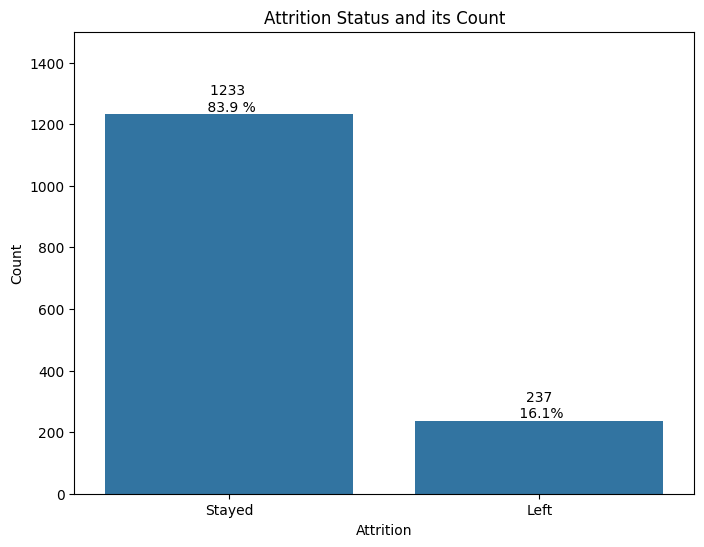

In [43]:
plt.figure(figsize=(8, 6)) 
sns.countplot(x='Attrition', data=df)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.xticks([0,1], ['Stayed', 'Left'])
plt.annotate(f'{df["Attrition"].value_counts()[0]} \n {round(df["Attrition"].value_counts()[0]/len(df)*100,1)} %', (0, df["Attrition"].value_counts()[0]), ha='center', va='bottom')
plt.annotate(f'{df["Attrition"].value_counts()[1]}\n {round(df["Attrition"].value_counts()[1]/len(df)*100,1)}%', (1, df["Attrition"].value_counts()[1]), ha='center', va='bottom')
plt.title('Attrition Status and its Count')
plt.xlim(-0.5, 1.5)  
plt.ylim(0,1500)  

plt.show()


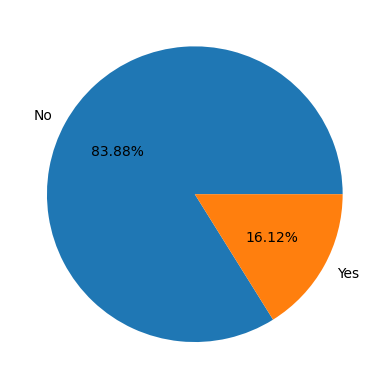

In [44]:
plt.pie(df['Attrition'].value_counts(),labels=['No','Yes'],autopct='%.2f%%')
plt.show()

##  <span style = "color : lightgreen"> Histogram for each Numeric Feature in the Dataset</span>

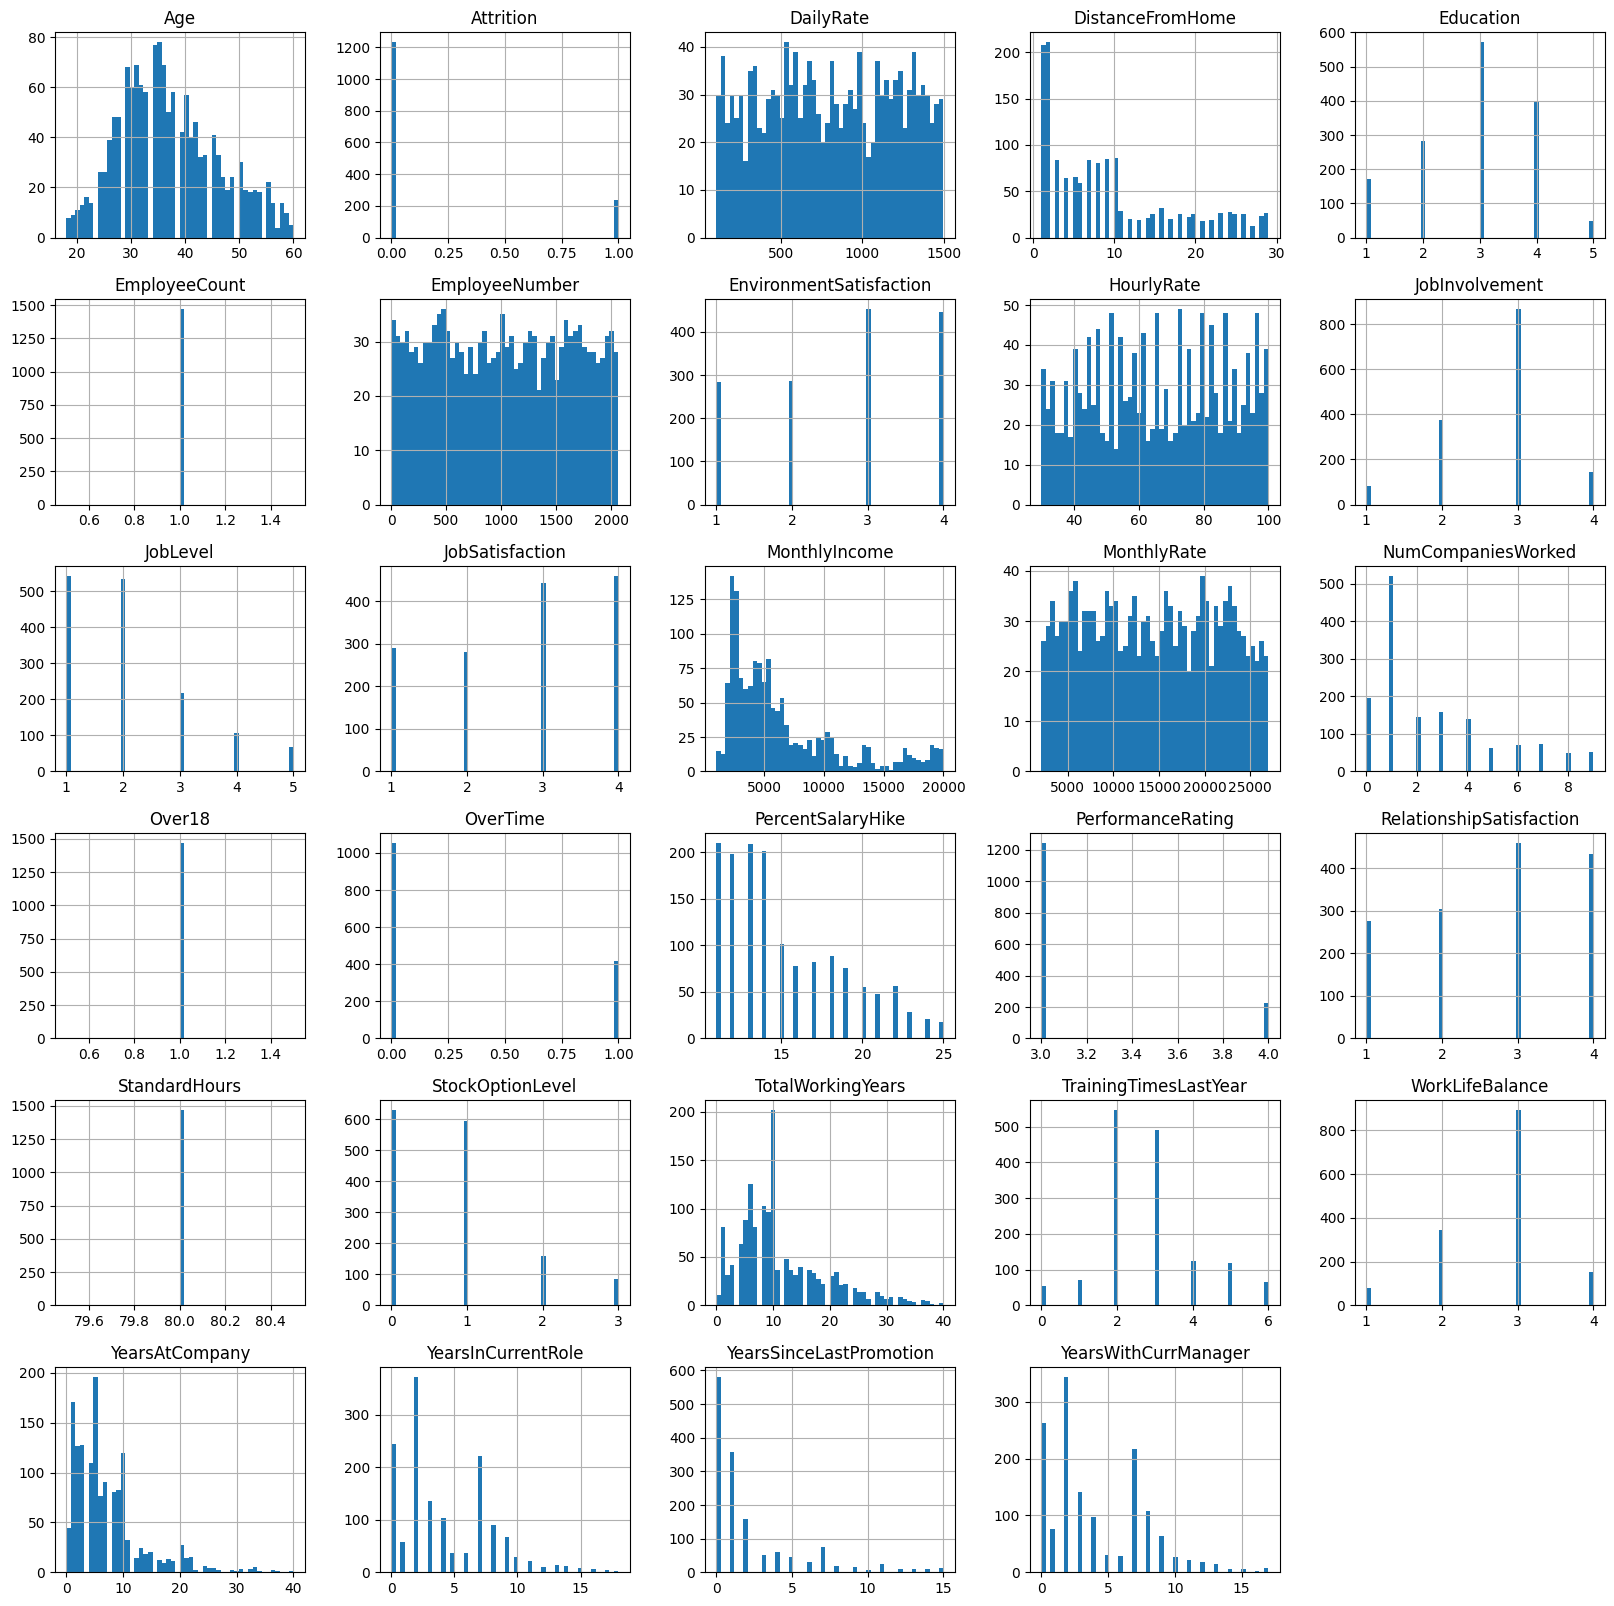

In [45]:
df.hist(figsize=(20,20), bins=50)
plt.show()

##  <span style = "color : lightgreen"> Dropping Columns </span>

In [46]:
df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis="columns", inplace=True)

##  <span style = "color : lightgreen"> Updated Dataset </span>

In [47]:
print(df.shape)
df

(1470, 31)


Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467  

In [48]:
left_df = df[df['Attrition'] == 1]
stayed_df = df[df['Attrition'] == 0]
print(f'Total Employees: {len(df)}\n')
print(f'Number of employees who left: {df["Attrition"].value_counts()[1]}')
print(f'% of employees who left: {round(df["Attrition"].value_counts()[1]/len(df)*100,2)}%\n')
print(f'Number of employees who stayed: {df["Attrition"].value_counts()[0]}')
print(f'% of employees who stayed: {round(df["Attrition"].value_counts()[0]/len(df)*100,2)}%')

Total Employees: 1470

Number of employees who left: 237
% of employees who left: 16.12%

Number of employees who stayed: 1233
% of employees who stayed: 83.88%


<Axes: xlabel='DistanceFromHome', ylabel='Count'>

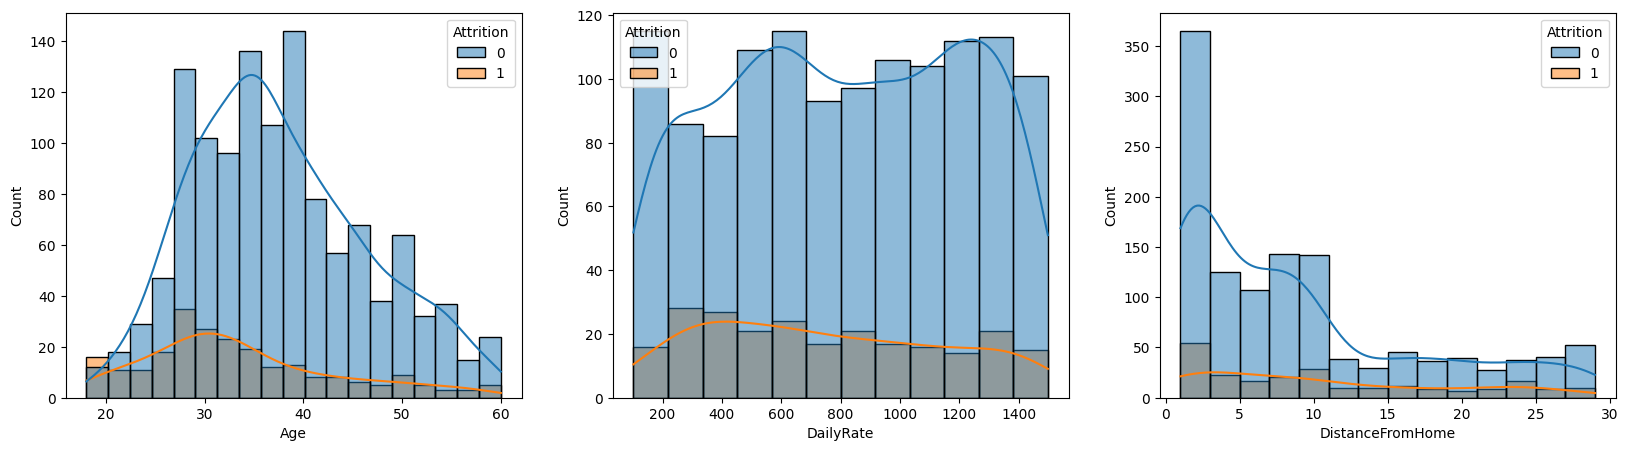

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.histplot(df, x='Age', hue='Attrition', kde=True, ax=ax[0])
sns.histplot(df, x='DailyRate', hue='Attrition', kde=True, ax=ax[1])
sns.histplot(df, x='DistanceFromHome', hue='Attrition', kde=True, ax=ax[2])

##  <span style = "color : lightgreen"> Attrition Status Based Upon Age</span>

(-0.5, 50.0)

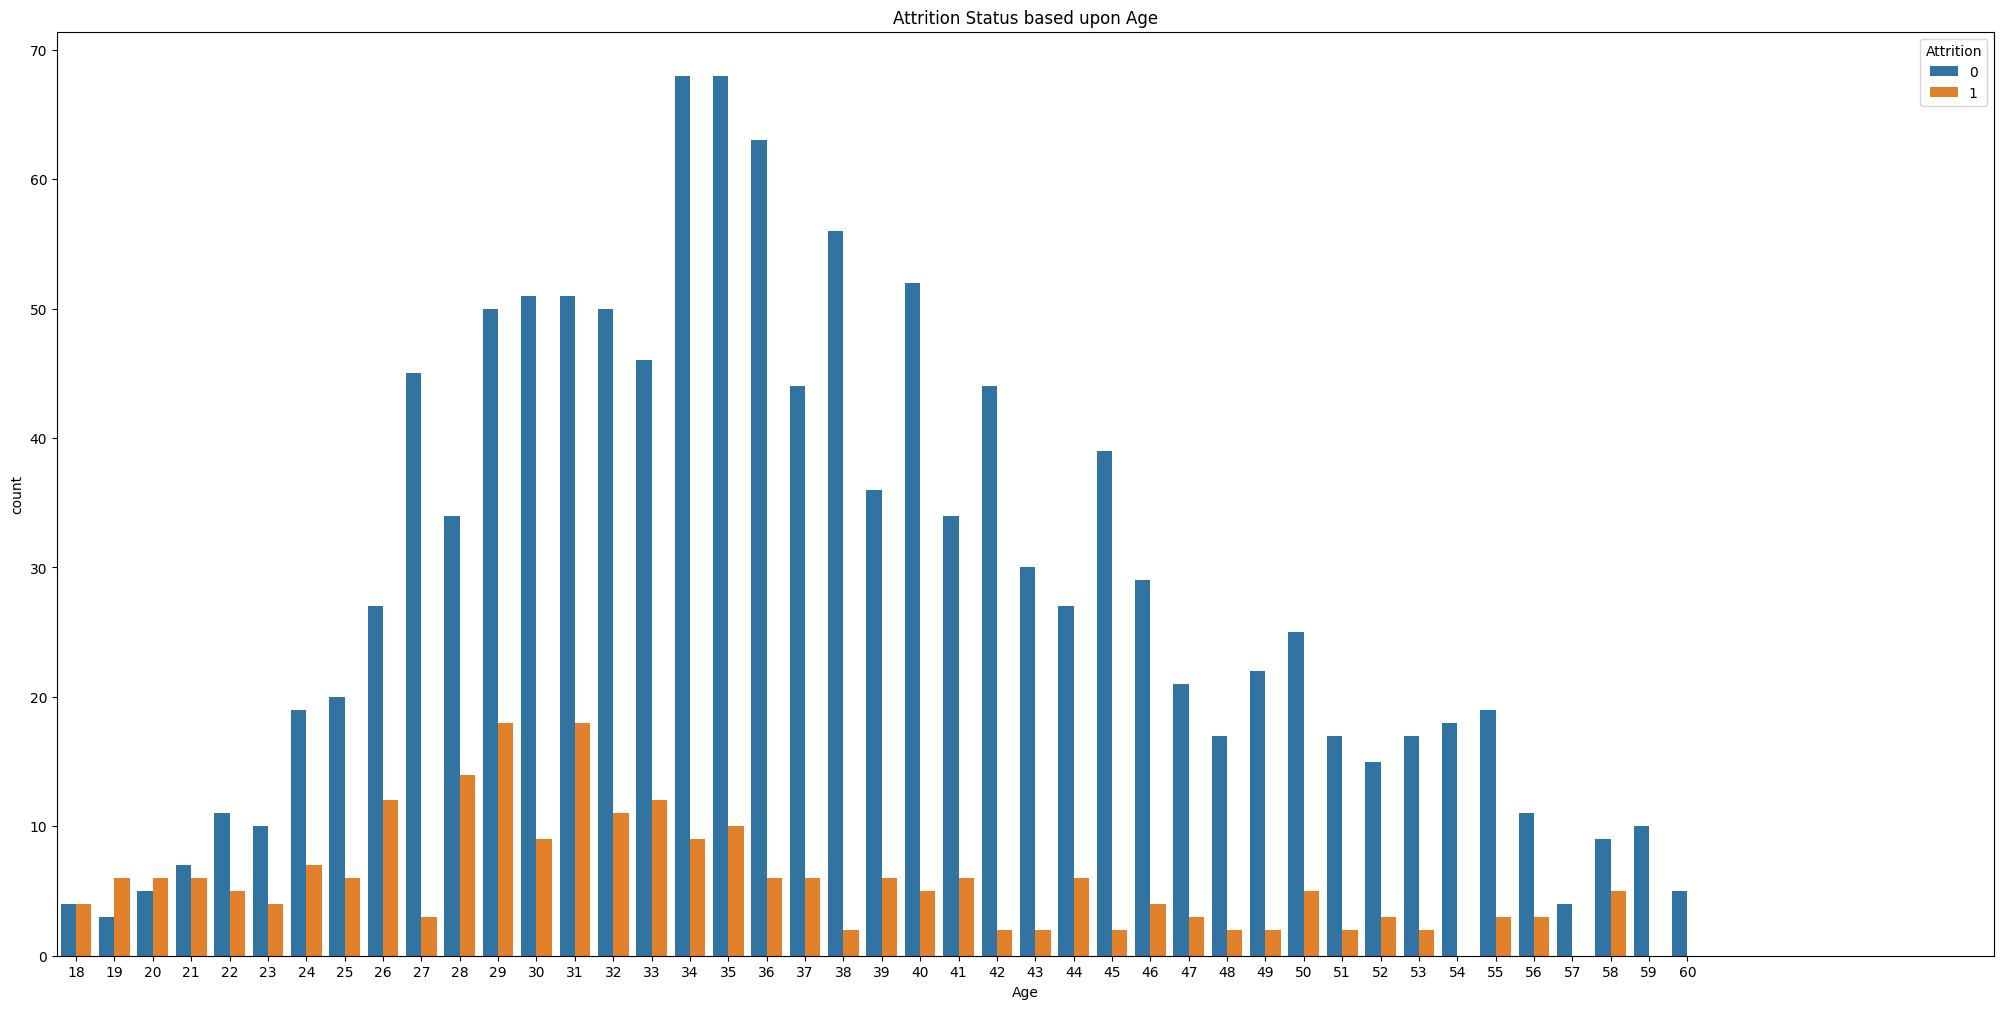

In [50]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'Age', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Age')
plt.xlim(-0.5, 50)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Job role</span>

(0.0, 300.0)

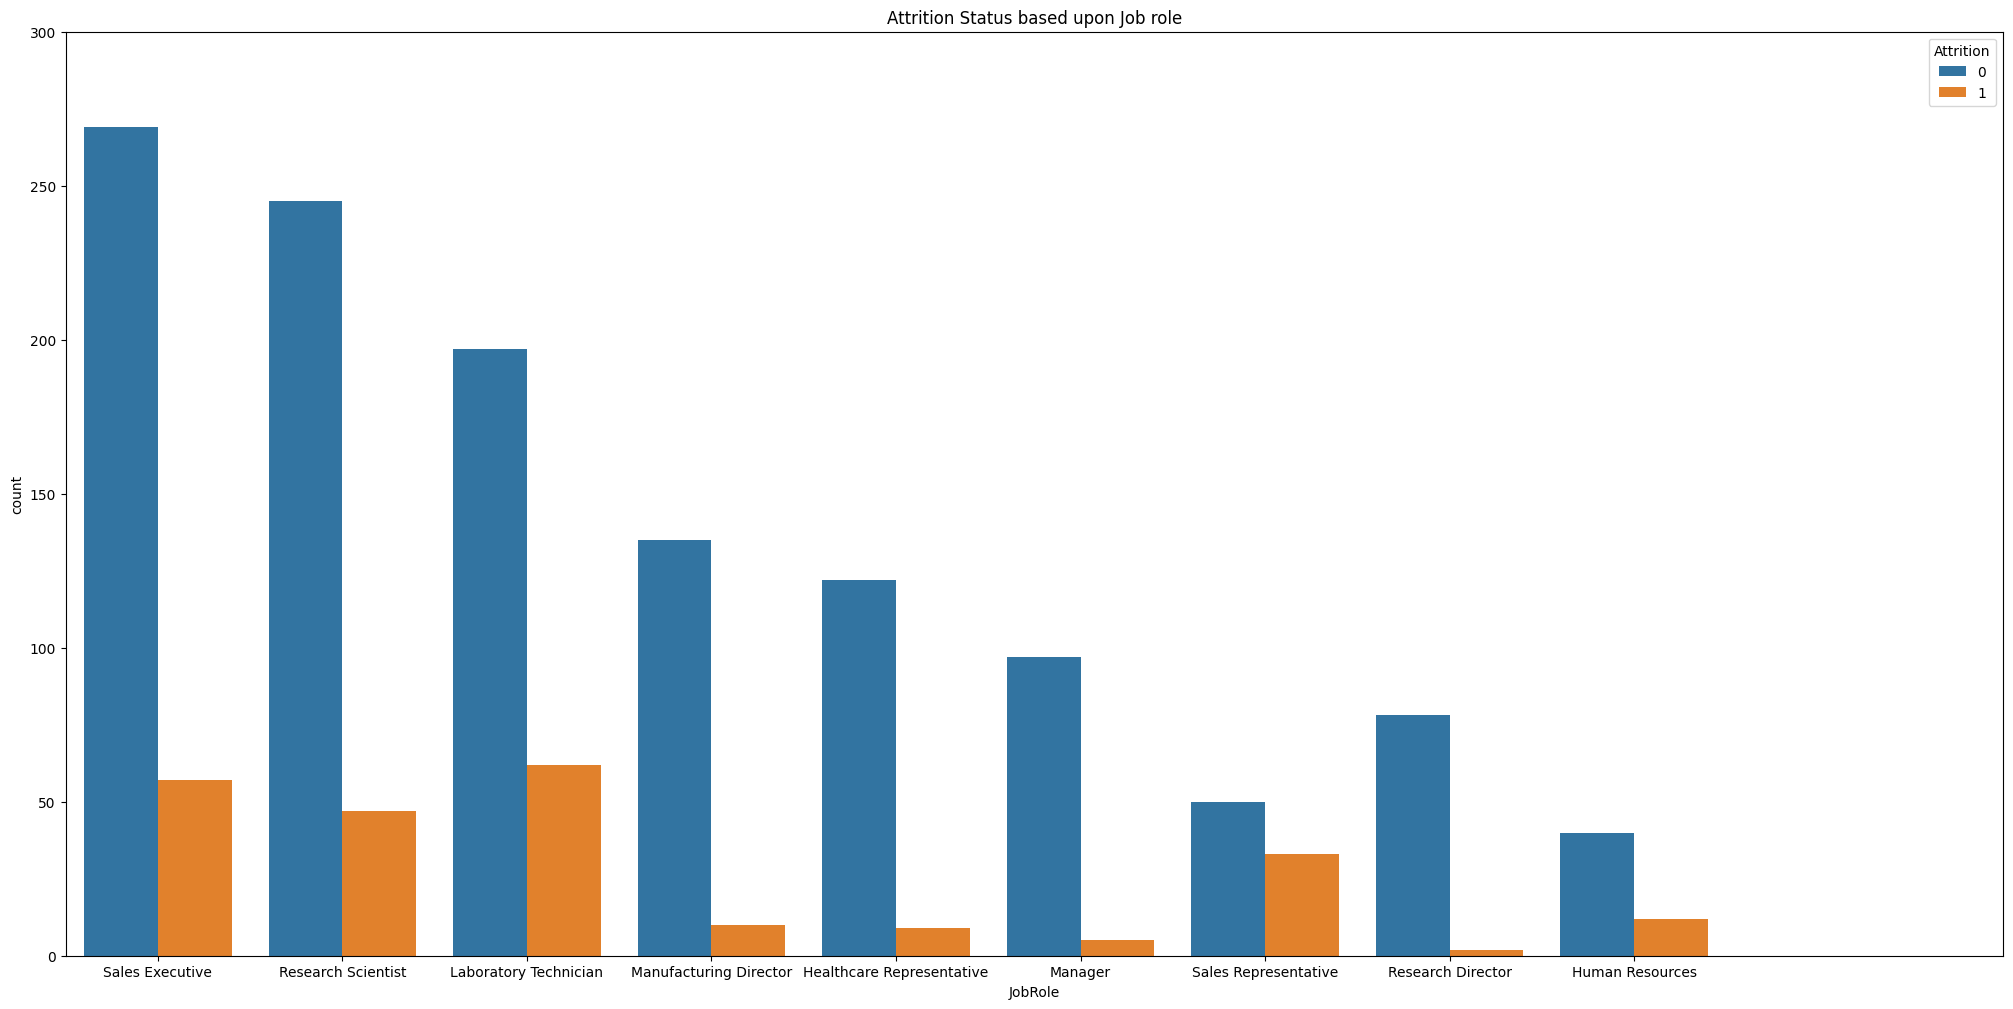

In [51]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Job role')
plt.xlim(-0.5, 10)  
plt.ylim(0,300)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Marital Status</span>

(-0.5, 3.0)

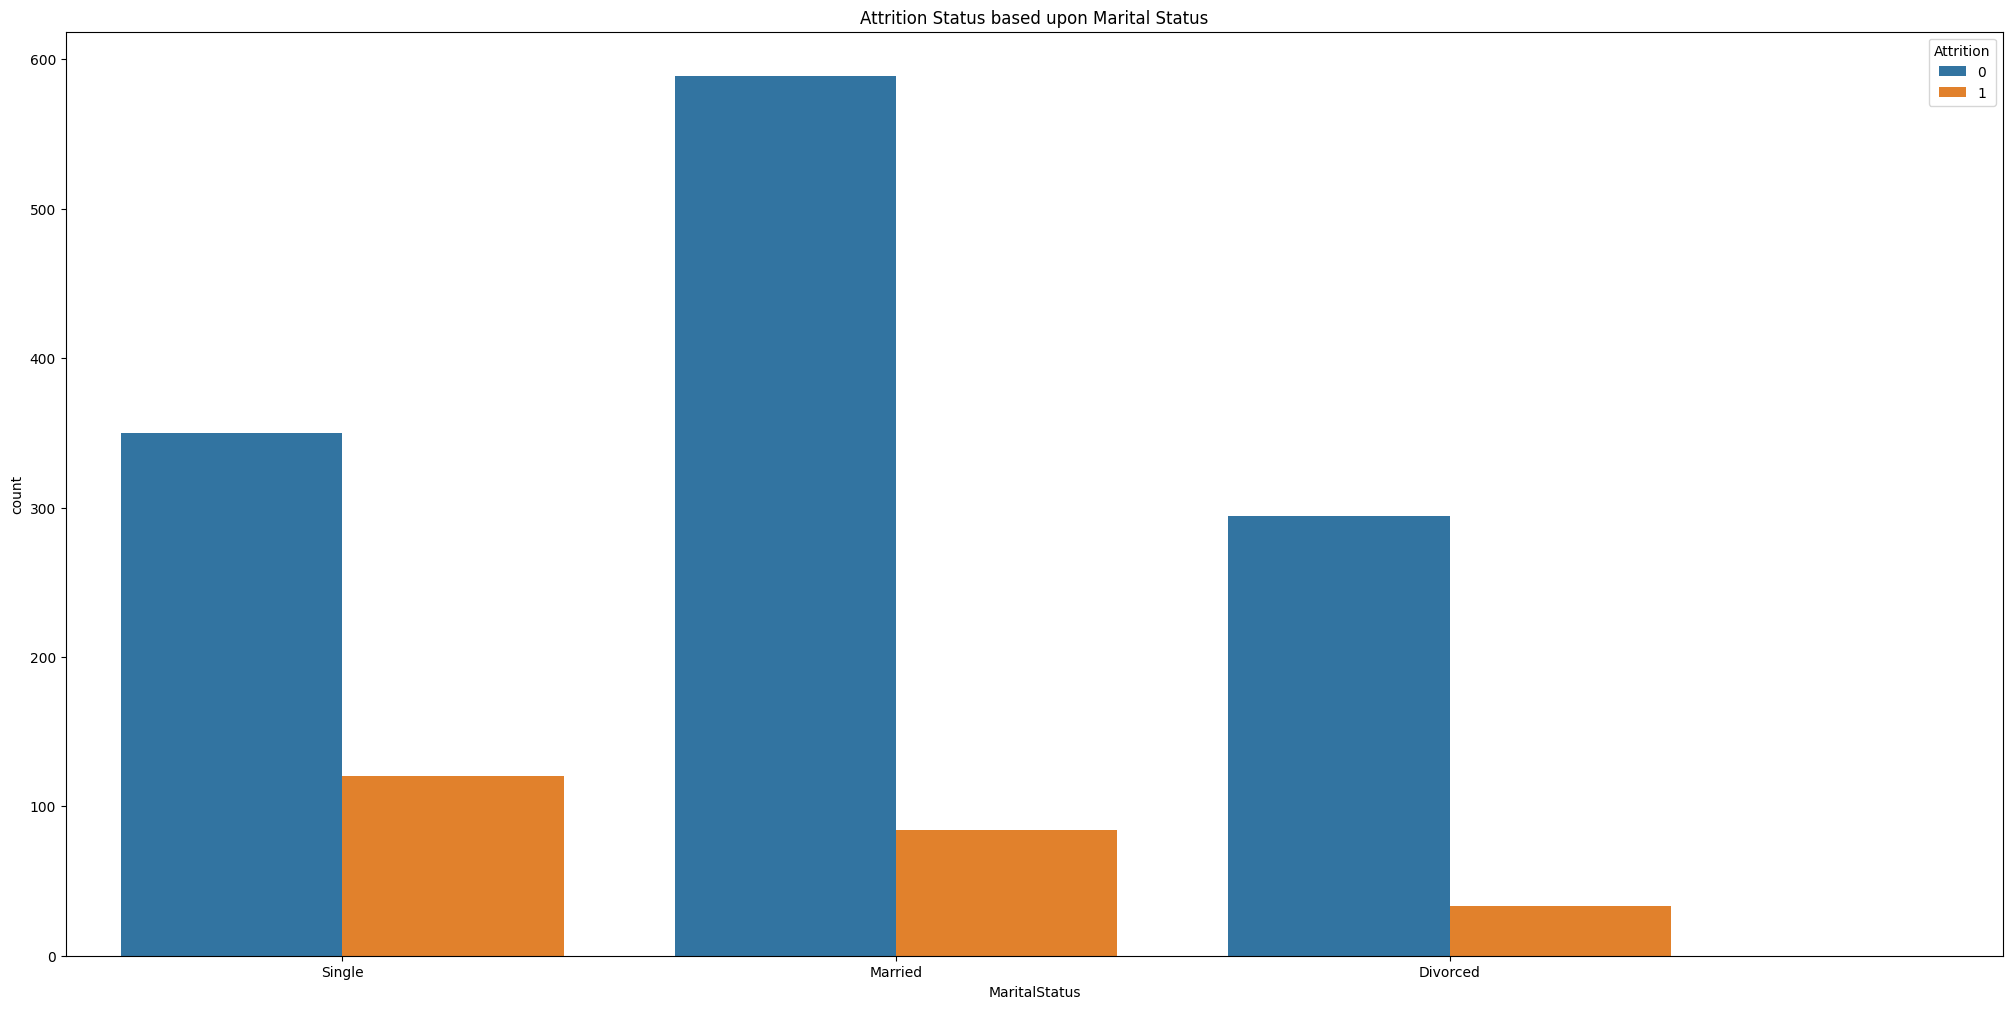

In [52]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Marital Status')
plt.xlim(-0.5, 3)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Job Involvement</span>

(0.0, 900.0)

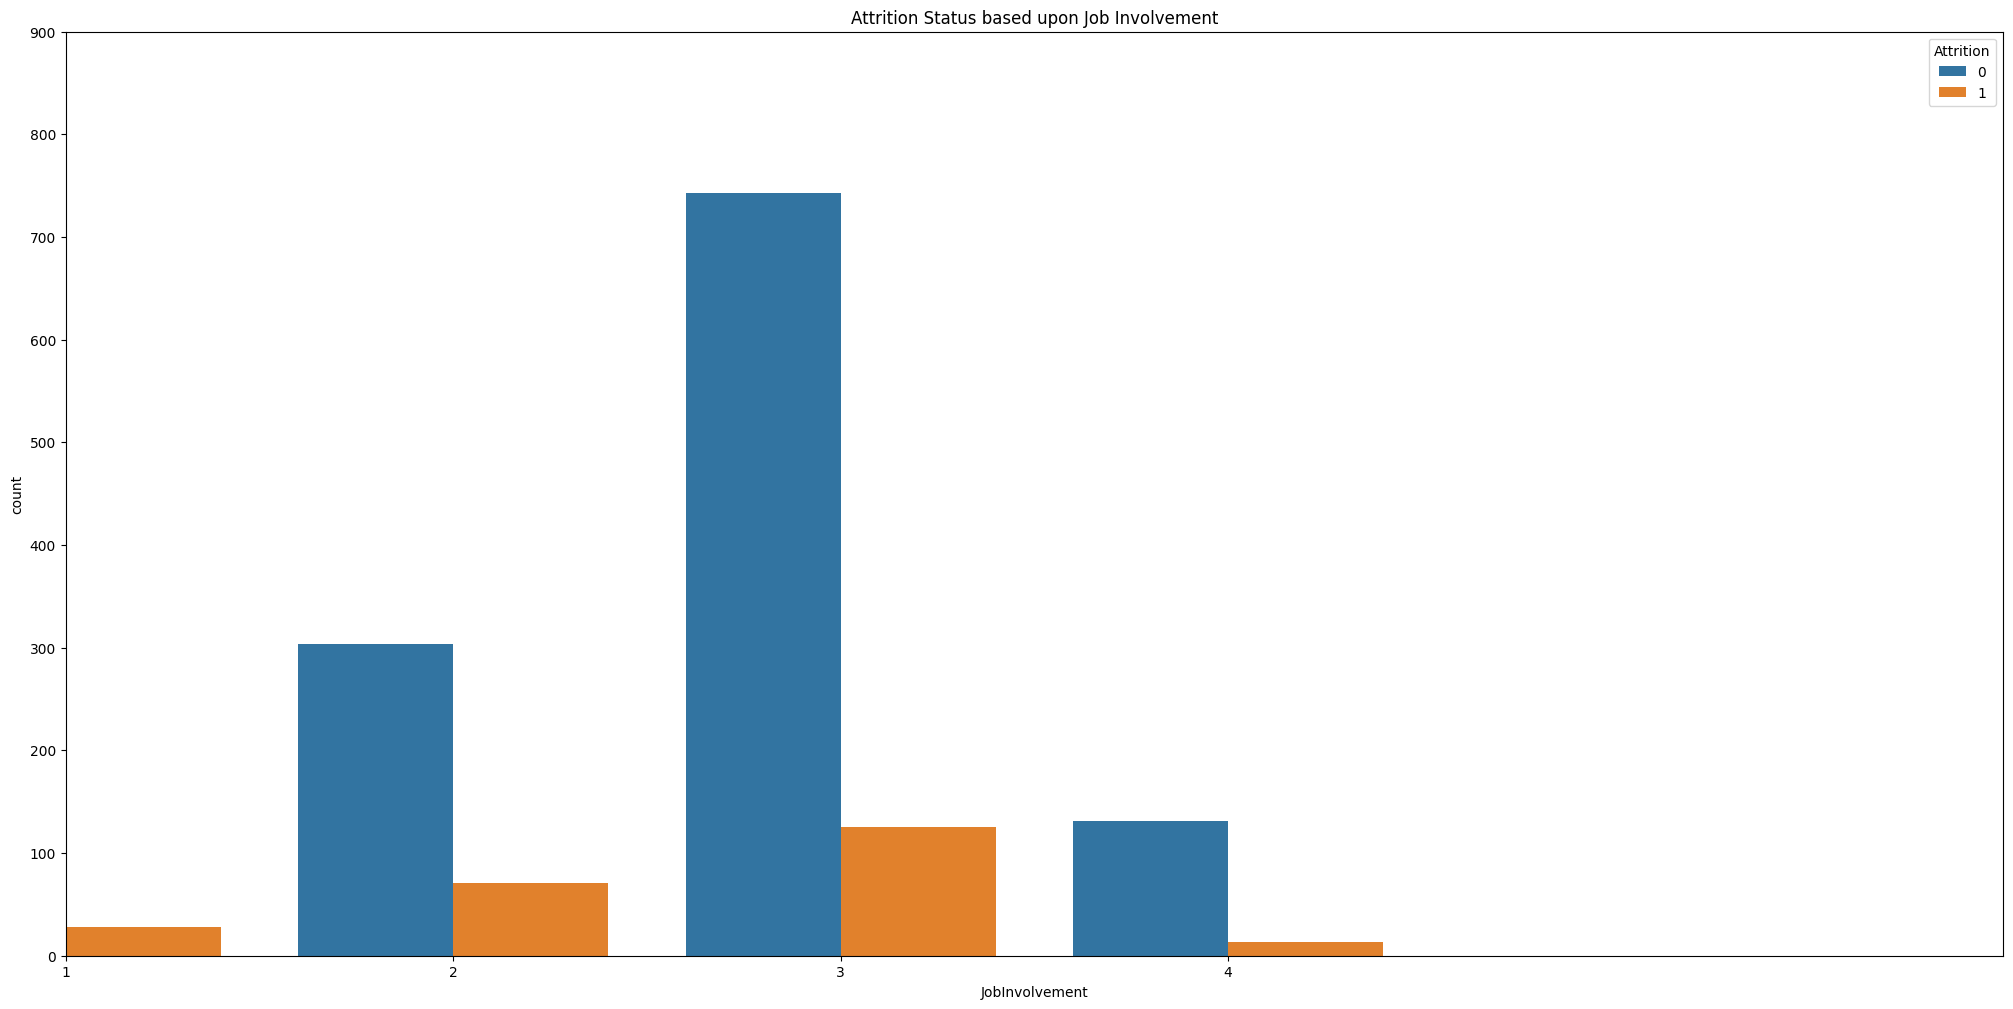

In [53]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Job Involvement')
plt.xlim(0,5)  
plt.ylim(0, 900)  

##  <span style = "color : lightgreen"> Attrition Status Based Upon Job Level</span>

(0.0, 500.0)

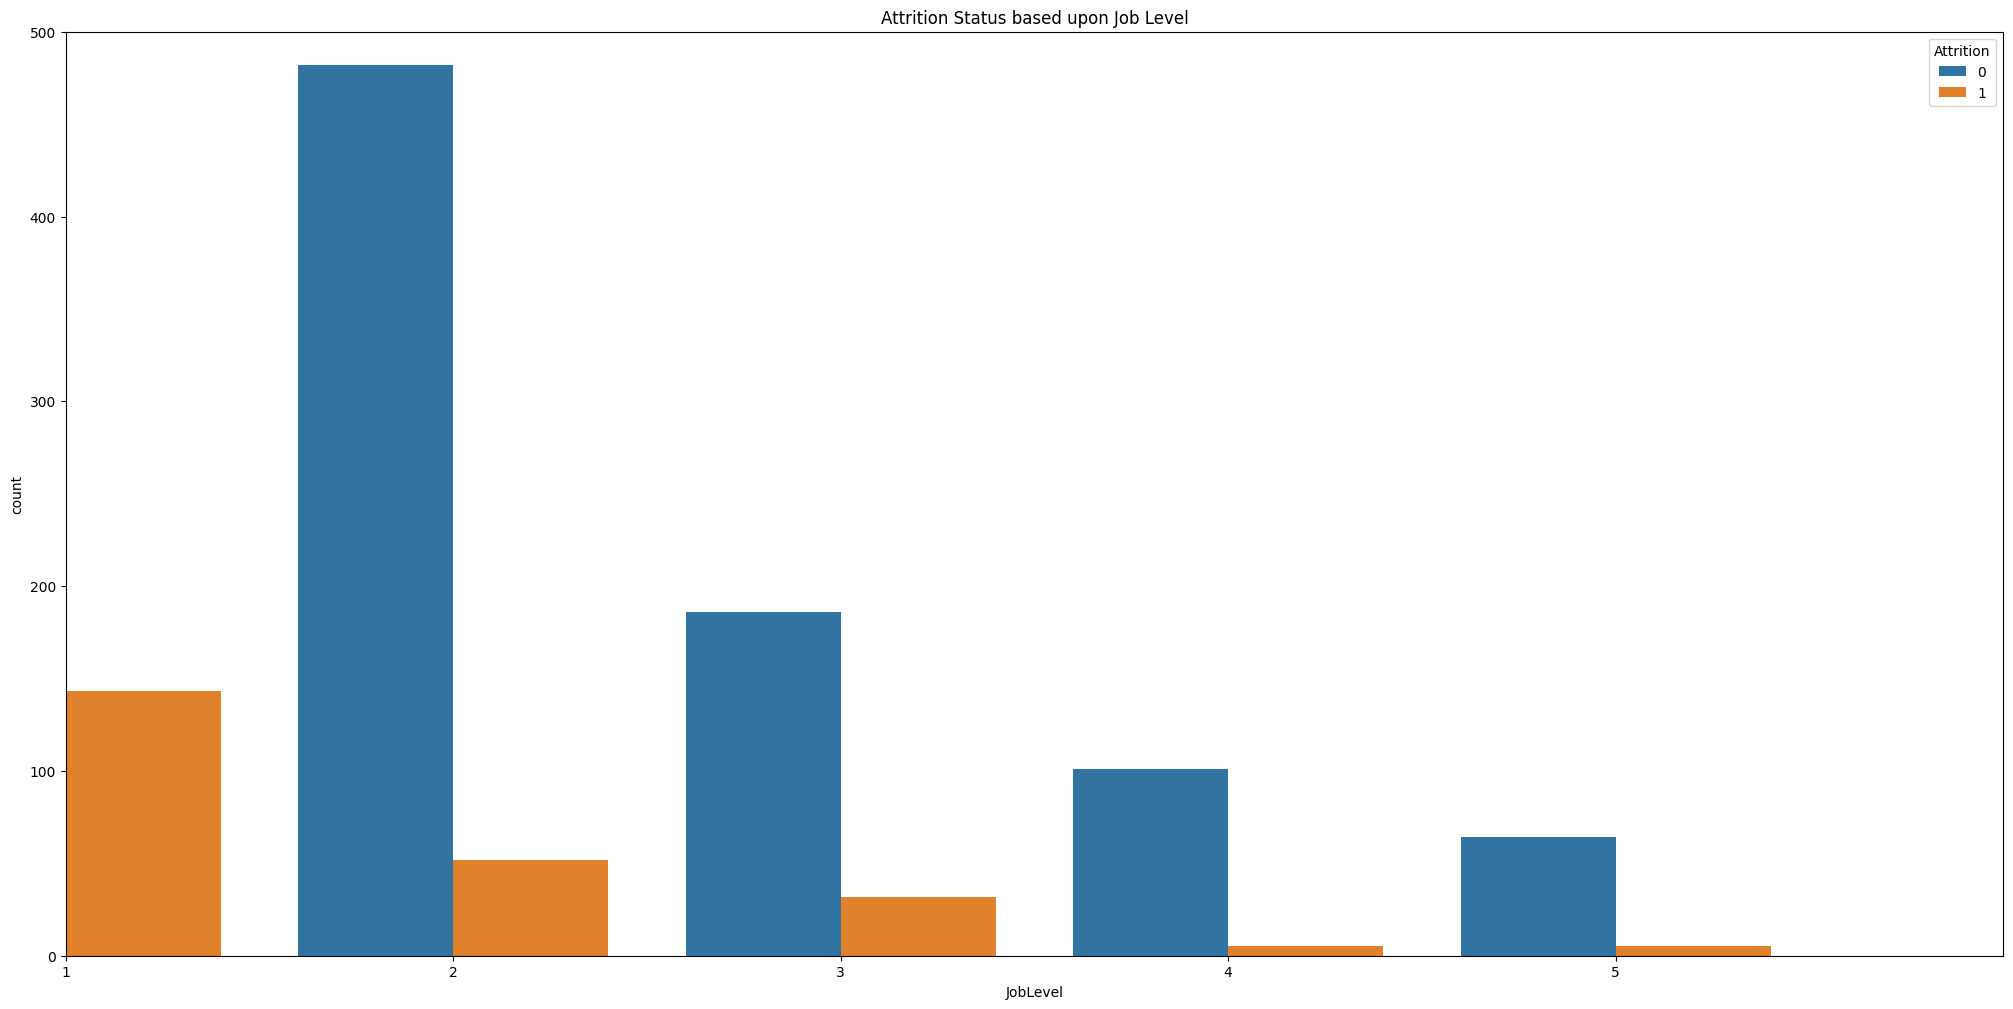

In [54]:
plt.figure(figsize=[25,12])
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)
plt.title('Attrition Status based upon Job Level')
plt.xlim(0,5)  
plt.ylim(0, 500)  

##  <span style = "color : lightgreen">Gender vs Monthly Income</span>

<Axes: xlabel='Gender', ylabel='MonthlyIncome'>

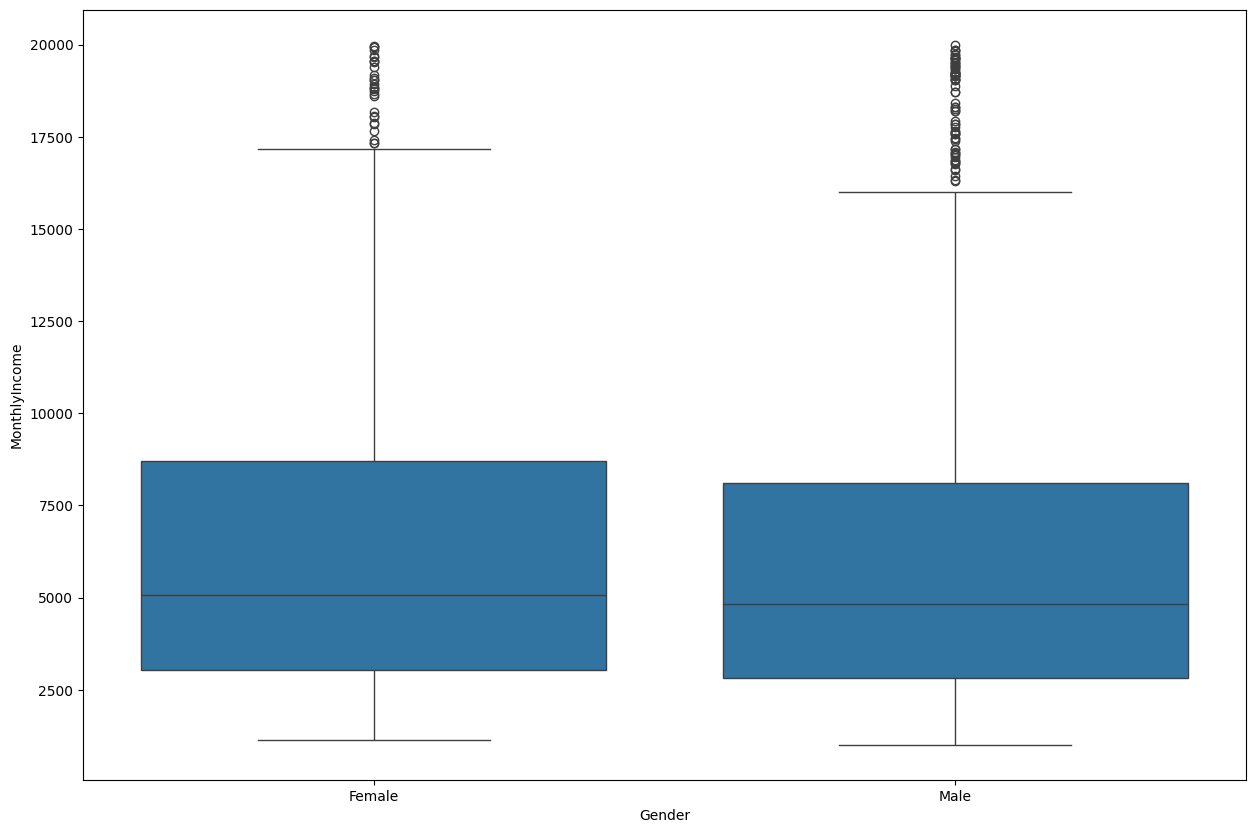

In [55]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Gender', y='MonthlyIncome', data=df)

##  <span style = "color : lightgreen">Monthly Income vs Job Role</span>

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

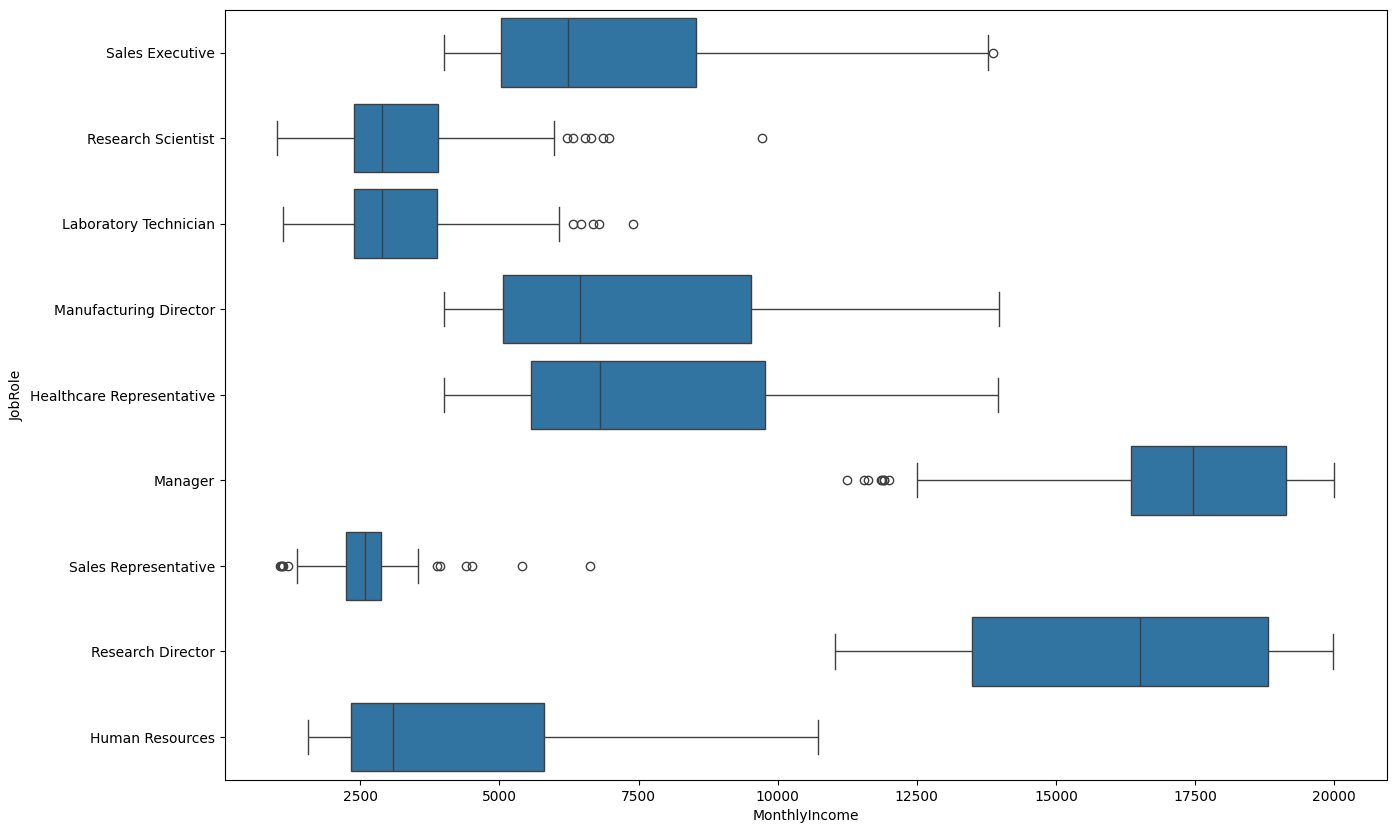

In [56]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyIncome', y='JobRole', data=df)

##  <span style = "color : lightgreen"> Attrition Status Based Upon Job Satisfaction</span>

Text(0.5, 1.0, 'Job satisfaction vs attrition')

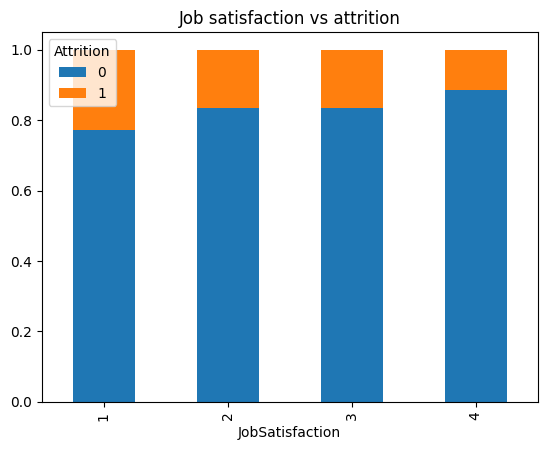

In [57]:
table=pd.crosstab(df.JobSatisfaction, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Job satisfaction vs attrition')

##  <span style = "color : lightgreen"> Attrition Status Based Upon Overtime</span>

Text(0.5, 1.0, 'Overtime vs attrition')

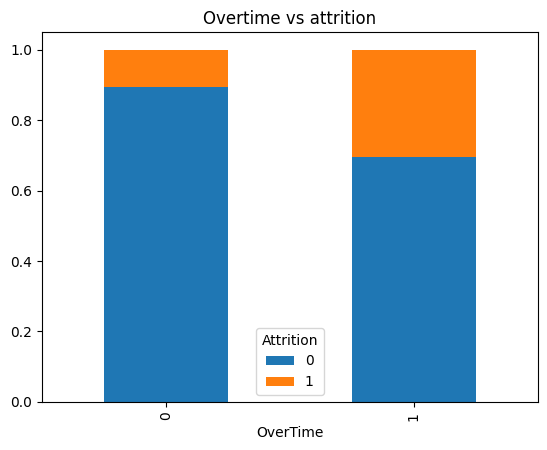

In [58]:
table=pd.crosstab(df.OverTime, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Overtime vs attrition')

##  <span style = "color : lightgreen"> Attrition Status Based Upon Business Travel</span>

Text(0.5, 1.0, 'Business Travel vs attrition')

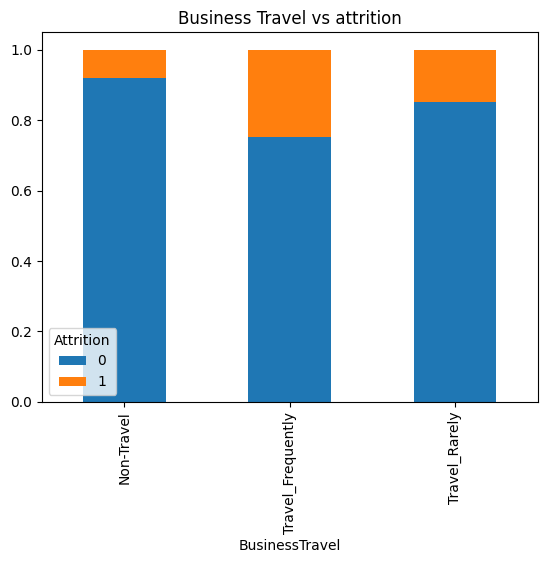

In [59]:
table=pd.crosstab(df.BusinessTravel, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Business Travel vs attrition')

##  <span style = "color : lightgreen"> Attrition Status Based Upon Year since last promotion</span>

Text(0.5, 1.0, 'Year since last promotion vs attrition')

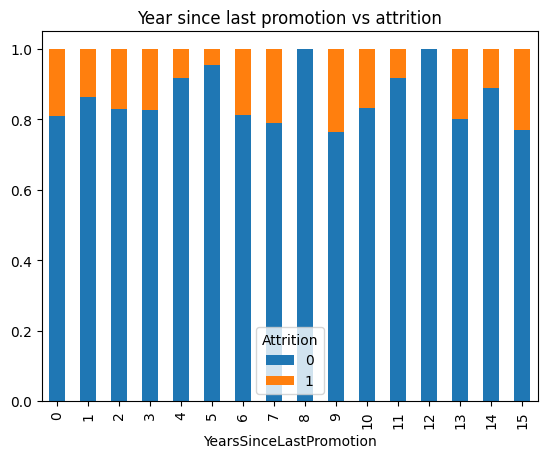

In [60]:
table=pd.crosstab(df.YearsSinceLastPromotion, df.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Year since last promotion vs attrition')

##  <span style = "color : lightgreen"> Correlation Heatmap</span>

<Axes: >

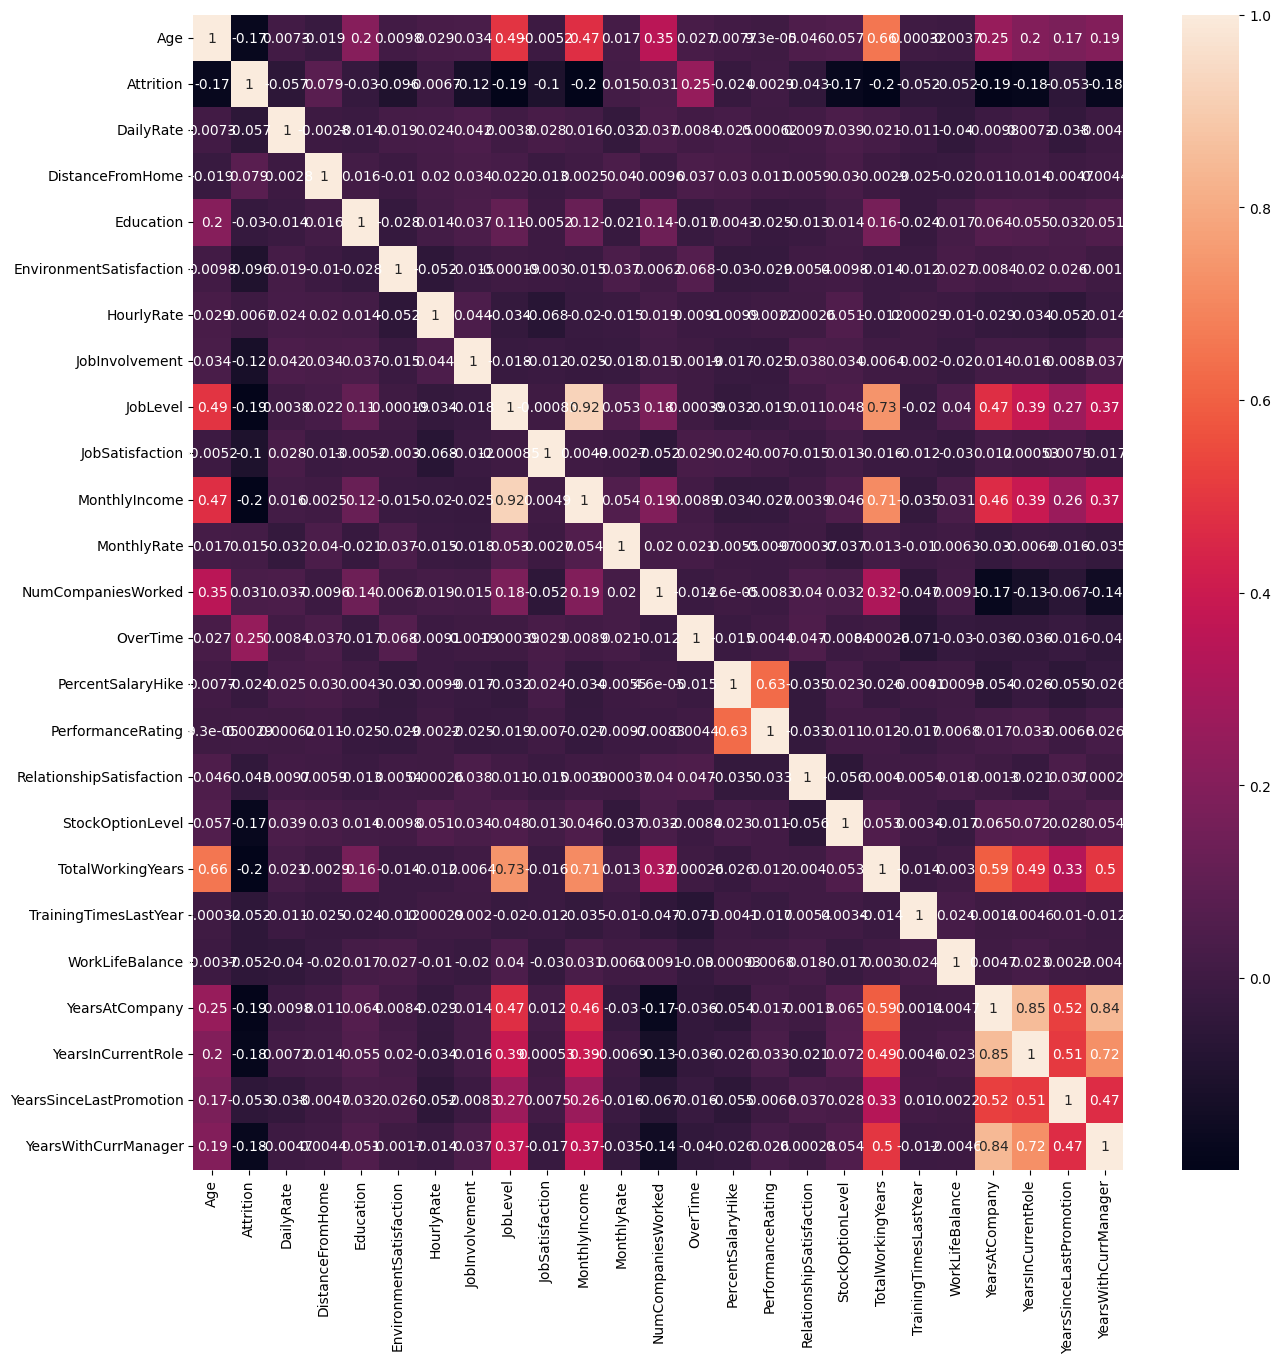

In [61]:
correlations = df.corr(numeric_only=True, method='spearman')
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True)

#  <span style = "color : red"> Data Preparation</span>

##  <span style = "color : lightgreen"> Categorical Variables Encoding</span>

In [62]:
ohe = OneHotEncoder()
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]
X_cat = ohe.fit_transform(X_cat).toarray()
X_cat = pd.DataFrame(X_cat)
X_cat.columns = ohe.get_feature_names_out(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [63]:
X_cat

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                           0.0                               0.0   
1                           0.0                               1.0   
2                           0.0                               0.0   
3                           0.0                               1.0   
4                           0.0                               0.0   
...                         ...                               ...   
1465                        0.0                               1.0   
1466                        0.0                               0.0   
1467                        0.0                               0.0   
1468                        0.0                               1.0   
1469                        0.0                               0.0   

      BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                              1.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              1.0                         0.0   
...                            ...                         ...   
1465                           0.0                         0.0   
1466                           1.0                         0.0   
1467                           1.0                         0.0   
1468                           0.0                         0.0   
1469                           1.0                         0.0   

      Department_Research & Development  Department_Sales  \
0                                   0.0               1.0   
1                                   1.0               0.0   
2                                   1.0               0.0   
3                                   1.0               0.0   
4                                   1.0               0.0   
...                                 ...               ...   
1465                                1.0               0.0   
1466                                1.0               0.0   
1467                                1.0               0.0   
1468                                0.0               1.0   
1469                                1.0               0.0   

      EducationField_Human Resources  EducationField_Life Sciences  \
0                                0.0                           1.0   
1                                0.0                           1.0   
2                                0.0                           0.0   
3                                0.0                           1.0   
4                                0.0                           0.0   
...                              ...                           ...   
1465                             0.0                           0.0   
1466                             0.0                           0.0   
1467                             0.0                           1.0   
1468                             0.0                           0.0   
1469                             0.0                           0.0   

      EducationField_Marketing  EducationField_Medical  ...  \
0                          0.0                     0.0  ...   
1                          0.0                     0.0  ...   
2                          0.0                     0.0  ...   
3                          0.0                     0.0  ...   
4                          0.0                     1.0  ...   
...                        ...                     ...  ...   
1465                       0.0                     1.0  ...   
1466                       0.0                     1.0  ...   
1467                       0.0                     0.0  ...   
1468                       0.0                     1.0  ...   
1469                       0.0                     1.0  ...   

      JobRole_Laboratory Technician  JobRole_Manager 

In [64]:
X_num = df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 
              'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
              'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 
              'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']]

X_all = pd.concat([X_num, X_cat], axis=1)

In [65]:
X_cat.shape

(1470, 26)

In [66]:
X_all

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
1465   36        884                23          2                        3   
1466   39        613                 6          1                        4   
1467   27        155                 4          3                        2   
1468   49       1023                 2          3                        4   
1469   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
1465          41               4         2                4           2571   
1466          42               2         3                1           9991   
1467          87               4         2                2           6142   
1468          63               2         2                2           5390   
1469          82               4         2                3           4404   

      ...  JobRole_Laboratory Technician  JobRole_Manager  \
0     ...                            0.0              0.0   
1     ...                            0.0              0.0   
2     ...                            1.0              0.0   
3     ...                            0.0              0.0   
4     ...                            1.0              0.0   
...   ...                            ...              ...   
1465  ...                            1.0              0.0   
1466  ...                            0.0              0.0   
1467  ...                            0.0              0.0   
1468  ...                            0.0              0.0   
1469  ...                            1.0              0.0   

      JobRole_Manufacturing Director  JobRole_Research Director  \
0                                0.0                        0.0   
1                                0.0                        0.0   
2                                0.0                        0.0   
3                                0.0                        0.0   
4                                0.0                        0.0   
...                              ...                        ...   
1465                             0.0                        0.0   
1466                             0.0                        0.0   
1467                             1.0                        0.0   
1468                             0.0                        0.0   
1469                             0.0                        0.0   

      JobRole_Research Scientist  JobRole_Sales Executive  \
0                            0.0                      1.0   
1                            1.0                      0.0   
2                            0.0                      0.0   
3                            1.0                      0.0   
4                            0.0                      0.0   
...                          ...                      ...   
1465                         0.0                      0.0   
1466                         0.0                      0.0   
1467                         0.0             

##  <span style = "color : lightgreen"> Data Scaling</span>

In [67]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_all)

In [68]:
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df.columns = [f'feature_{i+1}' for i in range(50)]
df_new = pd.concat([X_scaled_df, df['Attrition']], axis=1)
df_new.head()

feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.547619   0.715820   0.000000       0.25   0.333333   0.914286   
1   0.738095   0.126700   0.250000       0.00   0.666667   0.442857   
2   0.452381   0.909807   0.035714       0.25   1.000000   0.885714   
3   0.357143   0.923407   0.071429       0.75   1.000000   0.371429   
4   0.214286   0.350036   0.035714       0.00   0.000000   0.142857   

   feature_7  feature_8  feature_9  feature_10  ...  feature_42  feature_43  \
0   0.666667       0.25   1.000000    0.262454  ...         0.0         0.0   
1   0.333333       0.25   0.333333    0.217009  ...         0.0         0.0   
2   0.333333       0.00   0.666667    0.056925  ...         0.0         0.0   
3   0.666667       0.00   0.666667    0.100053  ...         0.0         0.0   
4   0.666667       0.00   0.333333    0.129489  ...         0.0         0.0   

   feature_44  feature_45  feature_46  feature_47  feature_48  feature_49  \
0         0.0         0.0         1.0         0.0         0.0         0.0   
1         0.0         1.0         0.0         0.0         0.0         1.0   
2         0.0         0.0         0.0         0.0         0.0         0.0   
3         0.0         1.0         0.0         0.0         0.0         1.0   
4         0.0         0.0         0.0         0.0         0.0         1.0   

   feature_50  Attrition  
0         1.0          1  
1         0.0          0  
2         1.0          1  
3         0.0          0  
4         0.0          0  

[5 rows x 51 columns]

##  <span style = "color : lightgreen"> Train and Test datasets</span>

In [69]:
X = df_new.drop(columns='Attrition')
y = df_new['Attrition']
class_0 = df_new[df_new['Attrition'] == 0]
class_1 = df_new[df_new['Attrition'] == 1]

class_0_test = class_0.sample(frac=0.1, random_state=42)
class_1_test = class_1.sample(frac=0.1, random_state=42)

test_set = pd.concat([class_0_test, class_1_test])

class_0_train = class_0.drop(class_0_test.index)
class_1_train = class_1.drop(class_1_test.index)

training_set = pd.concat([class_0_train, class_1_train])

class_0_train_full = class_0_train.sample(frac=0.8, random_state=42)
class_1_train_full = class_1_train.sample(frac=0.8, random_state=42)

train_set = pd.concat([class_0_train_full, class_1_train_full])

class_0_val = class_0_train.drop(class_0_train_full.index)
class_1_val = class_1_train.drop(class_1_train_full.index)

val_set = pd.concat([class_0_val, class_1_val])

X_train = train_set.drop(columns='Attrition')
y_train = train_set['Attrition']
X_val = val_set.drop(columns='Attrition')
y_val = val_set['Attrition']
X_test = test_set.drop(columns='Attrition')
y_test = test_set['Attrition']

print(f'Train set size: {len(X_train)}')
print(f'Validation set size: {len(X_val)}')
print(f'Test set size: {len(X_test)}')

Train set size: 1058
Validation set size: 265
Test set size: 147


##  <span style = "color : lightgreen"> Some Classification models before balancing the class </span>

###  <span style = "color : white">Logistic Regresion </span>

In [70]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_train, y_train)
                
                y_pred_train = lreg.predict(X_train)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_train, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

Best hyperparameters for Logistic Regression:
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [71]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_train, y_train)

y_pred_train = best_lreg.predict(X_train)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_train, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.8950850661625709
Logistic Regression Validation Accuracy:
0.8754716981132076
Logistic Regression Test Accuracy:
0.8707482993197279
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[213   9]
 [ 24  19]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       222
           1       0.68      0.44      0.54        43

    accuracy                           0.88       265
   macro avg       0.79      0.70      0.73       265
weighted avg       0.86      0.88      0.86       265

--------------------------------------------------------------------------


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


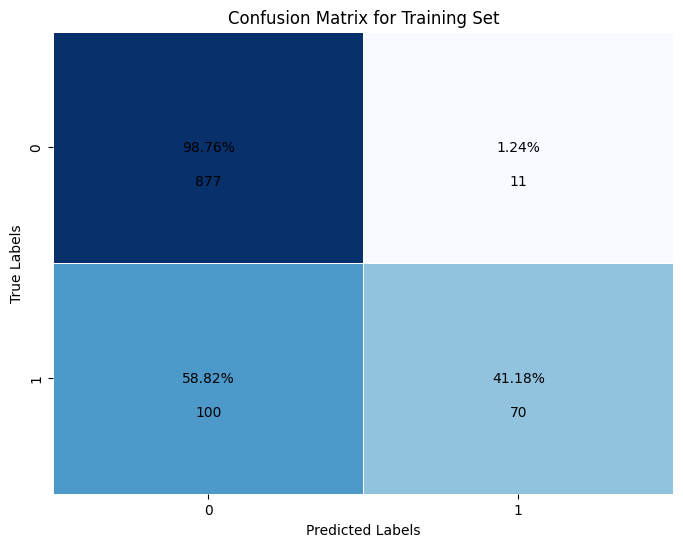

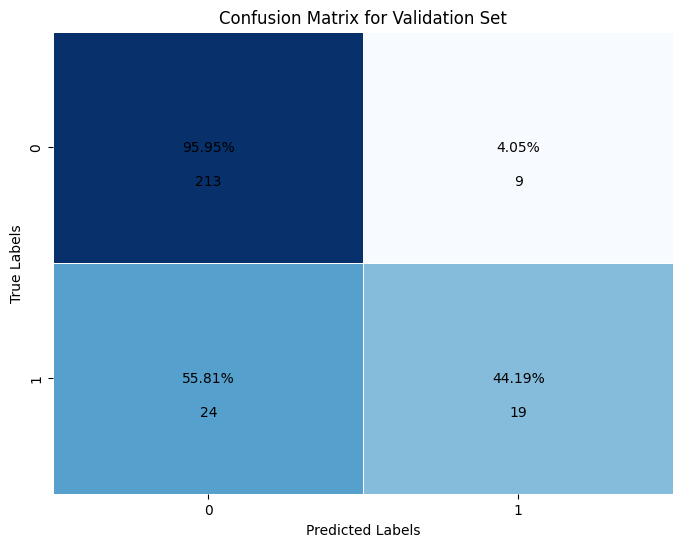

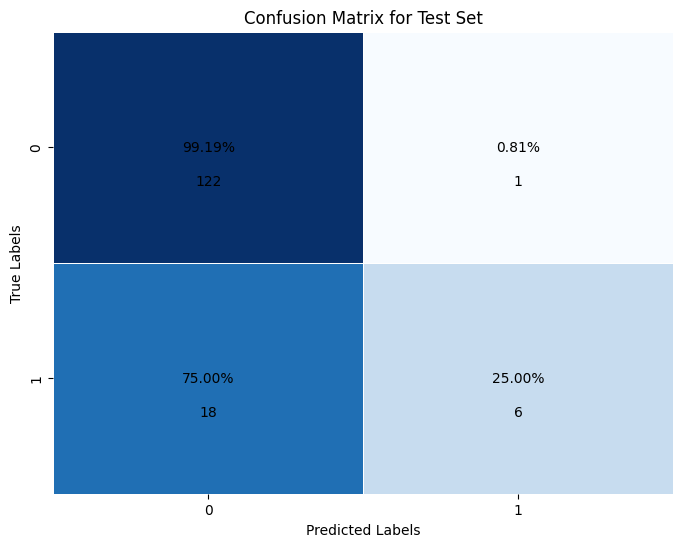

In [72]:
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    conf_matrix = confusion_matrix(y_true, y_pred)
    row_sums = conf_matrix.sum(axis=1, keepdims=True)
    conf_matrix_percent = conf_matrix / row_sums * 100
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix_percent, annot=False, fmt=".2f", cmap="Blues", cbar=False, 
                linewidths=.5)

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            plt.text(j + 0.5, i + 0.5, f"{conf_matrix_percent[i, j]:.2f}%",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
            plt.text(j + 0.5, i + 0.65, f"{conf_matrix[i, j]}",
                     horizontalalignment="center",
                     verticalalignment="center", color="black", fontsize=10)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

###  <span style = "color : white"> Decision Tree Classifier</span>

In [73]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    
    'min_samples_leaf': [8, 10, 12, 15]
    }

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                            
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_train, y_train)

                        y_pred_train = dt_classifier.predict(X_train)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_train, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'min_samples_leaf': 15}


In [74]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_train, y_train)

y_pred_train = best_dt_classifier.predict(X_train)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_train, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.8818525519848771
Decision Tree Validation Accuracy:
0.8641509433962264
Decision Tree Test Accuracy:
0.8231292517006803
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[212  10]
 [ 26  17]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       222
           1       0.63      0.40      0.49        43

    accuracy                           0.86       265
   macro avg       0.76      0.68      0.70       265
weighted avg       0.85      0.86      0.85       265

--------------------------------------------------------------------------


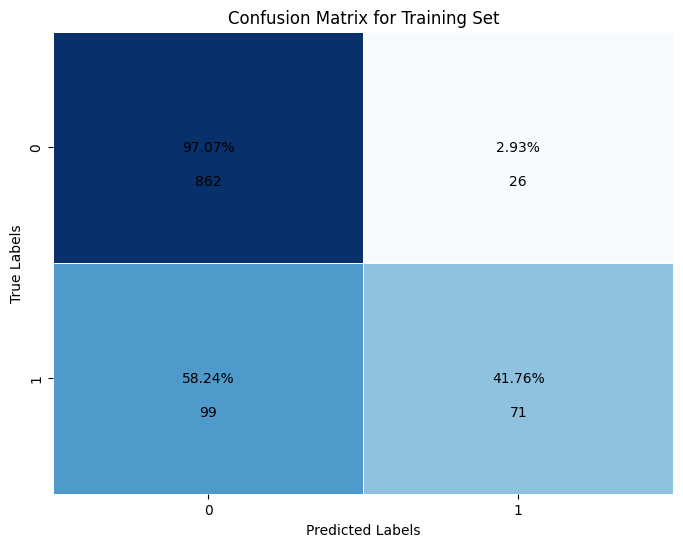

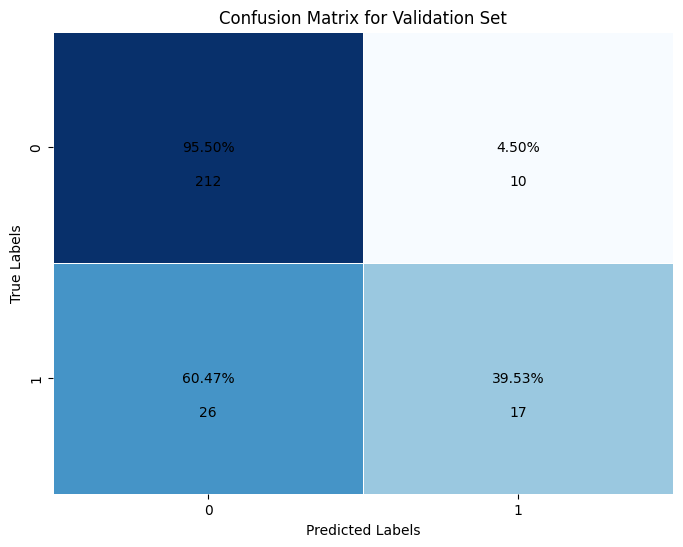

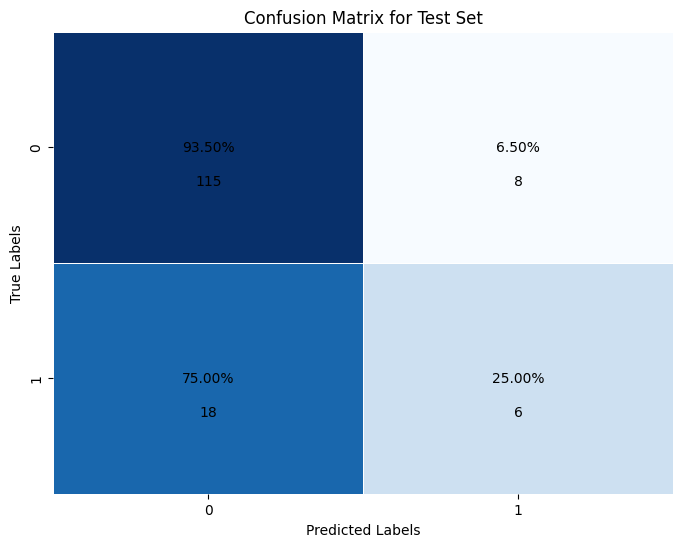

In [75]:
plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

###  <span style = "color : white"> Random Forest Classifier</span>

In [76]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_train, y_train)

                        y_pred_train = rf_classifier.predict(X_train)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_train, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                                
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 600, 'min_samples_leaf': 8}


In [77]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train, y_train)

y_pred_train = best_rf_classifier.predict(X_train)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_train, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.8686200378071833
Random Forest Validation Accuracy:
0.8566037735849057
Random Forest Test Accuracy:
0.8367346938775511
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[222   0]
 [ 38   5]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       222
           1       1.00      0.12      0.21        43

    accuracy                           0.86       265
   macro avg       0.93      0.56      0.56       265
weighted avg       0.88      0.86      0.81       265

--------------------------------------------------------------------------


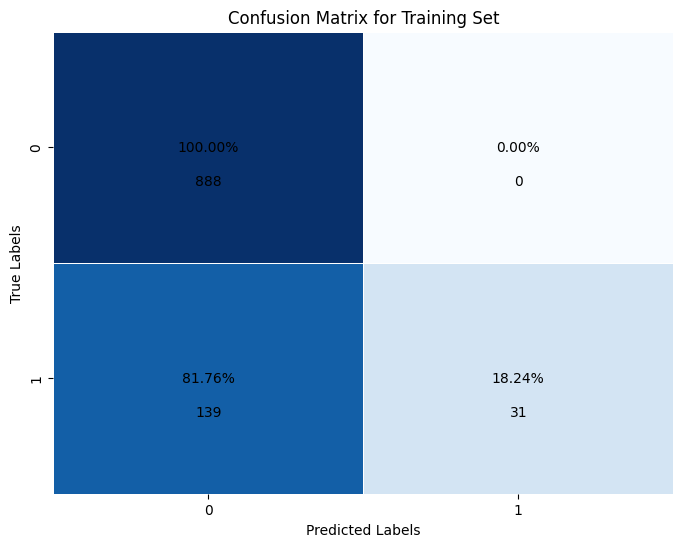

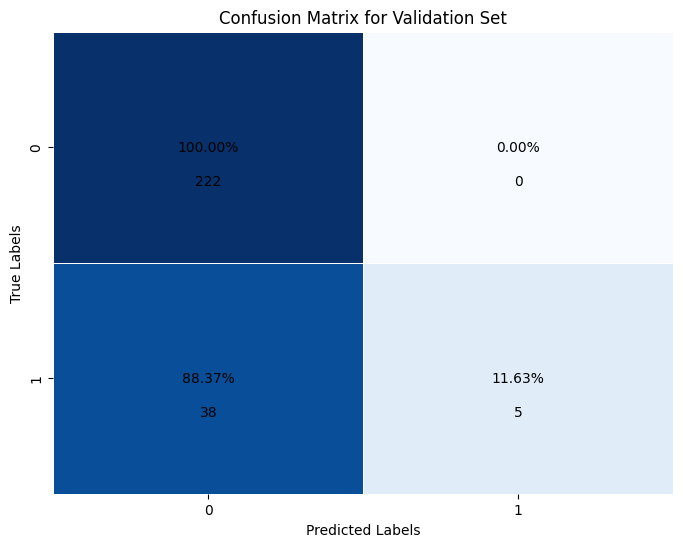

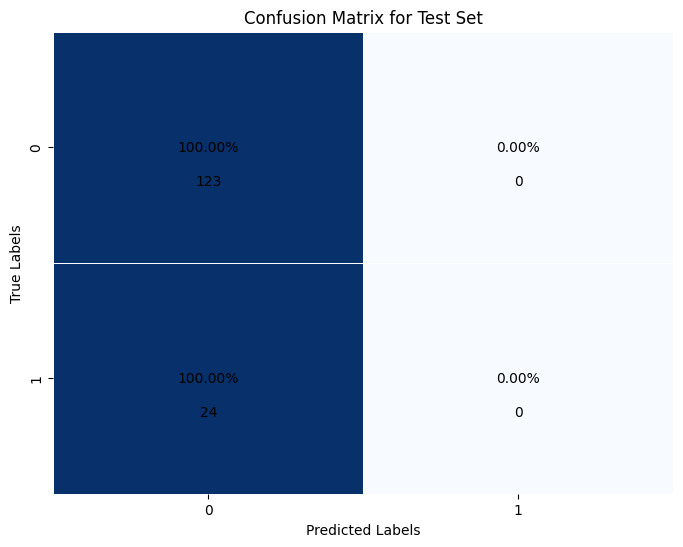

In [78]:
plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

###  <span style = "color : white"> Gradient Boosting Classifier</span>

In [79]:
gb_param_grid = {
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_train, y_train)

                        y_pred_train = gb_classifier.predict(X_train)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_train, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                # 'max_depth': max_depth,
                                # 'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 600, 'learning_rate': 0.01, 'min_samples_leaf': 8}


In [80]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_train, y_train)

y_pred_train = best_gb_classifier.predict(X_train)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_train, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.9262759924385633
Gradient Boosting Validation Accuracy:
0.879245283018868
Gradient Boosting Test Accuracy:
0.8707482993197279
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[217   5]
 [ 27  16]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       222
           1       0.76      0.37      0.50        43

    accuracy                           0.88       265
   macro avg       0.83      0.67      0.72       265
weighted avg       0.87      0.88      0.86       265

--------------------------------------------------------------------------


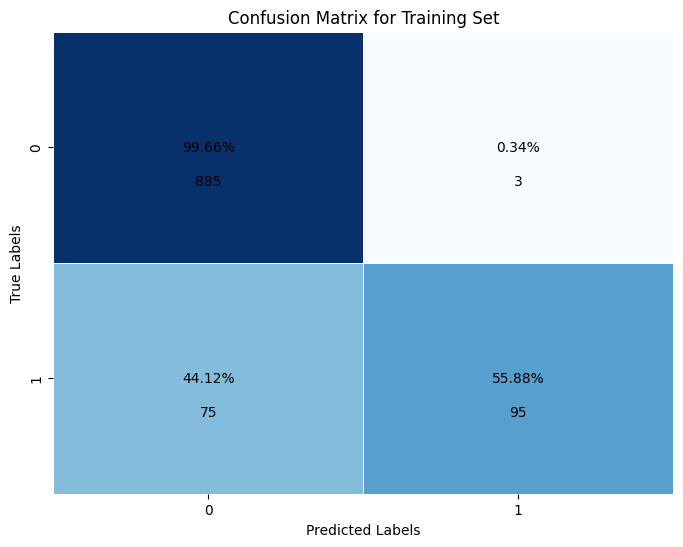

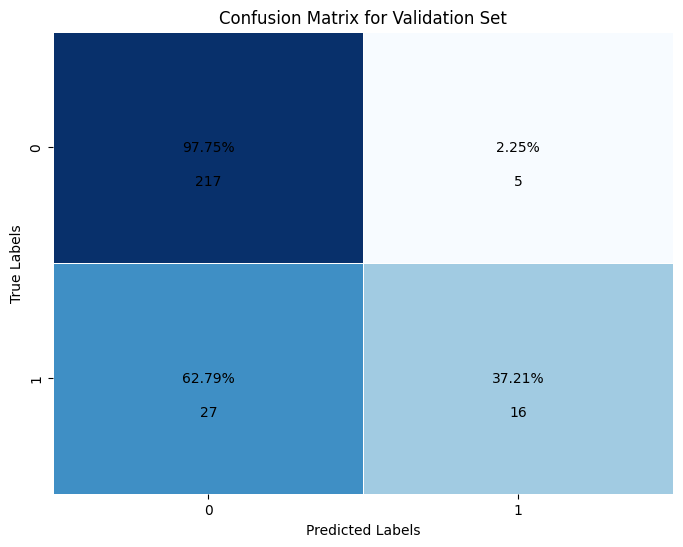

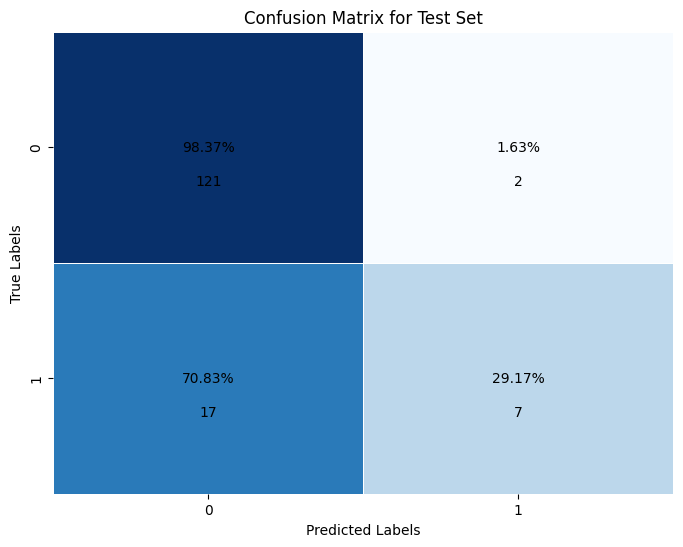

In [81]:
plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

###  <span style = "color : white"> Support Vector Machine</span>

In [82]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_train, y_train)

                    y_pred_train = svm_classifier.predict(X_train)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_train, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 10, 'kernel': 'linear', 'gamma': 'scale', 'degree': 2}


In [83]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_train, y_train)

y_pred_train = best_svm_classifier.predict(X_train)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_train, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.8969754253308129
SVM Validation Accuracy:
0.8981132075471698
SVM Test Accuracy:
0.8639455782312925
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[213   9]
 [ 18  25]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       222
           1       0.74      0.58      0.65        43

    accuracy                           0.90       265
   macro avg       0.83      0.77      0.79       265
weighted avg       0.89      0.90      0.89       265

--------------------------------------------------------------------------


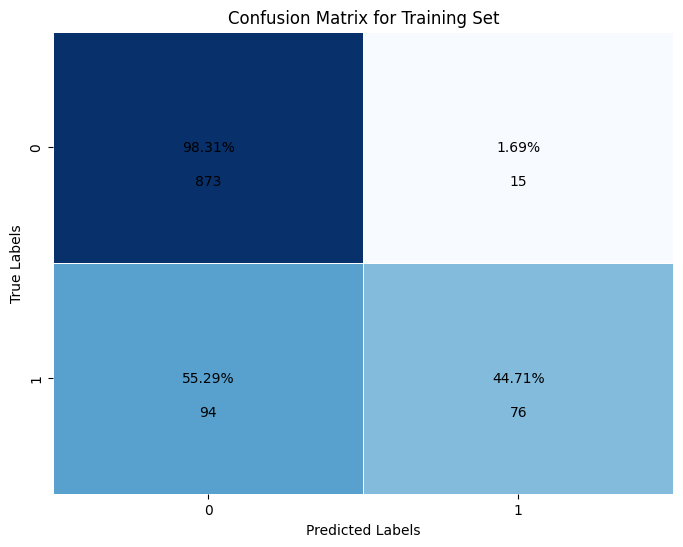

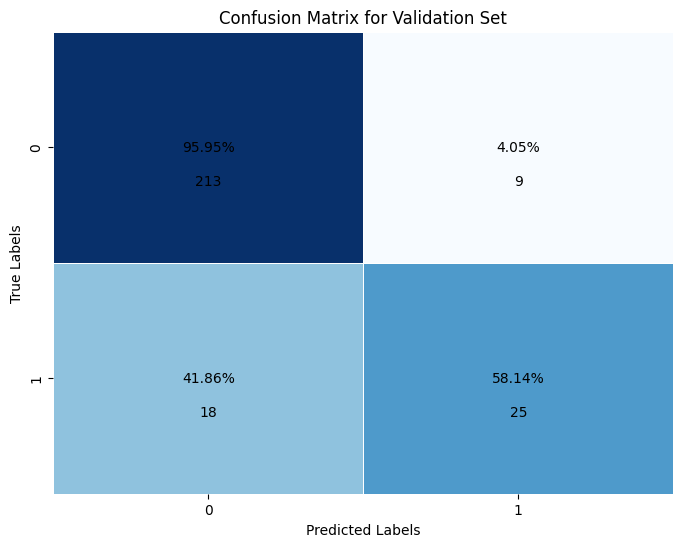

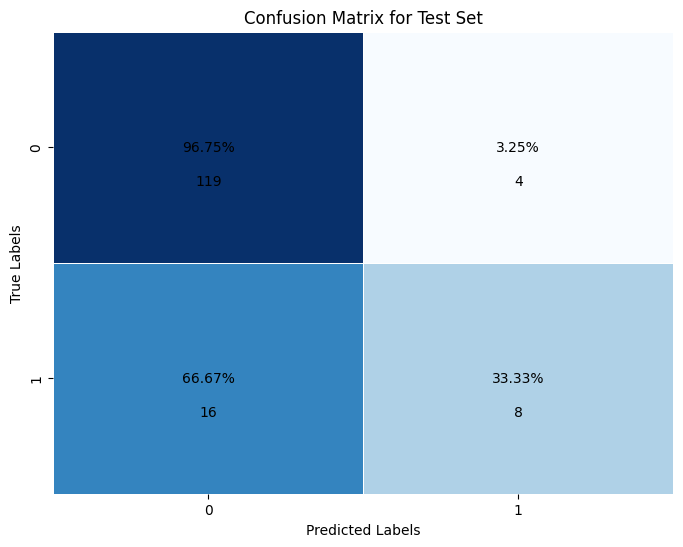

In [84]:
plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : lightgreen"> Class Balancing</span>

##  <span style = "color : yellow"> Undersampling </span>

###  <span style = "color : red"> Random Undersampling </span>

In [85]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

###  <span style = "color : red"> Nearmiss </span>

In [86]:
nm = NearMiss()
X_nm, y_nm = nm.fit_resample(X_train, y_train)

###  <span style = "color : red"> TomekLinks </span>

In [87]:
tomek = TomekLinks()
X_tomek, y_tomek = tomek.fit_resample(X_train, y_train)

##  <span style = "color : yellow"> Oversampling </span>

###  <span style = "color : red"> SMOTE </span>

In [88]:
smote = SMOTE(random_state=42, sampling_strategy='minority')
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

###  <span style = "color : red"> Random Ovrsampling </span>

In [89]:
ros = RandomOverSampler(random_state=42, sampling_strategy='minority')
X_ros, y_ros = ros.fit_resample(X_train, y_train)

###  <span style = "color : red"> ADASYN </span>

In [90]:
adasyn = ADASYN(random_state=42, sampling_strategy='minority')
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

##  <span style = "color : yellow"> combination of Oversampling & Undersampling </span>

###  <span style = "color : red"> SMOTETomek </span>

In [91]:
smotetomek = SMOTETomek(random_state=42)
X_smt, y_smt = smotetomek.fit_resample(X_train, y_train)

#  <span style = "color : orange"> Classification Models</span>

#  <span style = "color : GREEN"> SMOTE </span>

##  <span style = "color : white"> Logistic Regression</span>

In [92]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_train_smote, y_train_smote)
                
                y_pred_train = lreg.predict(X_train_smote)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_train_smote, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/SMOTE_lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

Best hyperparameters for Logistic Regression:
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [93]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_train_smote, y_train_smote)

y_pred_train = best_lreg.predict(X_train_smote)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_train_smote, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.7984234234234234
Logistic Regression Validation Accuracy:
0.7849056603773585
Logistic Regression Test Accuracy:
0.7551020408163265
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[171  51]
 [  6  37]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       222
           1       0.42      0.86      0.56        43

    accuracy                           0.78       265
   macro avg       0.69      0.82      0.71       265
weighted avg       0.88      0.78      0.81       265

--------------------------------------------------------------------------


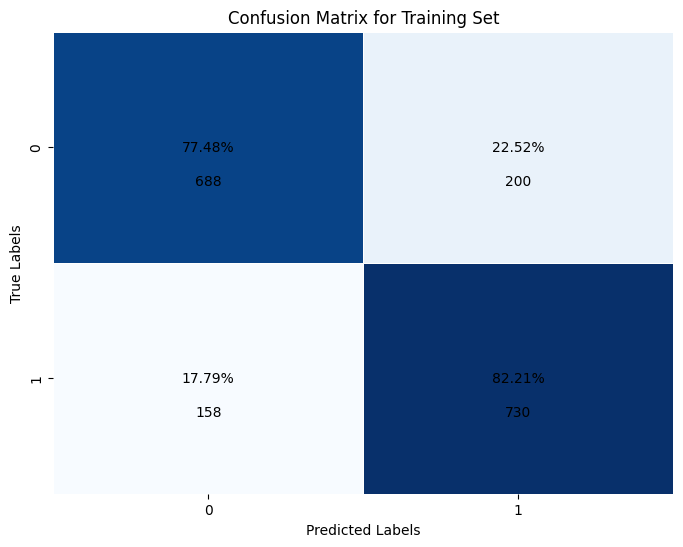

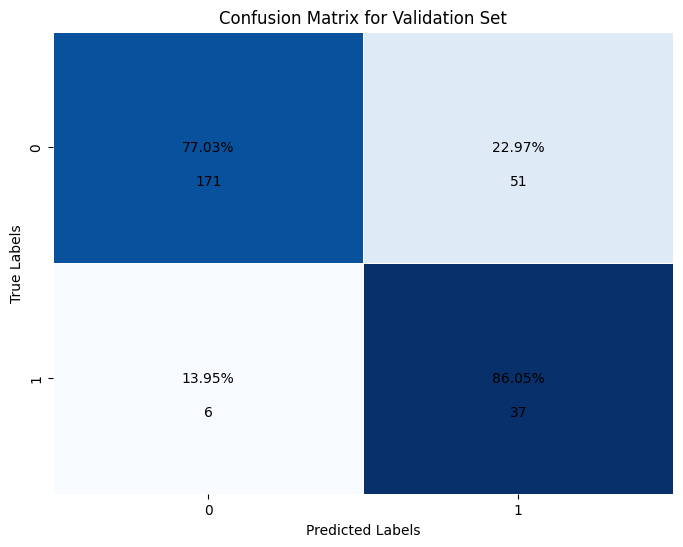

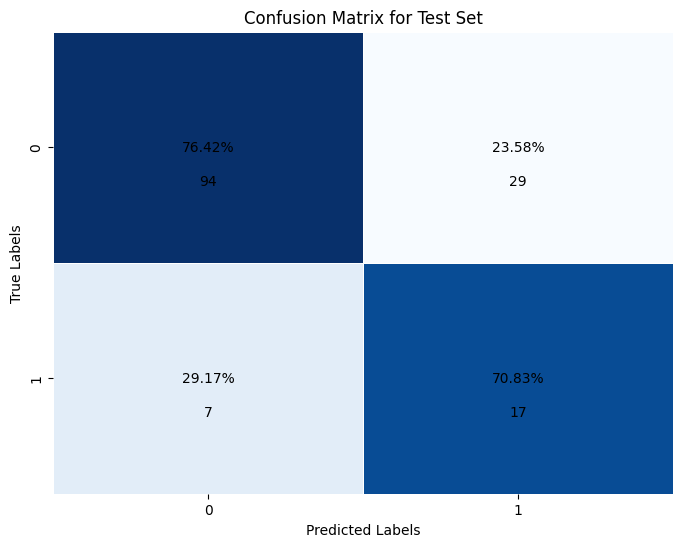

In [94]:
plot_confusion_matrix(y_train_smote, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Decision Tree Classifier</span>

In [95]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
   
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                           
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_train_smote, y_train_smote)

                        y_pred_train = dt_classifier.predict(X_train_smote)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_train_smote, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/SMOTE_dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'min_samples_leaf': 8}


In [96]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_train_smote, y_train_smote)

y_pred_train = best_dt_classifier.predict(X_train_smote)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_train_smote, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.9313063063063063
Decision Tree Validation Accuracy:
0.8264150943396227
Decision Tree Test Accuracy:
0.782312925170068
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[199  23]
 [ 23  20]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       222
           1       0.47      0.47      0.47        43

    accuracy                           0.83       265
   macro avg       0.68      0.68      0.68       265
weighted avg       0.83      0.83      0.83       265

--------------------------------------------------------------------------


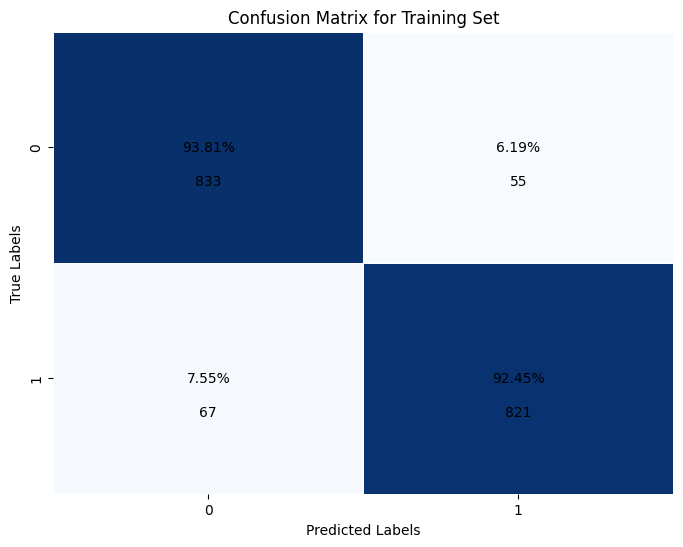

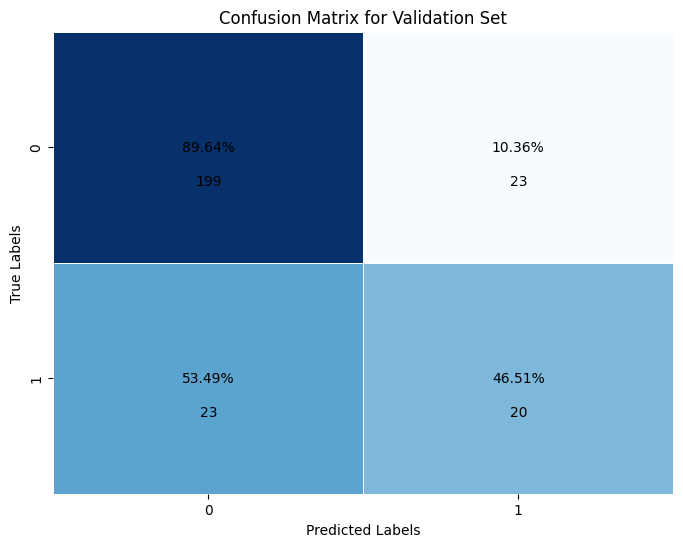

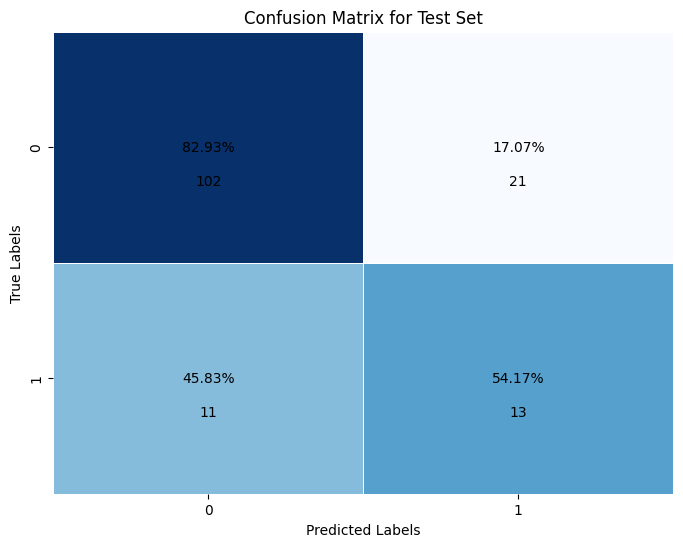

In [97]:
plot_confusion_matrix(y_train_smote, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Random Forest Classifier</span>

In [98]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_train_smote, y_train_smote)

                        y_pred_train = rf_classifier.predict(X_train_smote)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_train_smote, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                               
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/SMOTE_rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 700, 'min_samples_leaf': 15}


In [99]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train_smote, y_train_smote)

y_pred_train = best_rf_classifier.predict(X_train_smote)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_train_smote, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.9408783783783784
Random Forest Validation Accuracy:
0.8905660377358491
Random Forest Test Accuracy:
0.8639455782312925
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[212  10]
 [ 19  24]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       222
           1       0.71      0.56      0.62        43

    accuracy                           0.89       265
   macro avg       0.81      0.76      0.78       265
weighted avg       0.88      0.89      0.89       265

--------------------------------------------------------------------------


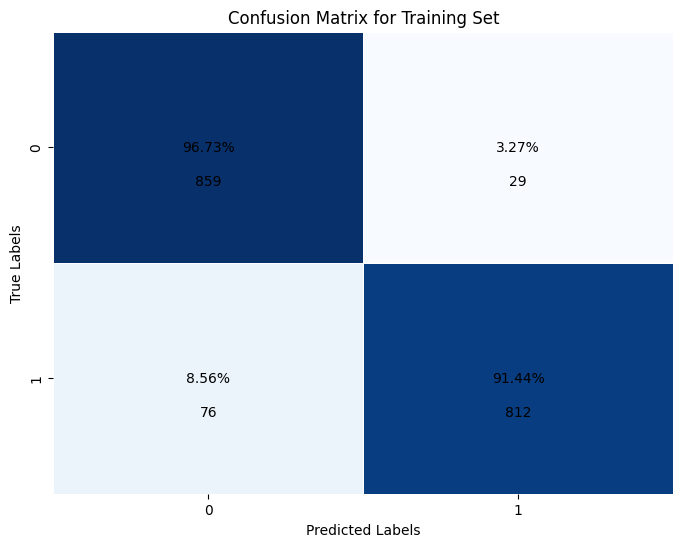

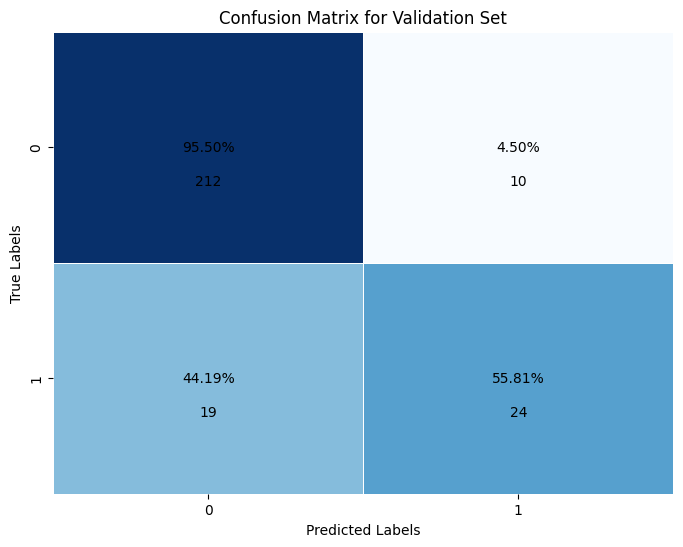

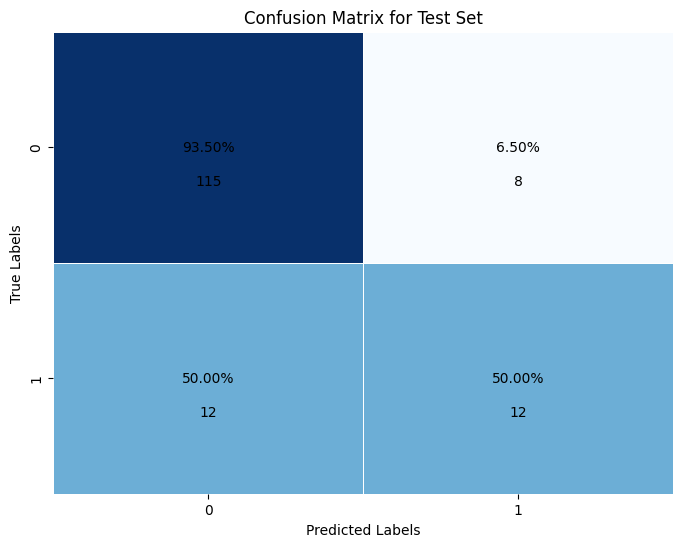

In [100]:
plot_confusion_matrix(y_train_smote, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Gradient Boosting Classifier</span>

In [101]:
gb_param_grid = {
    'n_estimators': [800, 900, 1000],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_train_smote, y_train_smote)

                        y_pred_train = gb_classifier.predict(X_train_smote)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_train_smote, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                # 'max_depth': max_depth,
                                # 'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/SMOTE_gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 800, 'learning_rate': 0.01, 'min_samples_leaf': 10}


In [102]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_train_smote, y_train_smote)

y_pred_train = best_gb_classifier.predict(X_train_smote)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_train_smote, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.9622747747747747
Gradient Boosting Validation Accuracy:
0.8603773584905661
Gradient Boosting Test Accuracy:
0.8503401360544217
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[206  16]
 [ 21  22]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       222
           1       0.58      0.51      0.54        43

    accuracy                           0.86       265
   macro avg       0.74      0.72      0.73       265
weighted avg       0.85      0.86      0.86       265

--------------------------------------------------------------------------


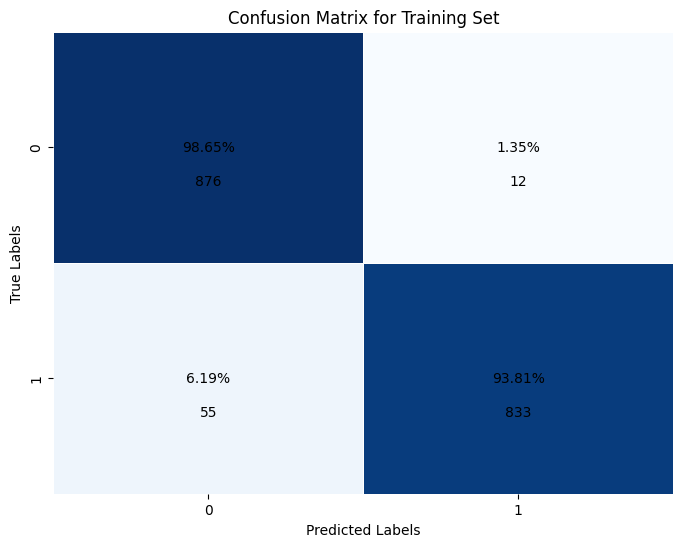

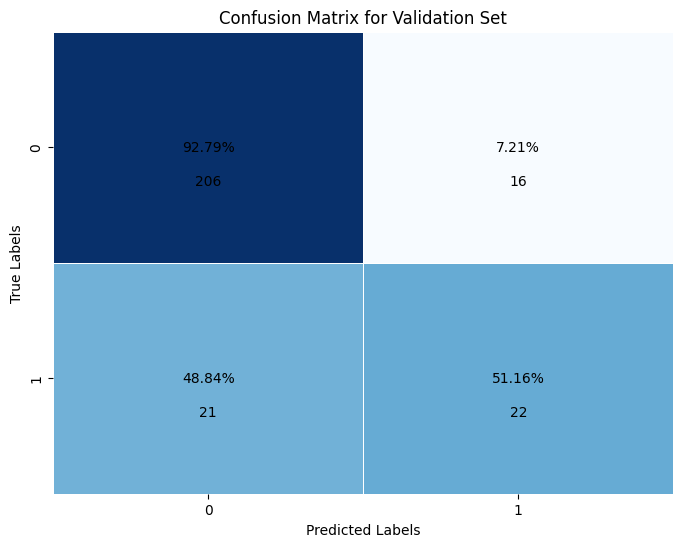

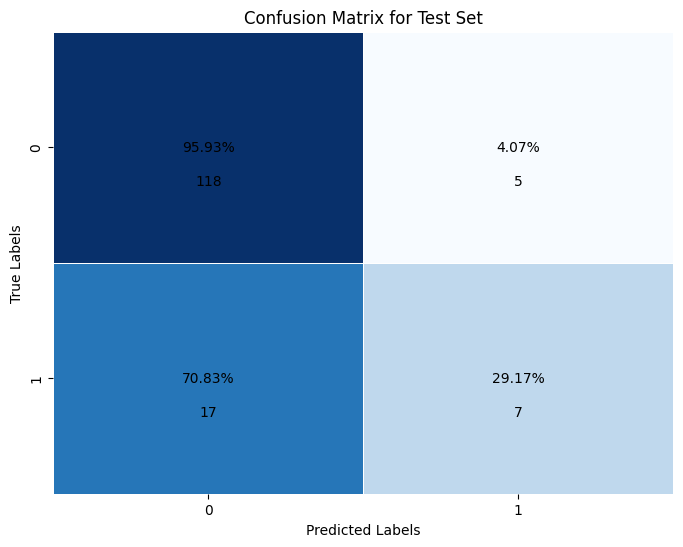

In [103]:
plot_confusion_matrix(y_train_smote, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Support Vector Machine</span>

In [104]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_train_smote, y_train_smote)

                    y_pred_train = svm_classifier.predict(X_train_smote)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_train_smote, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/SMOTE_svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 10, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}


In [105]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_train_smote, y_train_smote)

y_pred_train = best_svm_classifier.predict(X_train_smote)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_train_smote, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.9070945945945946
SVM Validation Accuracy:
0.8415094339622642
SVM Test Accuracy:
0.782312925170068
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[192  30]
 [ 12  31]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       222
           1       0.51      0.72      0.60        43

    accuracy                           0.84       265
   macro avg       0.72      0.79      0.75       265
weighted avg       0.87      0.84      0.85       265

--------------------------------------------------------------------------


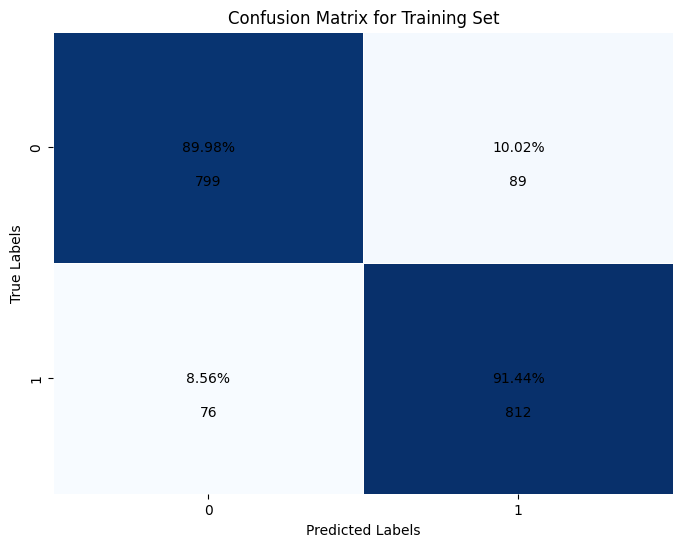

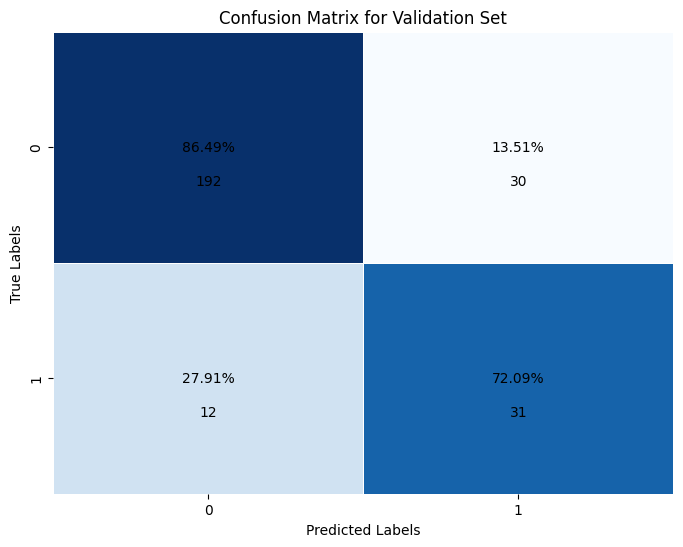

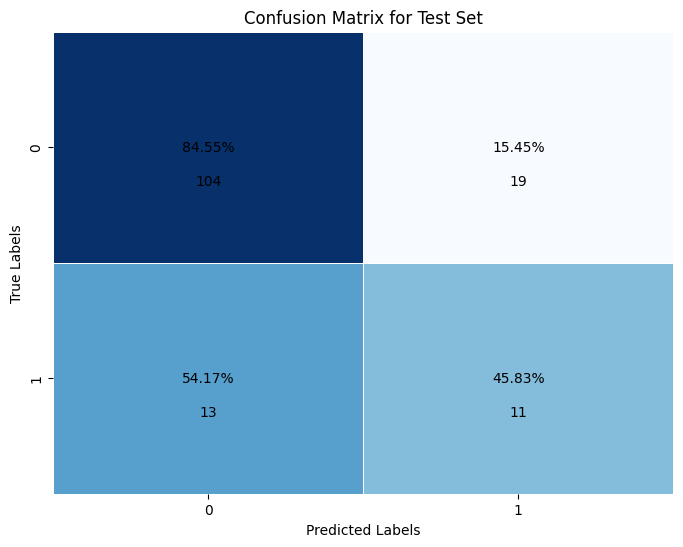

In [106]:
plot_confusion_matrix(y_train_smote, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

#  <span style = "color : GREEN"> Random Oversampling </span>

##  <span style = "color : white"> Logistic Regression</span>

In [107]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_ros, y_ros)
                
                y_pred_train = lreg.predict(X_ros)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_ros, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/ROS_lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

Best hyperparameters for Logistic Regression:
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [108]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_ros, y_ros)

y_pred_train = best_lreg.predict(X_ros)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_ros, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.7753378378378378
Logistic Regression Validation Accuracy:
0.7811320754716982
Logistic Regression Test Accuracy:
0.7210884353741497
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[172  50]
 [  8  35]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       222
           1       0.41      0.81      0.55        43

    accuracy                           0.78       265
   macro avg       0.68      0.79      0.70       265
weighted avg       0.87      0.78      0.81       265

--------------------------------------------------------------------------


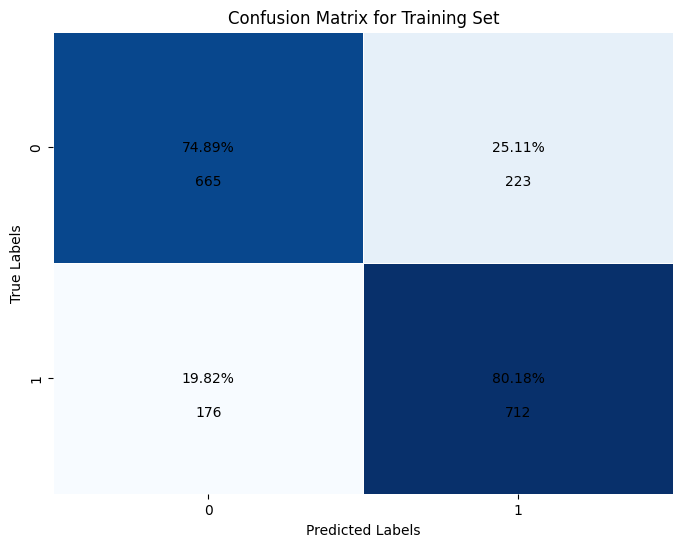

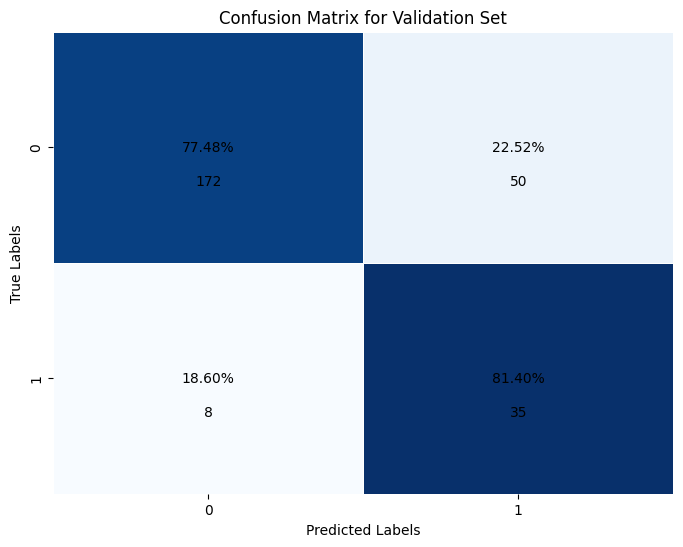

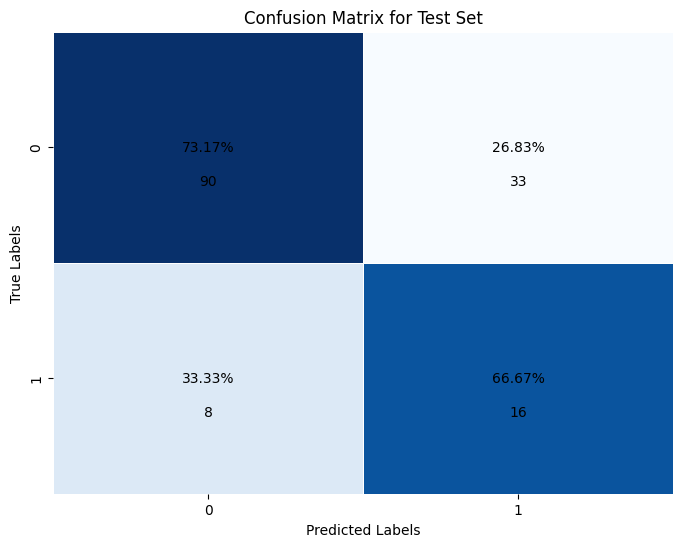

In [109]:
plot_confusion_matrix(y_ros, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Decision Tree Classifier</span>

In [110]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
   
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                           
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_ros, y_ros)

                        y_pred_train = dt_classifier.predict(X_ros)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_ros, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/ROS_dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'min_samples_leaf': 10}


In [111]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_ros, y_ros)

y_pred_train = best_dt_classifier.predict(X_ros)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_ros, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.9279279279279279
Decision Tree Validation Accuracy:
0.8415094339622642
Decision Tree Test Accuracy:
0.8027210884353742
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[202  20]
 [ 22  21]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       222
           1       0.51      0.49      0.50        43

    accuracy                           0.84       265
   macro avg       0.71      0.70      0.70       265
weighted avg       0.84      0.84      0.84       265

--------------------------------------------------------------------------


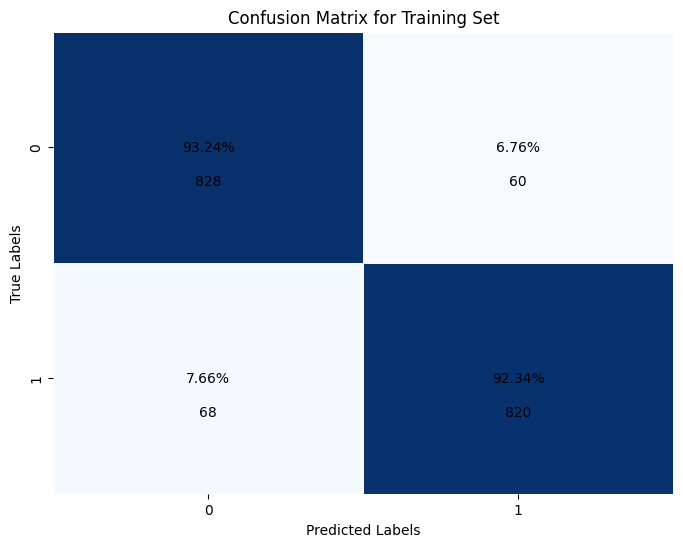

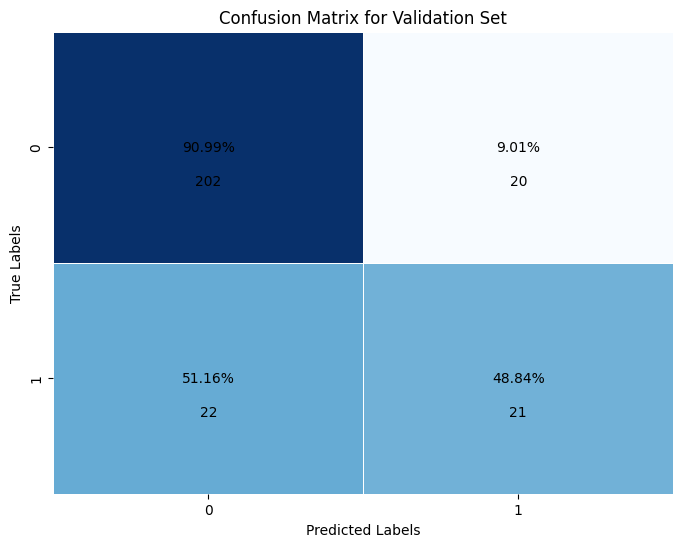

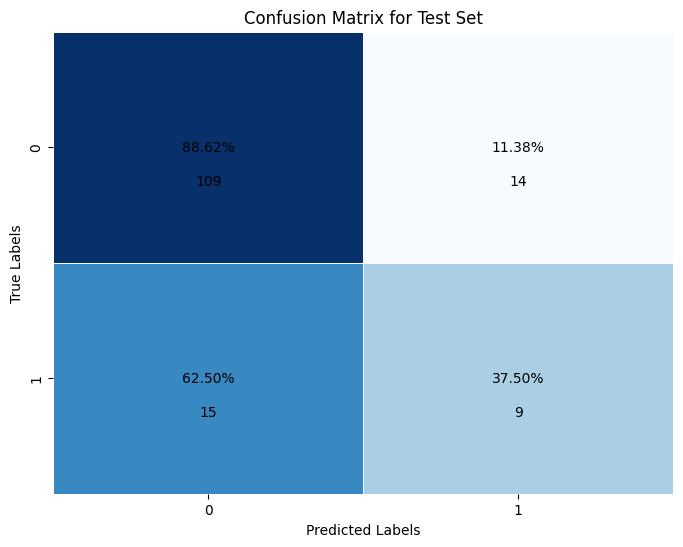

In [112]:
plot_confusion_matrix(y_ros, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Random Forest Classifier</span>

In [113]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_ros, y_ros)

                        y_pred_train = rf_classifier.predict(X_ros)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_ros, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                               
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/ROS_rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 800, 'min_samples_leaf': 8}


In [114]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_ros, y_ros)

y_pred_train = best_rf_classifier.predict(X_ros)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_ros, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.9819819819819819
Random Forest Validation Accuracy:
0.8679245283018868
Random Forest Test Accuracy:
0.8435374149659864
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[206  16]
 [ 19  24]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       222
           1       0.60      0.56      0.58        43

    accuracy                           0.87       265
   macro avg       0.76      0.74      0.75       265
weighted avg       0.86      0.87      0.87       265

--------------------------------------------------------------------------


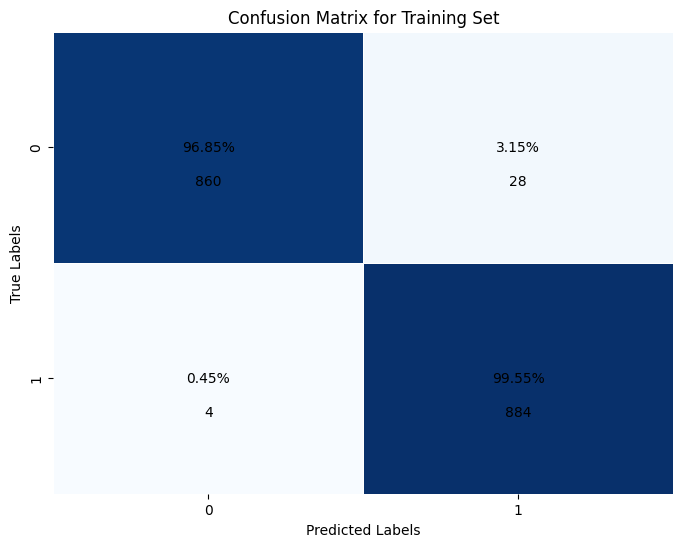

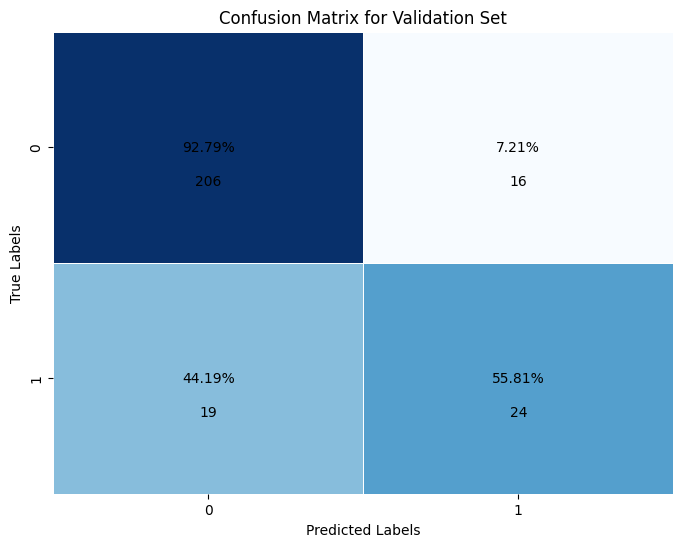

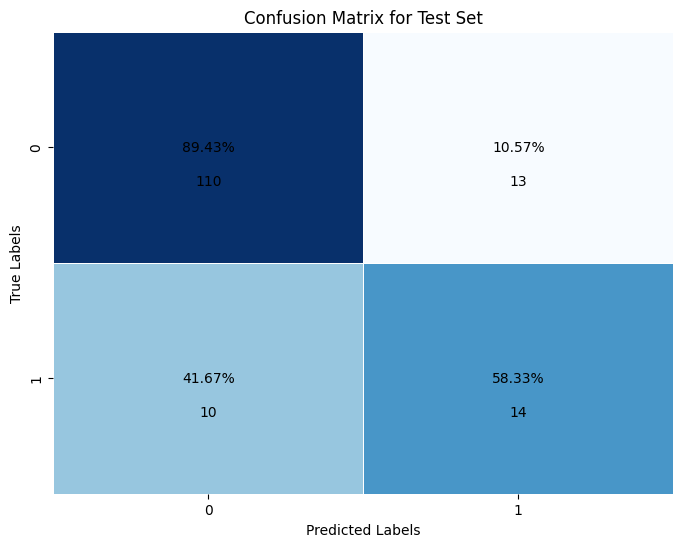

In [115]:
plot_confusion_matrix(y_ros, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Gradient Boosting Classifier</span>

In [116]:
gb_param_grid = {
    'n_estimators': [800, 900, 1000],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_ros, y_ros)

                        y_pred_train = gb_classifier.predict(X_ros)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_ros, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                # 'max_depth': max_depth,
                                # 'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/ROS_gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 800, 'learning_rate': 0.01, 'min_samples_leaf': 12}


In [117]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_ros, y_ros)

y_pred_train = best_gb_classifier.predict(X_ros)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_ros, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.9436936936936937
Gradient Boosting Validation Accuracy:
0.8490566037735849
Gradient Boosting Test Accuracy:
0.7755102040816326
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[196  26]
 [ 14  29]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       222
           1       0.53      0.67      0.59        43

    accuracy                           0.85       265
   macro avg       0.73      0.78      0.75       265
weighted avg       0.87      0.85      0.86       265

--------------------------------------------------------------------------


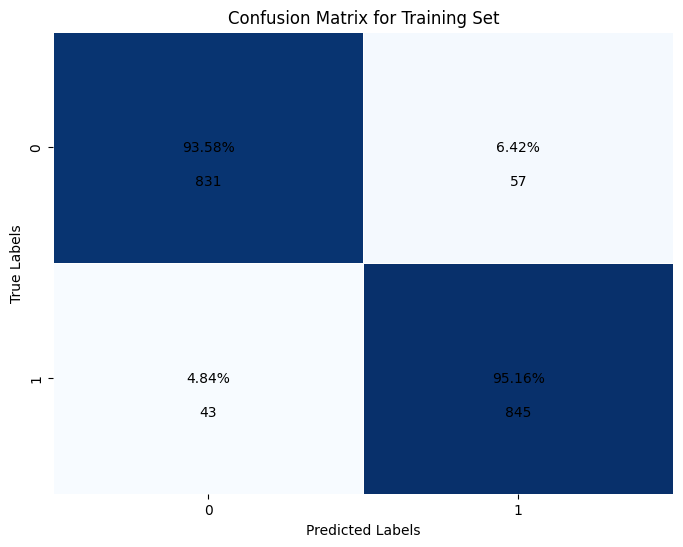

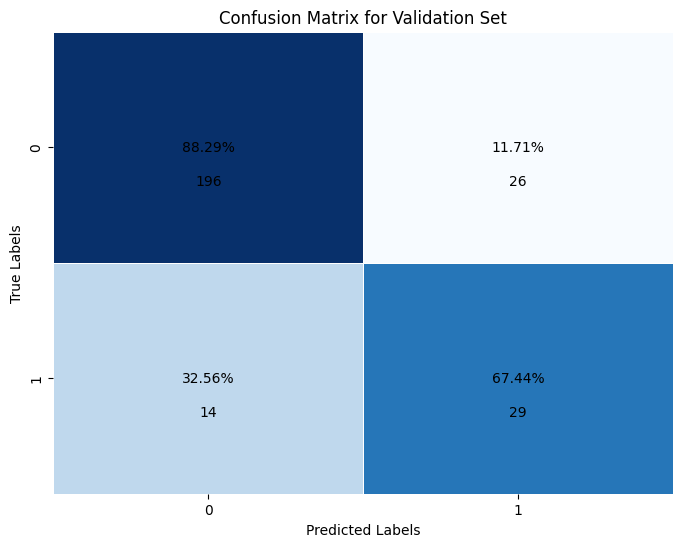

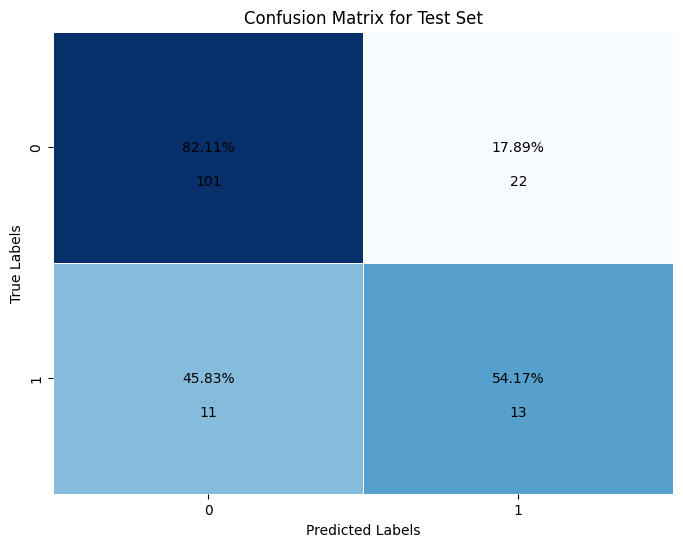

In [118]:
plot_confusion_matrix(y_ros, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Support Vector Machine</span>

In [119]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_ros, y_ros)

                    y_pred_train = svm_classifier.predict(X_ros)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_ros, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/ROS_svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 10, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 2}


In [120]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_ros, y_ros)

y_pred_train = best_svm_classifier.predict(X_ros)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_ros, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.9966216216216216
SVM Validation Accuracy:
0.8452830188679246
SVM Test Accuracy:
0.7891156462585034
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[203  19]
 [ 22  21]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       222
           1       0.53      0.49      0.51        43

    accuracy                           0.85       265
   macro avg       0.71      0.70      0.71       265
weighted avg       0.84      0.85      0.84       265

--------------------------------------------------------------------------


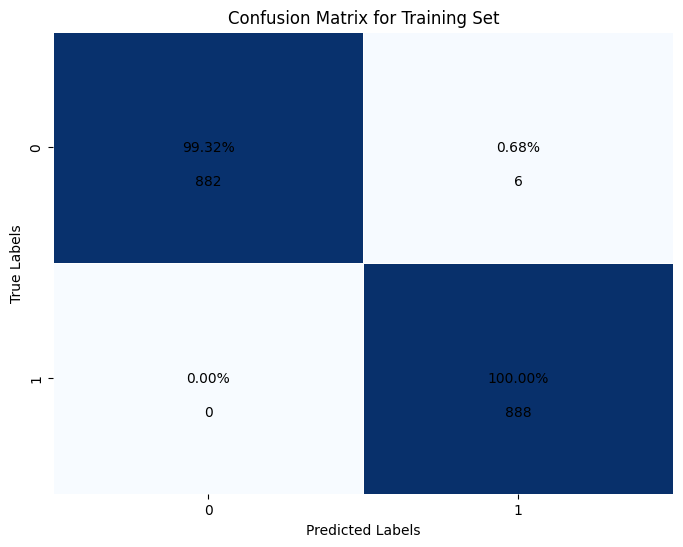

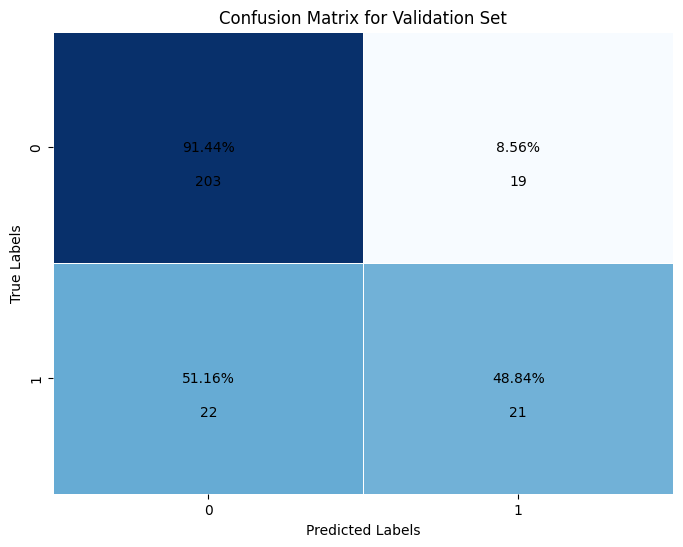

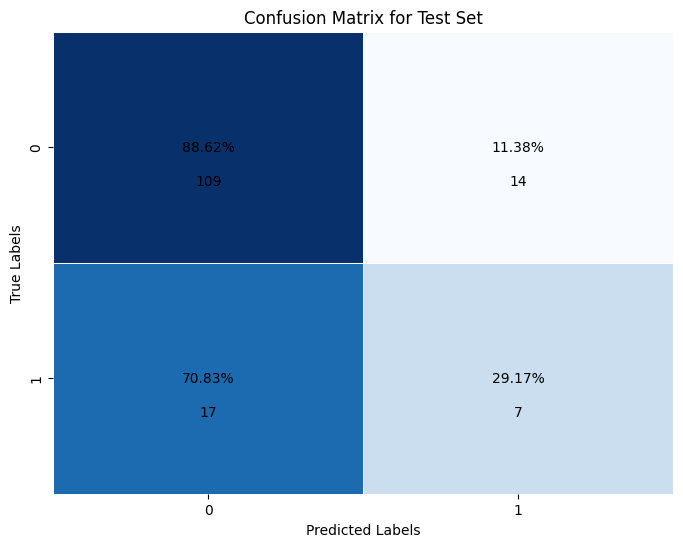

In [121]:
plot_confusion_matrix(y_ros, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

#  <span style = "color : GREEN"> ADASYN </span>

##  <span style = "color : white"> Logistic Regression</span>

In [122]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_adasyn, y_adasyn)
                
                y_pred_train = lreg.predict(X_adasyn)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_adasyn, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/ADASYN_lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

Best hyperparameters for Logistic Regression:
{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [123]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_adasyn, y_adasyn)

y_pred_train = best_lreg.predict(X_adasyn)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_adasyn, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.794928335170893
Logistic Regression Validation Accuracy:
0.7811320754716982
Logistic Regression Test Accuracy:
0.7346938775510204
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[172  50]
 [  8  35]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.96      0.77      0.86       222
           1       0.41      0.81      0.55        43

    accuracy                           0.78       265
   macro avg       0.68      0.79      0.70       265
weighted avg       0.87      0.78      0.81       265

--------------------------------------------------------------------------


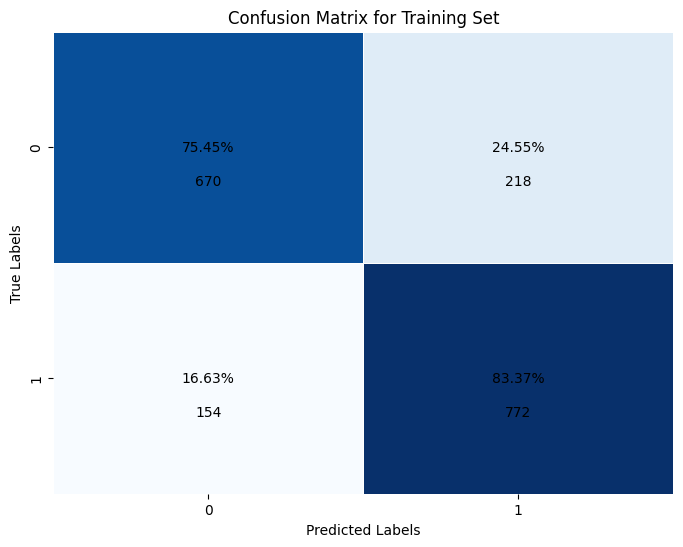

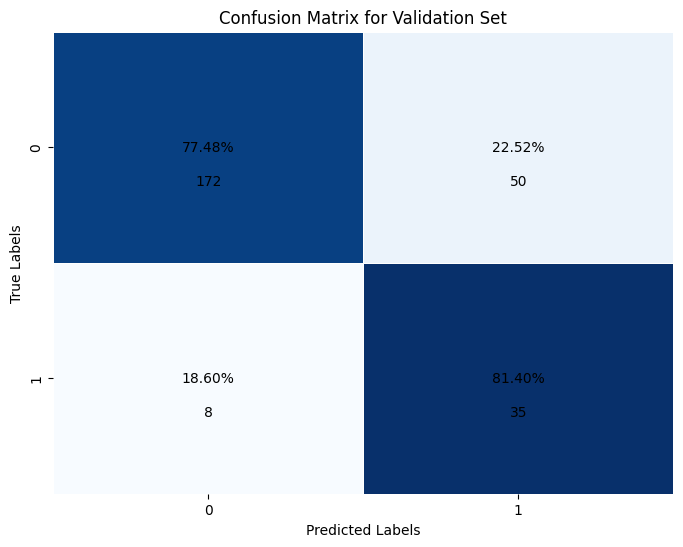

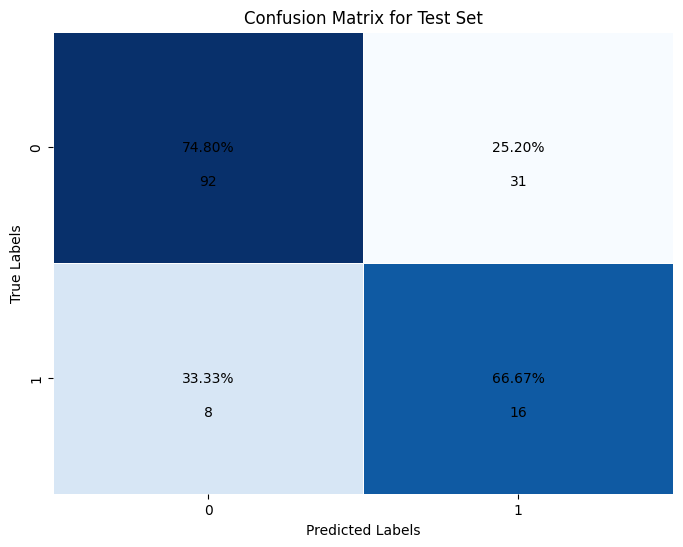

In [124]:
plot_confusion_matrix(y_adasyn, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Decision Tree Classifier</span>

In [125]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
   
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                           
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_adasyn, y_adasyn)

                        y_pred_train = dt_classifier.predict(X_adasyn)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_adasyn, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/ADASYN_dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'min_samples_leaf': 15}


In [126]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_adasyn, y_adasyn)

y_pred_train = best_dt_classifier.predict(X_adasyn)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_adasyn, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.9013230429988974
Decision Tree Validation Accuracy:
0.8113207547169812
Decision Tree Test Accuracy:
0.7959183673469388
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[201  21]
 [ 29  14]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       222
           1       0.40      0.33      0.36        43

    accuracy                           0.81       265
   macro avg       0.64      0.62      0.62       265
weighted avg       0.80      0.81      0.80       265

--------------------------------------------------------------------------


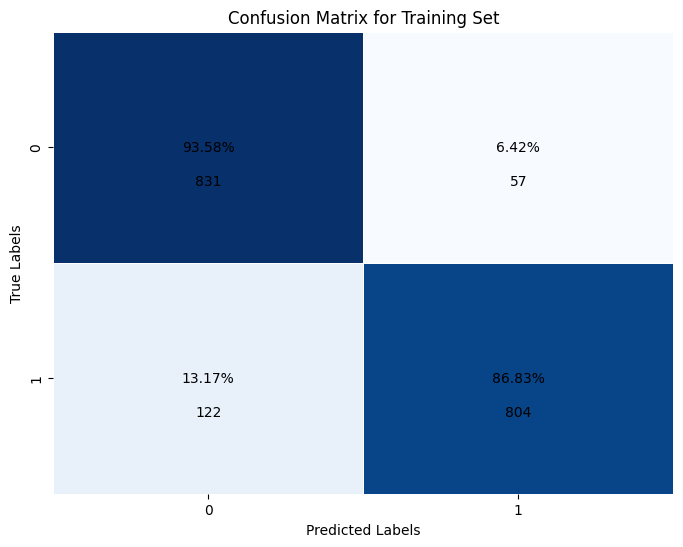

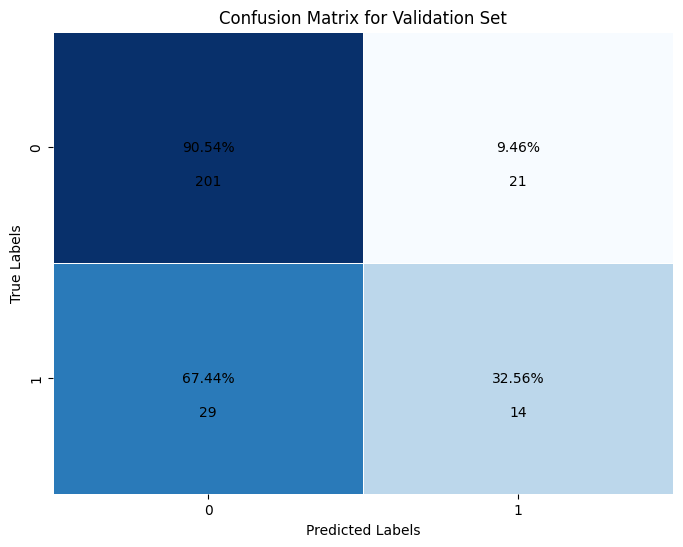

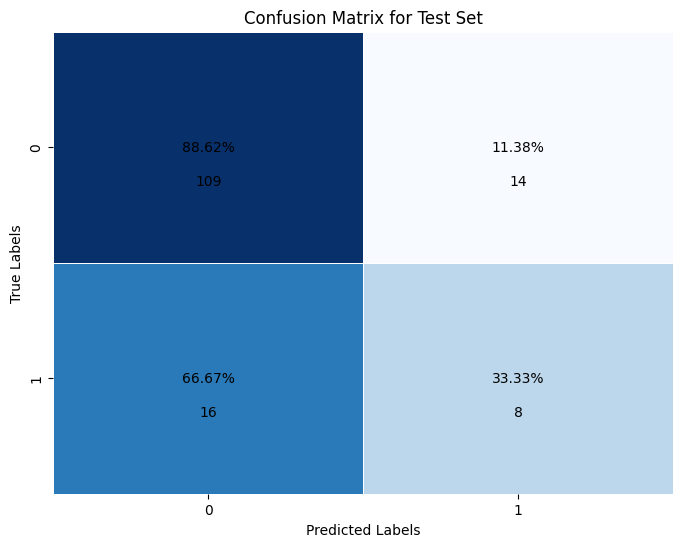

In [127]:
plot_confusion_matrix(y_adasyn, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Random Forest Classifier</span>

In [128]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_adasyn, y_adasyn)

                        y_pred_train = rf_classifier.predict(X_adasyn)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_adasyn, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                               
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/ADASYN_rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 600, 'min_samples_leaf': 8}


In [129]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_adasyn, y_adasyn)

y_pred_train = best_rf_classifier.predict(X_adasyn)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_adasyn, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.9691289966923925
Random Forest Validation Accuracy:
0.8867924528301887
Random Forest Test Accuracy:
0.8639455782312925
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[213   9]
 [ 21  22]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       222
           1       0.71      0.51      0.59        43

    accuracy                           0.89       265
   macro avg       0.81      0.74      0.76       265
weighted avg       0.88      0.89      0.88       265

--------------------------------------------------------------------------


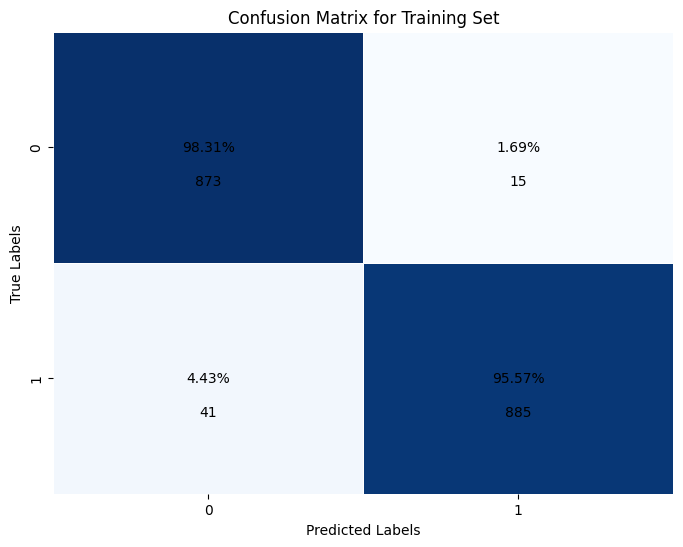

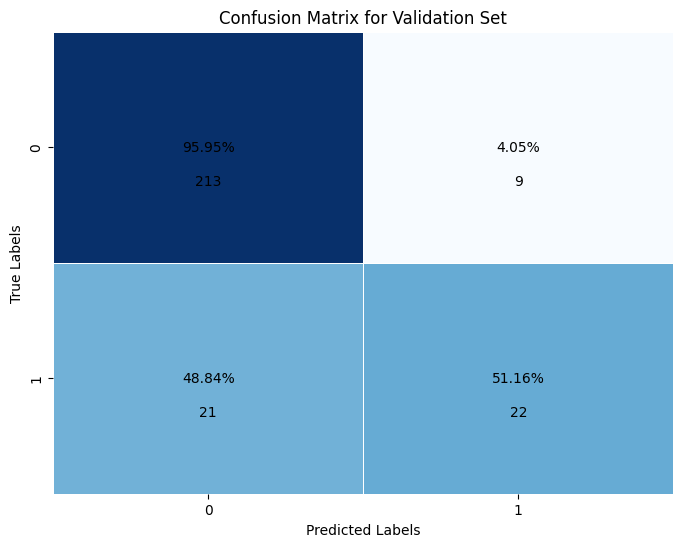

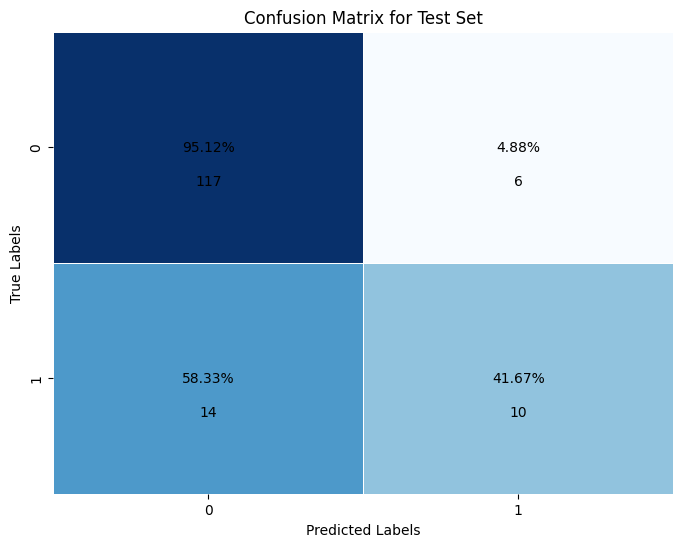

In [130]:
plot_confusion_matrix(y_adasyn, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Gradient Boosting Classifier</span>

In [131]:
gb_param_grid = {
    'n_estimators': [800, 900, 1000],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_adasyn, y_adasyn)

                        y_pred_train = gb_classifier.predict(X_adasyn)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_adasyn, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                # 'max_depth': max_depth,
                                # 'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/ADASYN_gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 1000, 'learning_rate': 0.01, 'min_samples_leaf': 8}


In [132]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_adasyn, y_adasyn)

y_pred_train = best_gb_classifier.predict(X_adasyn)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_adasyn, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.9718853362734289
Gradient Boosting Validation Accuracy:
0.8641509433962264
Gradient Boosting Test Accuracy:
0.8503401360544217
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[208  14]
 [ 22  21]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       222
           1       0.60      0.49      0.54        43

    accuracy                           0.86       265
   macro avg       0.75      0.71      0.73       265
weighted avg       0.85      0.86      0.86       265

--------------------------------------------------------------------------


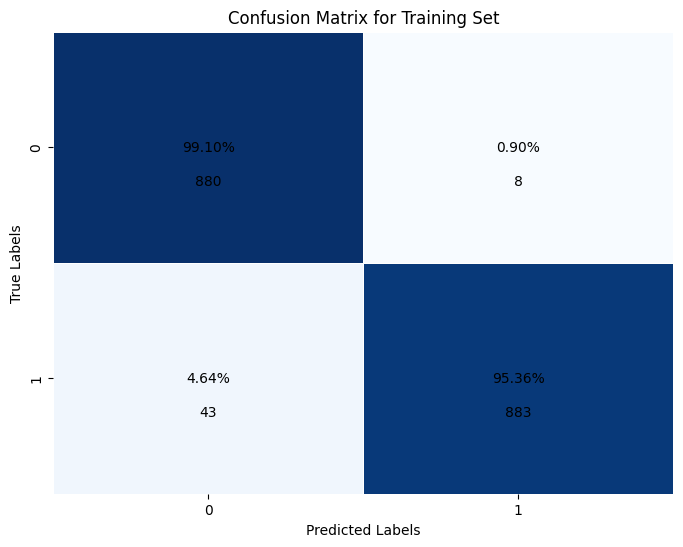

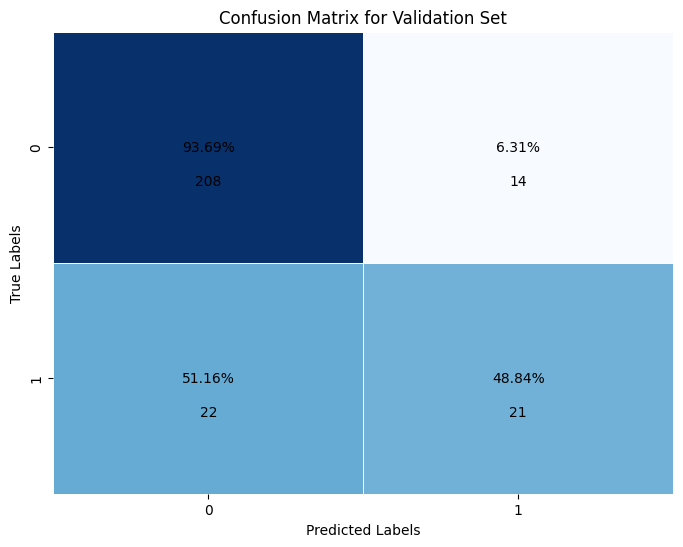

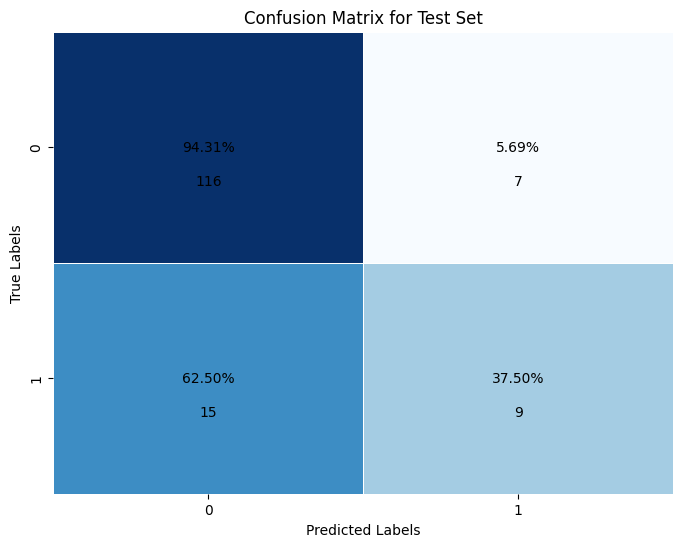

In [133]:
plot_confusion_matrix(y_adasyn, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Support Vector Machine</span>

In [134]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_adasyn, y_adasyn)

                    y_pred_train = svm_classifier.predict(X_adasyn)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_adasyn, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/ADASYN_svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 100, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}


In [135]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_adasyn, y_adasyn)

y_pred_train = best_svm_classifier.predict(X_adasyn)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_adasyn, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.9735391400220507
SVM Validation Accuracy:
0.8528301886792453
SVM Test Accuracy:
0.8027210884353742
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[201  21]
 [ 18  25]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       222
           1       0.54      0.58      0.56        43

    accuracy                           0.85       265
   macro avg       0.73      0.74      0.74       265
weighted avg       0.86      0.85      0.85       265

--------------------------------------------------------------------------


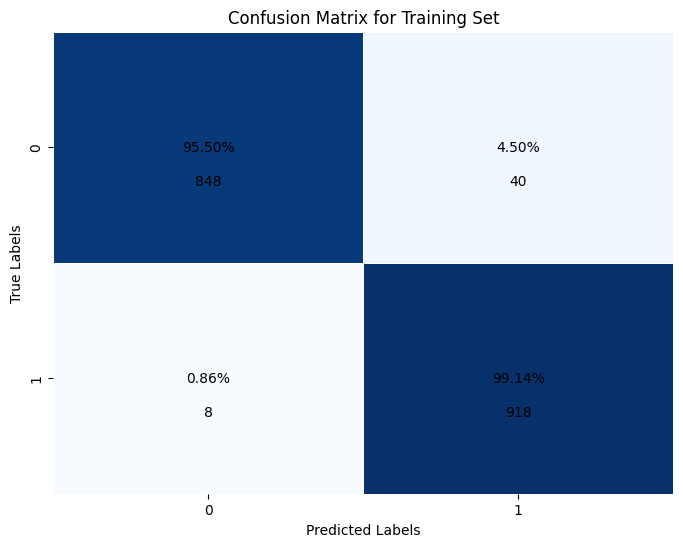

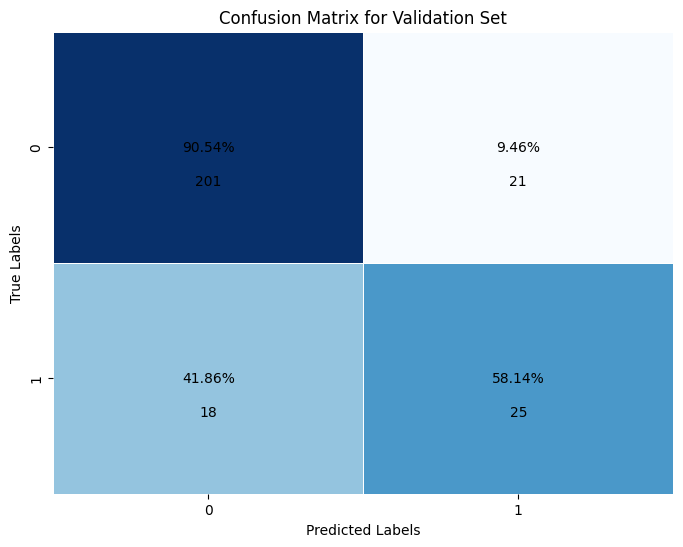

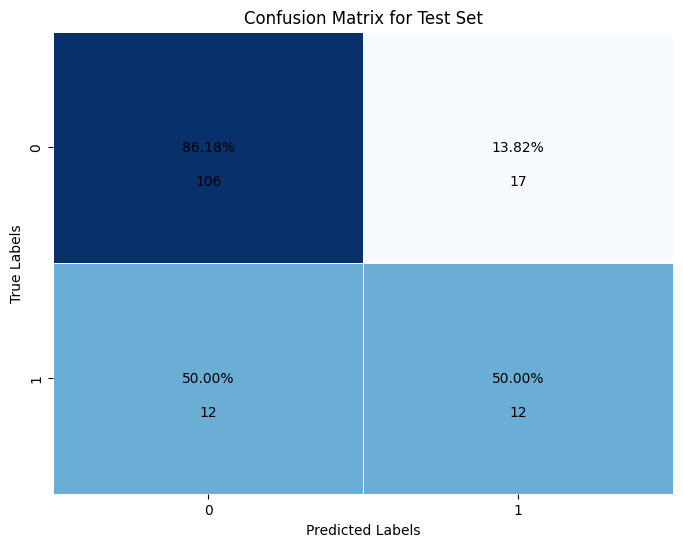

In [136]:
plot_confusion_matrix(y_adasyn, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

#  <span style = "color : GREEN"> Tomek Link </span>

##  <span style = "color : white"> Logistic Regression</span>

In [137]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_tomek, y_tomek)
                
                y_pred_train = lreg.predict(X_tomek)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_tomek, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/TL_lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

Best hyperparameters for Logistic Regression:
{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [138]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_tomek, y_tomek)

y_pred_train = best_lreg.predict(X_tomek)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_tomek, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.8963110667996012
Logistic Regression Validation Accuracy:
0.8867924528301887
Logistic Regression Test Accuracy:
0.8299319727891157
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[210  12]
 [ 18  25]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       222
           1       0.68      0.58      0.62        43

    accuracy                           0.89       265
   macro avg       0.80      0.76      0.78       265
weighted avg       0.88      0.89      0.88       265

--------------------------------------------------------------------------


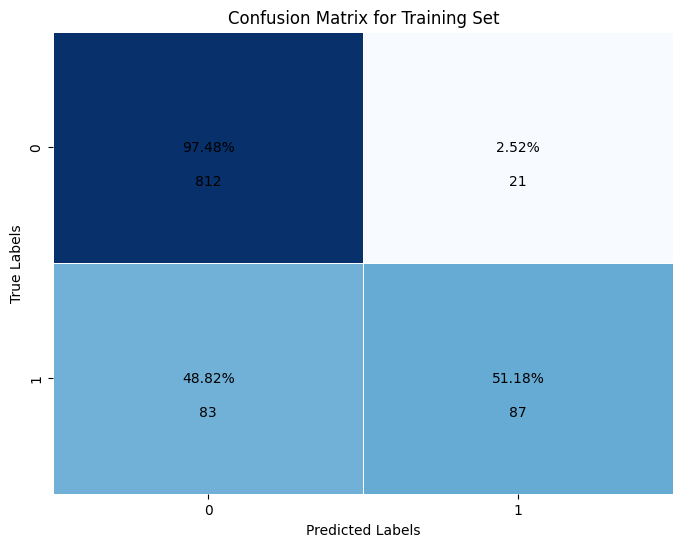

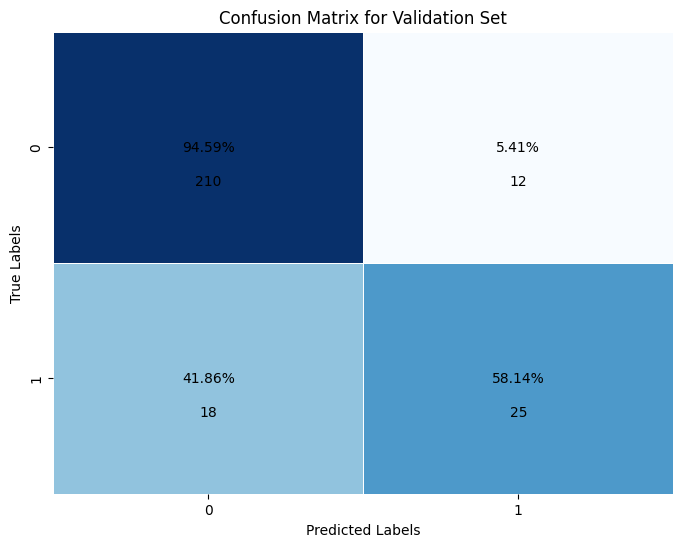

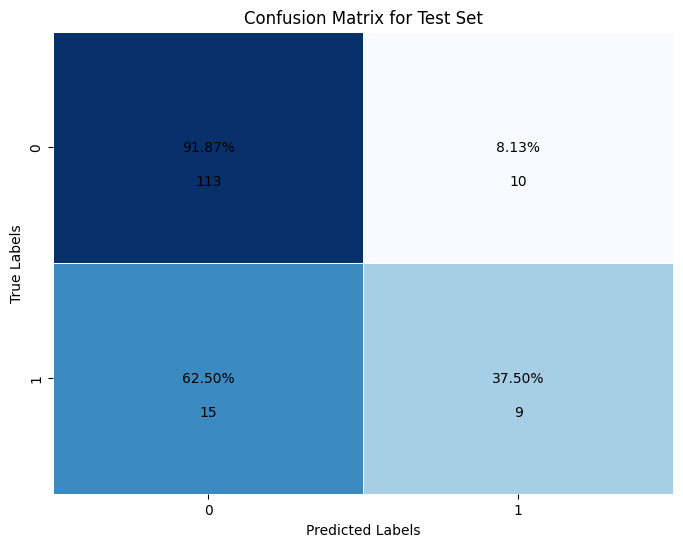

In [139]:
plot_confusion_matrix(y_tomek, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Decision Tree Classifier</span>

In [140]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
   
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                           
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_tomek, y_tomek)

                        y_pred_train = dt_classifier.predict(X_tomek)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_tomek, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/TL_dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'gini', 'min_samples_leaf': 8}


In [141]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_tomek, y_tomek)

y_pred_train = best_dt_classifier.predict(X_tomek)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_tomek, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.9082751744765702
Decision Tree Validation Accuracy:
0.8452830188679246
Decision Tree Test Accuracy:
0.8367346938775511
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[212  10]
 [ 31  12]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       222
           1       0.55      0.28      0.37        43

    accuracy                           0.85       265
   macro avg       0.71      0.62      0.64       265
weighted avg       0.82      0.85      0.82       265

--------------------------------------------------------------------------


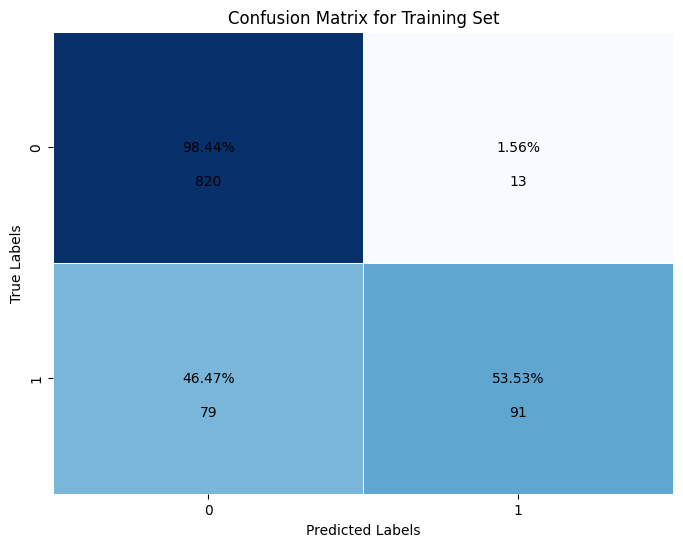

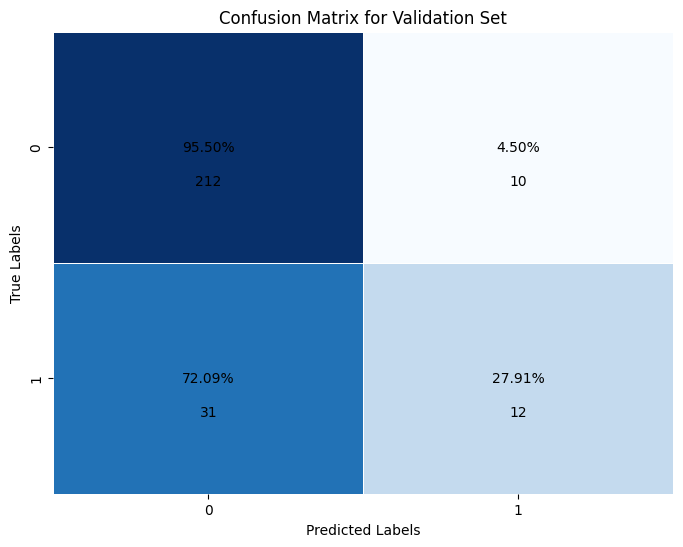

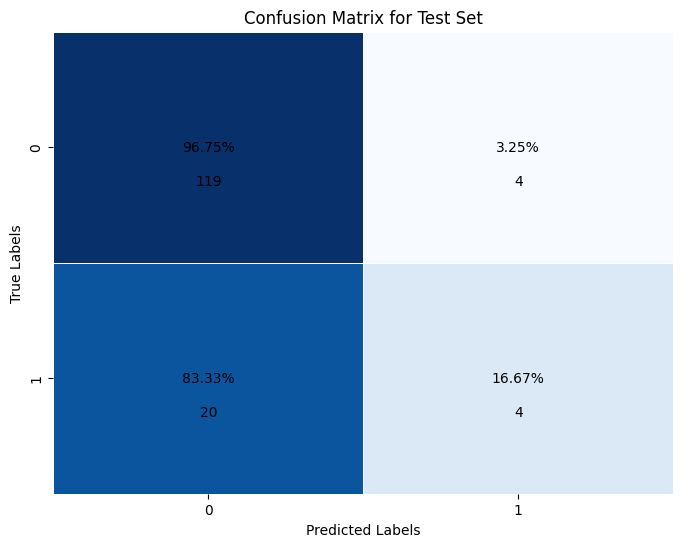

In [142]:
plot_confusion_matrix(y_tomek, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Random Forest Classifier</span>

In [143]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_tomek, y_tomek)

                        y_pred_train = rf_classifier.predict(X_tomek)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_tomek, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                               
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/TL_rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 800, 'min_samples_leaf': 8}


In [144]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_tomek, y_tomek)

y_pred_train = best_rf_classifier.predict(X_tomek)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_tomek, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.8693918245264207
Random Forest Validation Accuracy:
0.8566037735849057
Random Forest Test Accuracy:
0.8367346938775511
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[221   1]
 [ 37   6]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       222
           1       0.86      0.14      0.24        43

    accuracy                           0.86       265
   macro avg       0.86      0.57      0.58       265
weighted avg       0.86      0.86      0.81       265

--------------------------------------------------------------------------


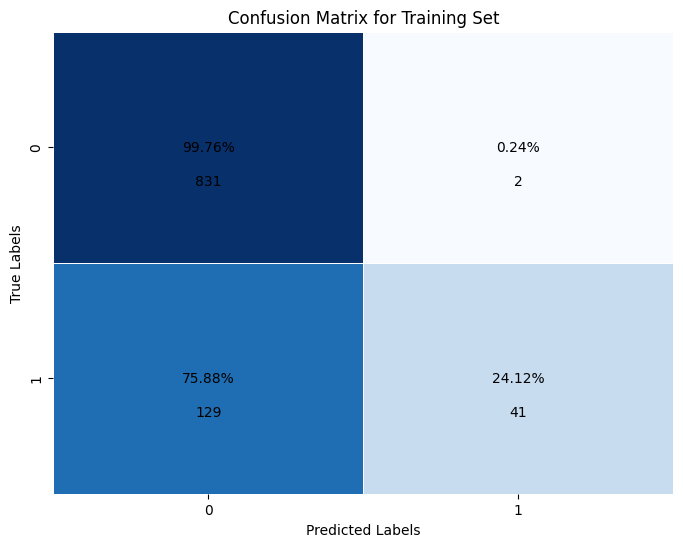

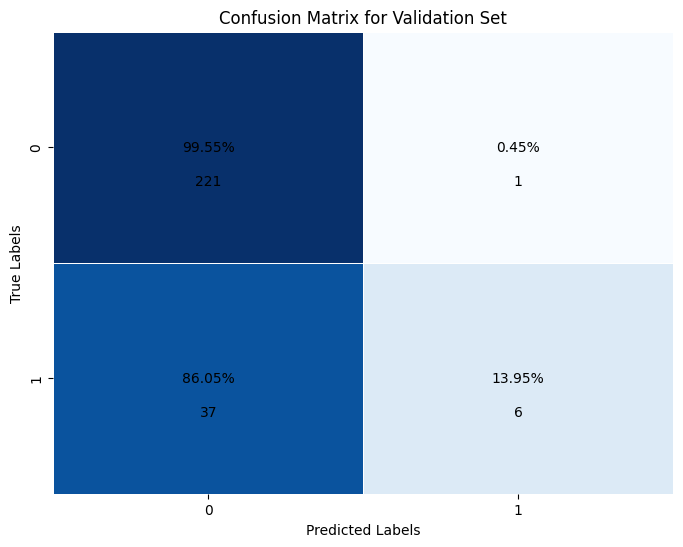

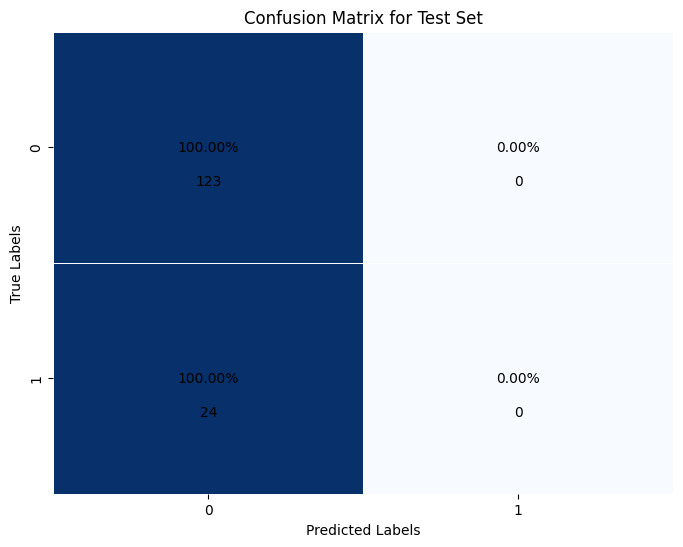

In [145]:
plot_confusion_matrix(y_tomek, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Gradient Boosting Classifier</span>

In [146]:
gb_param_grid = {
    'n_estimators': [800, 900, 1000],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_tomek, y_tomek)

                        y_pred_train = gb_classifier.predict(X_tomek)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_tomek, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/TL_gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 800, 'learning_rate': 0.01, 'min_samples_leaf': 12}


In [147]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_tomek, y_tomek)

y_pred_train = best_gb_classifier.predict(X_tomek)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_tomek, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.942173479561316
Gradient Boosting Validation Accuracy:
0.879245283018868
Gradient Boosting Test Accuracy:
0.8571428571428571
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[215   7]
 [ 25  18]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       222
           1       0.72      0.42      0.53        43

    accuracy                           0.88       265
   macro avg       0.81      0.69      0.73       265
weighted avg       0.87      0.88      0.87       265

--------------------------------------------------------------------------


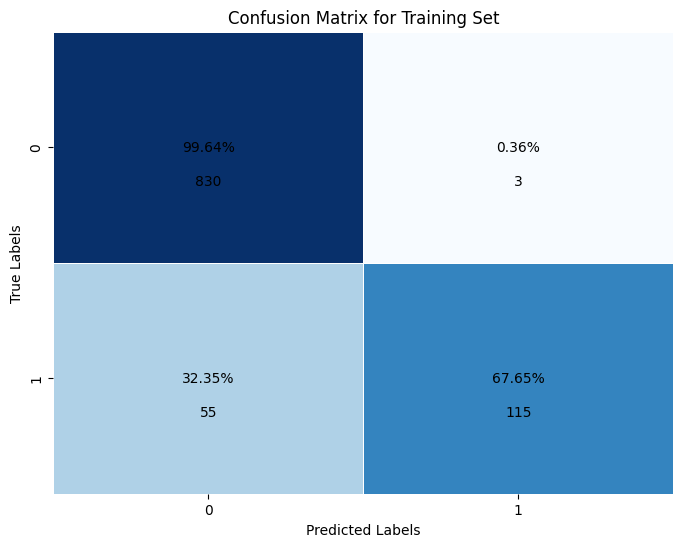

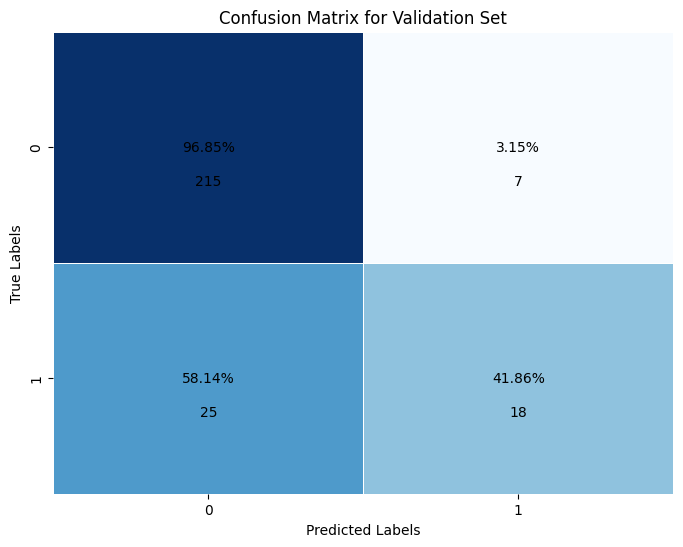

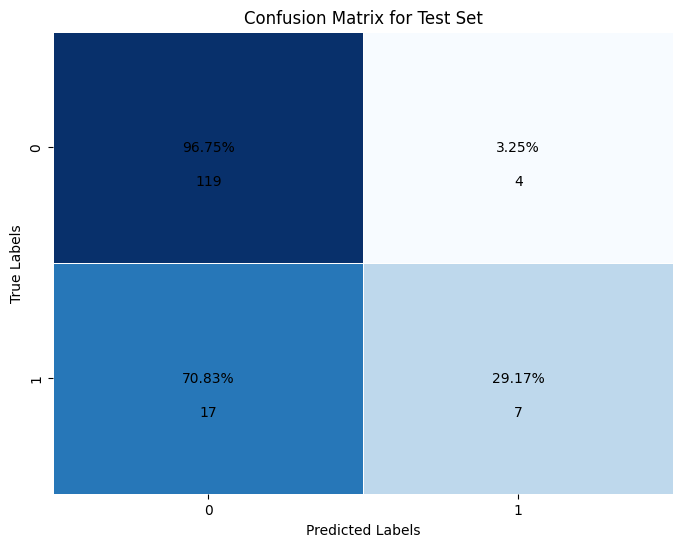

In [148]:
plot_confusion_matrix(y_tomek, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Support Vector Machine</span>

In [149]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_tomek, y_tomek)

                    y_pred_train = svm_classifier.predict(X_tomek)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_tomek, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/TL_svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 100, 'kernel': 'sigmoid', 'gamma': 'auto', 'degree': 2}


In [150]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_tomek, y_tomek)

y_pred_train = best_svm_classifier.predict(X_tomek)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_tomek, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.8664007976071785
SVM Validation Accuracy:
0.9018867924528302
SVM Test Accuracy:
0.8503401360544217
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[211  11]
 [ 15  28]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       222
           1       0.72      0.65      0.68        43

    accuracy                           0.90       265
   macro avg       0.83      0.80      0.81       265
weighted avg       0.90      0.90      0.90       265

--------------------------------------------------------------------------


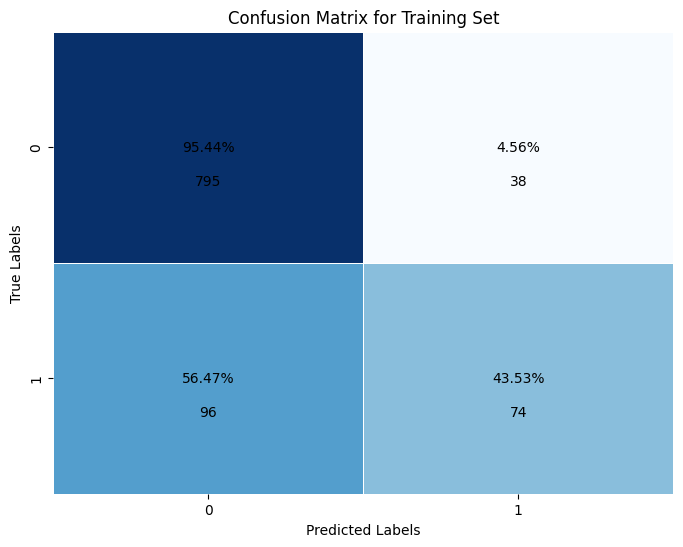

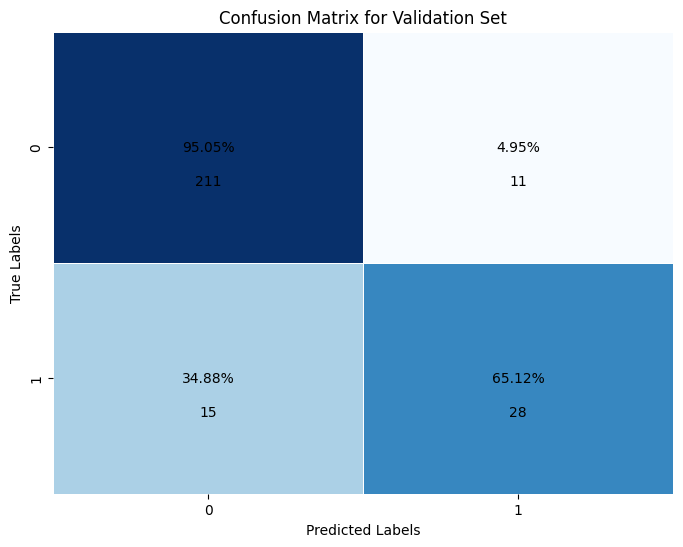

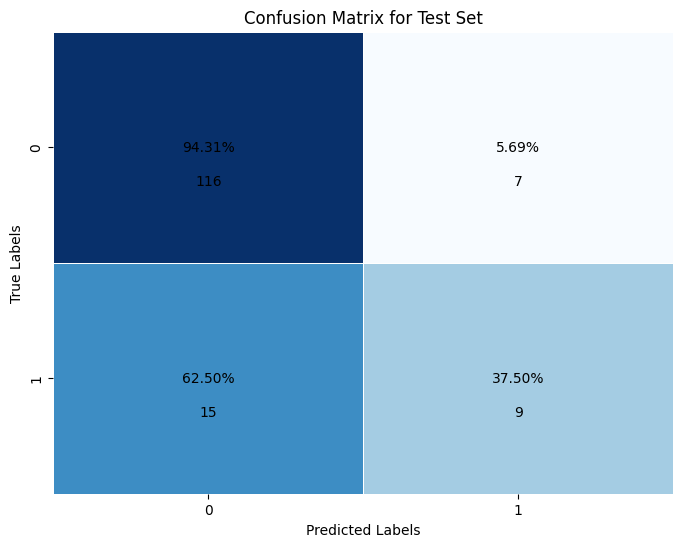

In [151]:
plot_confusion_matrix(y_tomek, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

#  <span style = "color : GREEN"> Random Undersampling </span>

##  <span style = "color : white"> Logistic Regression</span>

In [152]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_rus, y_rus)
                
                y_pred_train = lreg.predict(X_rus)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_rus, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/RUS_lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

Best hyperparameters for Logistic Regression:
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [153]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_rus, y_rus)

y_pred_train = best_lreg.predict(X_rus)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_rus, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.5
Logistic Regression Validation Accuracy:
0.8377358490566038
Logistic Regression Test Accuracy:
0.8367346938775511
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[222   0]
 [ 43   0]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       222
           1       0.00      0.00      0.00        43

    accuracy                           0.84       265
   macro avg       0.42      0.50      0.46       265
weighted avg       0.70      0.84      0.76       265

--------------------------------------------------------------------------


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

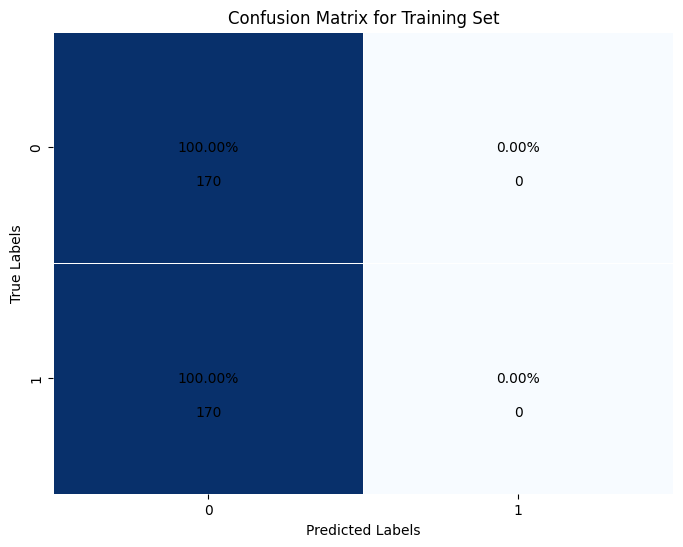

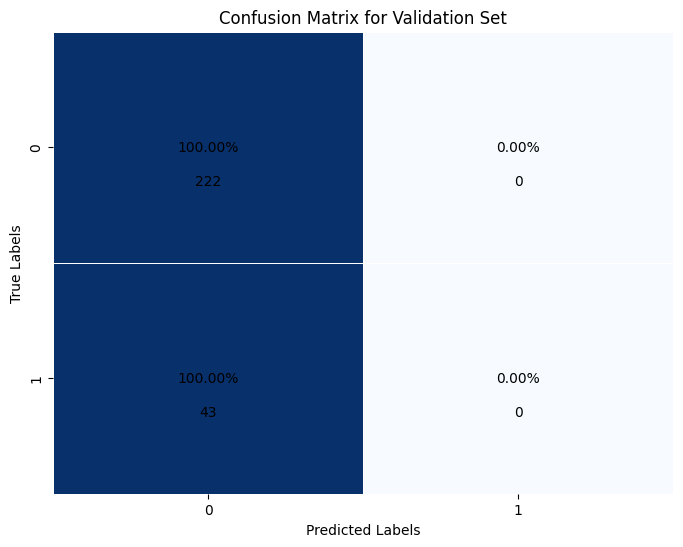

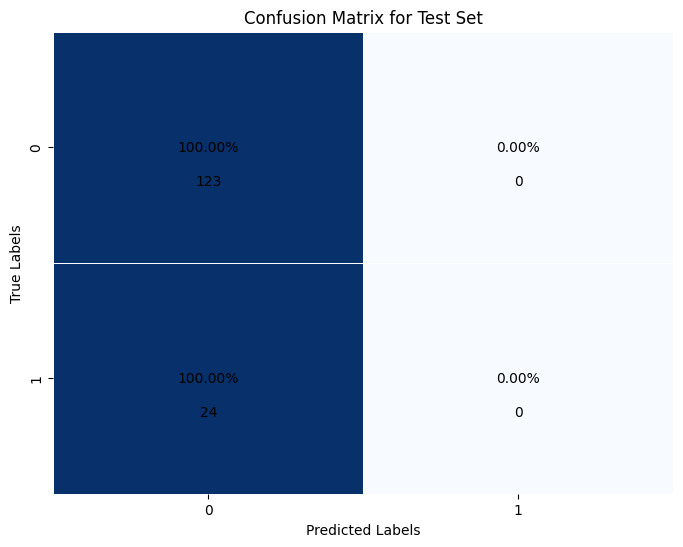

In [154]:
plot_confusion_matrix(y_rus, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Decision Tree Classifier</span>

In [155]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
   
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                           
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_rus, y_rus)

                        y_pred_train = dt_classifier.predict(X_rus)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_rus, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/RUS_dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'gini', 'min_samples_leaf': 15}


In [156]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_rus, y_rus)

y_pred_train = best_dt_classifier.predict(X_rus)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_rus, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.7647058823529411
Decision Tree Validation Accuracy:
0.7358490566037735
Decision Tree Test Accuracy:
0.7074829931972789
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[167  55]
 [ 15  28]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       222
           1       0.34      0.65      0.44        43

    accuracy                           0.74       265
   macro avg       0.63      0.70      0.64       265
weighted avg       0.82      0.74      0.76       265

--------------------------------------------------------------------------


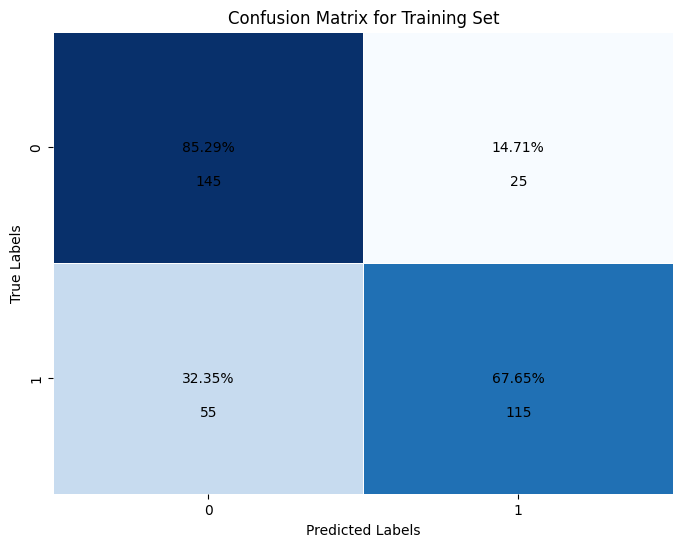

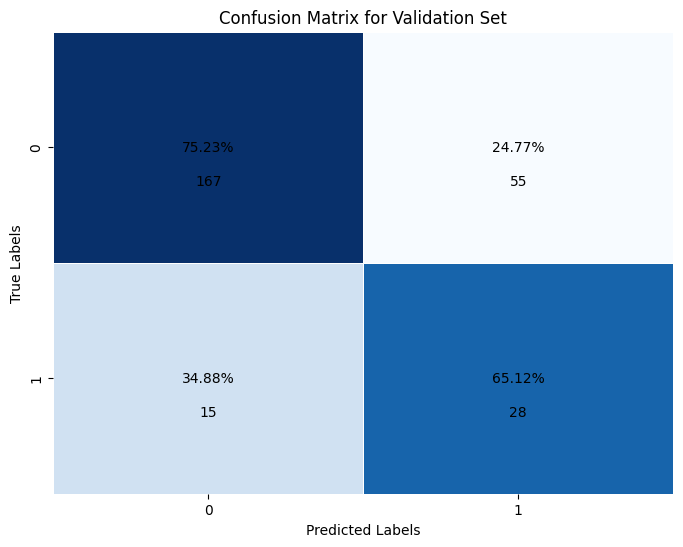

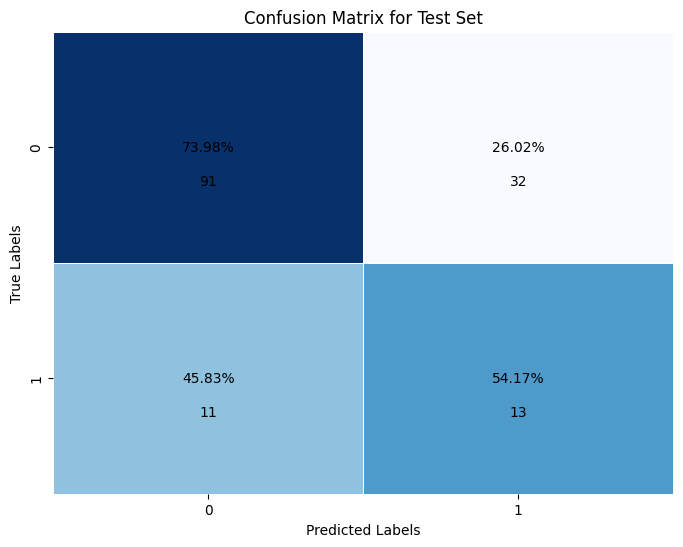

In [157]:
plot_confusion_matrix(y_rus, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Random Forest Classifier</span>

In [158]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_rus, y_rus)

                        y_pred_train = rf_classifier.predict(X_rus)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_rus, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                               
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/RUS_rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 600, 'min_samples_leaf': 8}


In [159]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_rus, y_rus)

y_pred_train = best_rf_classifier.predict(X_rus)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_rus, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.861764705882353
Random Forest Validation Accuracy:
0.7396226415094339
Random Forest Test Accuracy:
0.6938775510204082
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[162  60]
 [  9  34]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.95      0.73      0.82       222
           1       0.36      0.79      0.50        43

    accuracy                           0.74       265
   macro avg       0.65      0.76      0.66       265
weighted avg       0.85      0.74      0.77       265

--------------------------------------------------------------------------


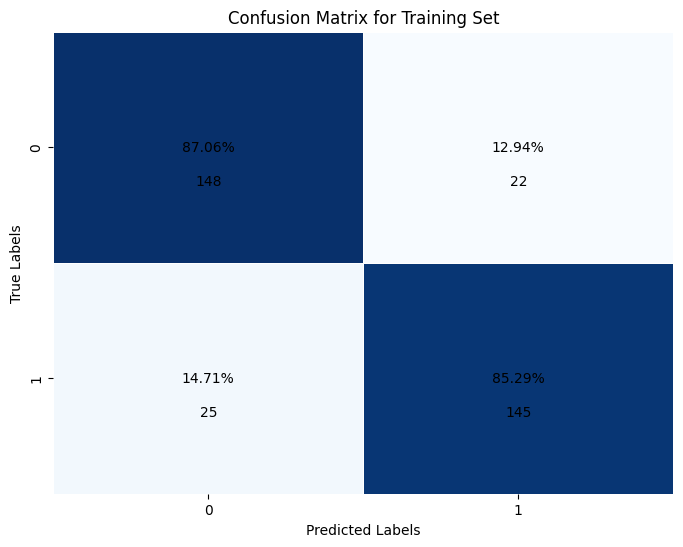

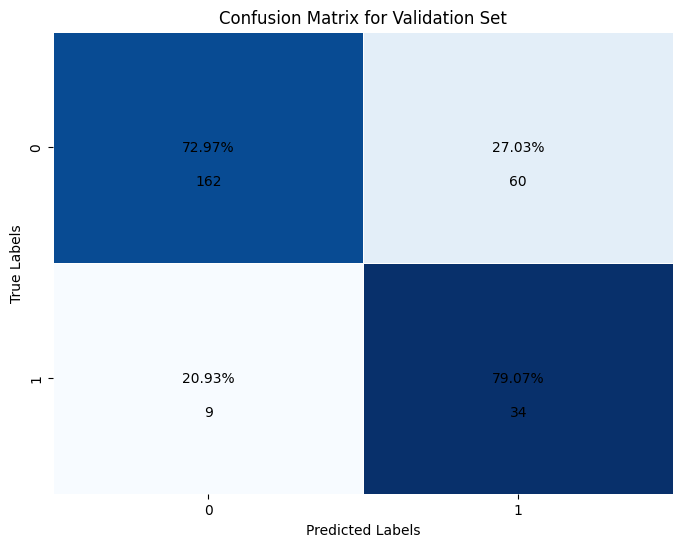

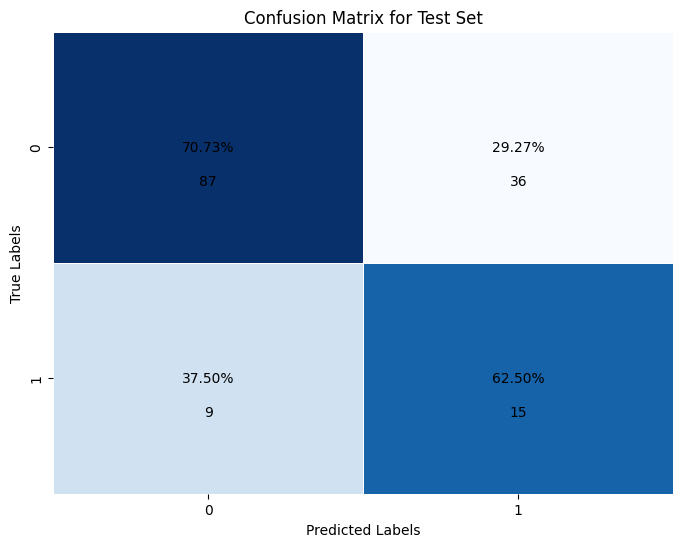

In [160]:
plot_confusion_matrix(y_rus, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Gradient Boosting Classifier</span>

In [161]:
gb_param_grid = {
    'n_estimators': [800, 900, 1000],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_rus, y_rus)

                        y_pred_train = gb_classifier.predict(X_rus)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_rus, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                # 'max_depth': max_depth,
                                # 'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/RUS_gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 800, 'learning_rate': 0.01, 'min_samples_leaf': 12}


In [162]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_rus, y_rus)

y_pred_train = best_gb_classifier.predict(X_rus)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_rus, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.9705882352941176
Gradient Boosting Validation Accuracy:
0.7094339622641509
Gradient Boosting Test Accuracy:
0.6598639455782312
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[156  66]
 [ 11  32]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       222
           1       0.33      0.74      0.45        43

    accuracy                           0.71       265
   macro avg       0.63      0.72      0.63       265
weighted avg       0.84      0.71      0.75       265

--------------------------------------------------------------------------


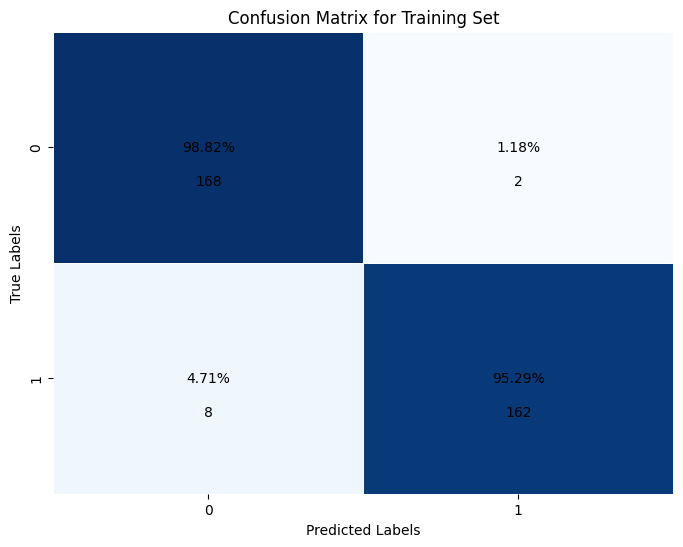

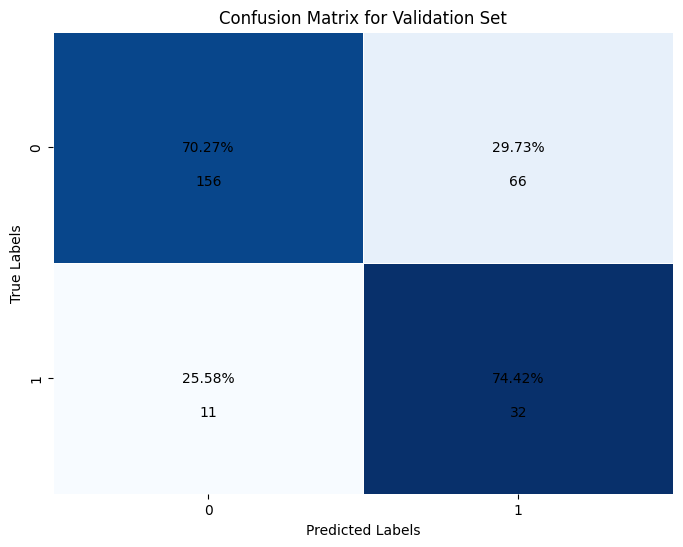

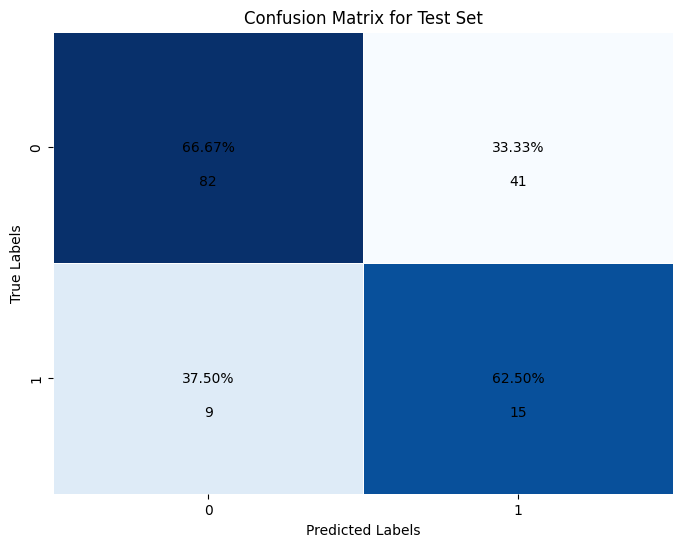

In [163]:
plot_confusion_matrix(y_rus, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Support Vector Machine</span>

In [164]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_rus, y_rus)

                    y_pred_train = svm_classifier.predict(X_rus)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_rus, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/RUS_svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 0.01, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 2}


In [165]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_rus, y_rus)

y_pred_train = best_svm_classifier.predict(X_rus)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_rus, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.7
SVM Validation Accuracy:
0.8339622641509434
SVM Test Accuracy:
0.8163265306122449
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[191  31]
 [ 13  30]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       222
           1       0.49      0.70      0.58        43

    accuracy                           0.83       265
   macro avg       0.71      0.78      0.74       265
weighted avg       0.86      0.83      0.84       265

--------------------------------------------------------------------------


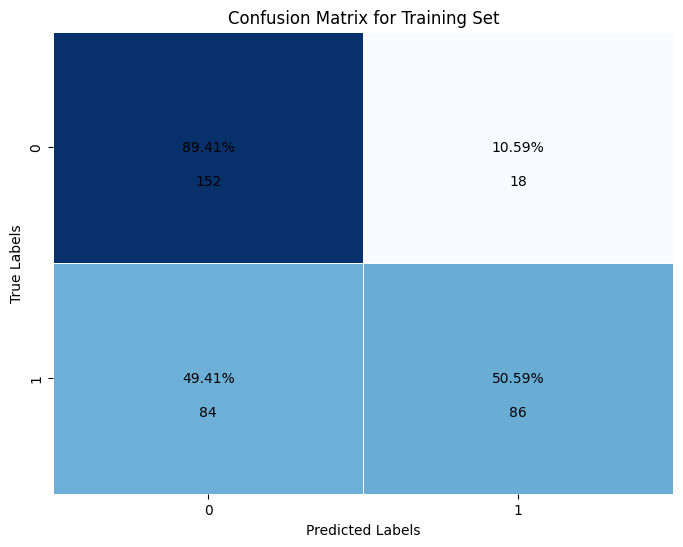

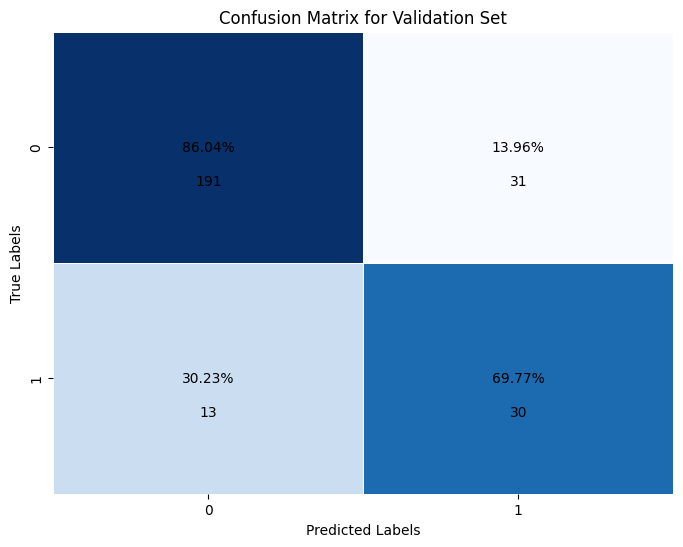

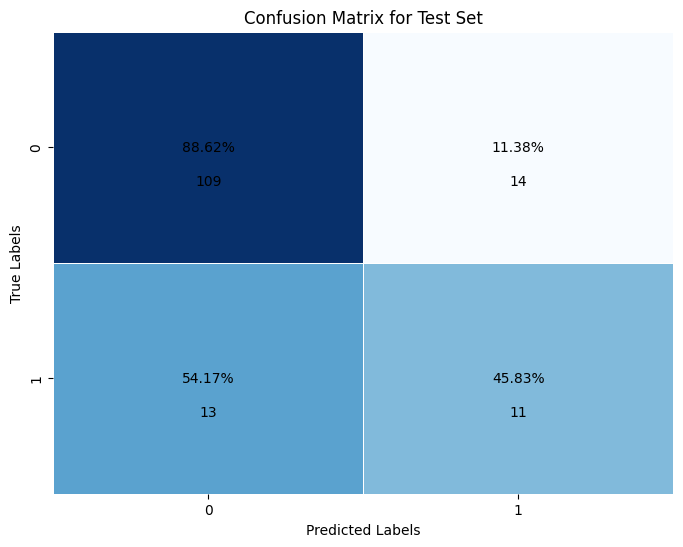

In [166]:
plot_confusion_matrix(y_rus, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

#  <span style = "color : GREEN"> Nearmiss </span>

##  <span style = "color : white"> Logistic Regression</span>

In [167]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_nm, y_nm)
                
                y_pred_train = lreg.predict(X_nm)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_nm, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/NM_lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

Best hyperparameters for Logistic Regression:
{'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


In [168]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_nm, y_nm)

y_pred_train = best_lreg.predict(X_nm)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_nm, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.5
Logistic Regression Validation Accuracy:
0.8377358490566038
Logistic Regression Test Accuracy:
0.8367346938775511
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[222   0]
 [ 43   0]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       222
           1       0.00      0.00      0.00        43

    accuracy                           0.84       265
   macro avg       0.42      0.50      0.46       265
weighted avg       0.70      0.84      0.76       265

--------------------------------------------------------------------------


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

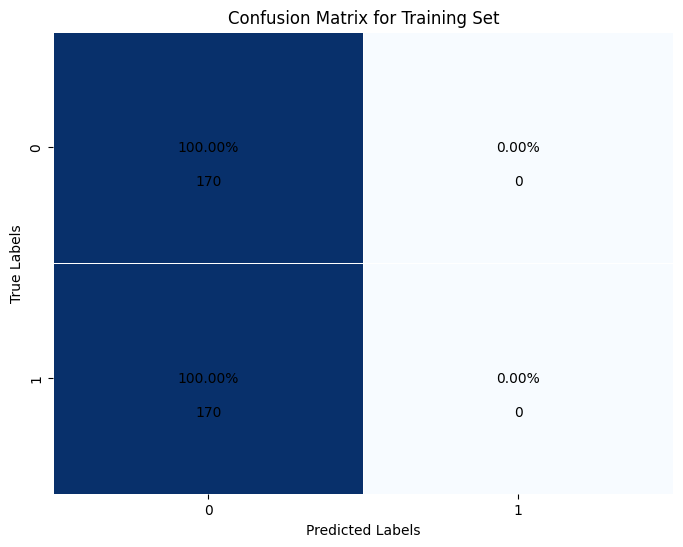

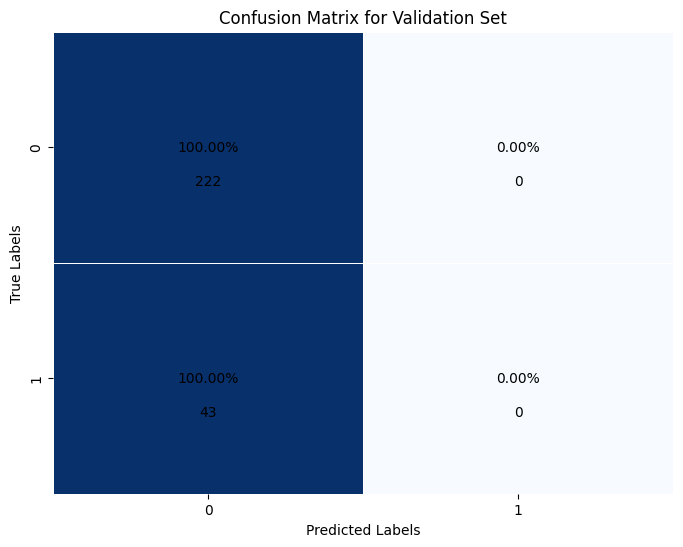

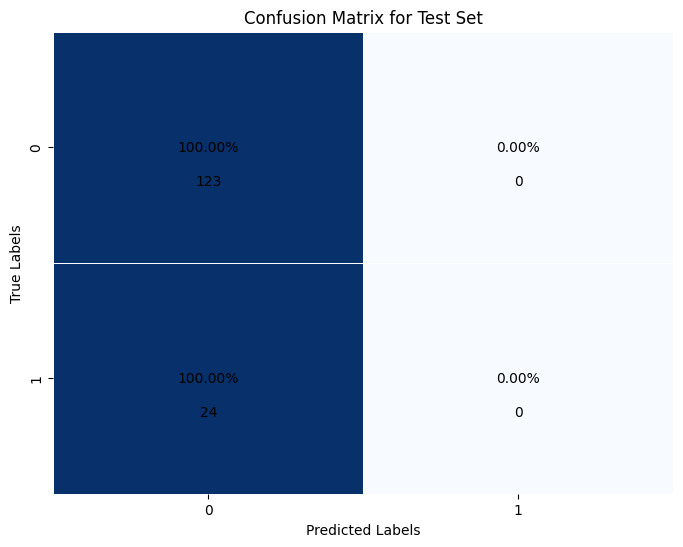

In [169]:
plot_confusion_matrix(y_nm, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Decision Tree Classifier</span>

In [170]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
   
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                           
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_nm, y_nm)

                        y_pred_train = dt_classifier.predict(X_nm)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_nm, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/NM_dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'gini', 'min_samples_leaf': 12}


In [171]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_nm, y_nm)

y_pred_train = best_dt_classifier.predict(X_nm)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_nm, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.7911764705882353
Decision Tree Validation Accuracy:
0.6716981132075471
Decision Tree Test Accuracy:
0.5714285714285714
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[151  71]
 [ 16  27]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.68      0.78       222
           1       0.28      0.63      0.38        43

    accuracy                           0.67       265
   macro avg       0.59      0.65      0.58       265
weighted avg       0.80      0.67      0.71       265

--------------------------------------------------------------------------


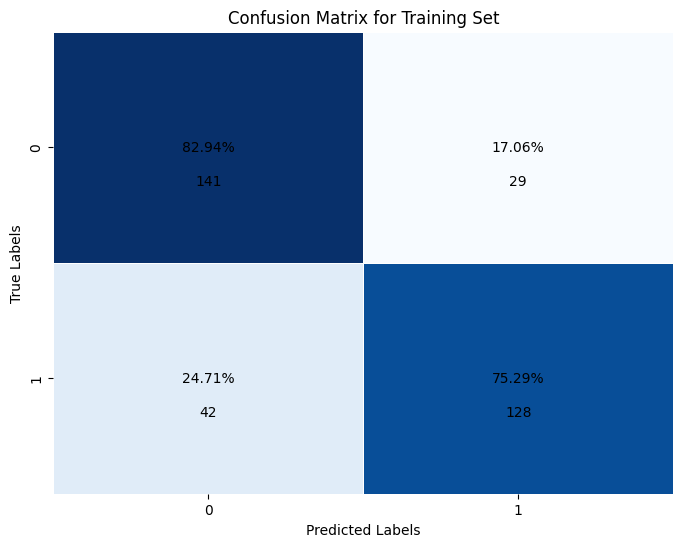

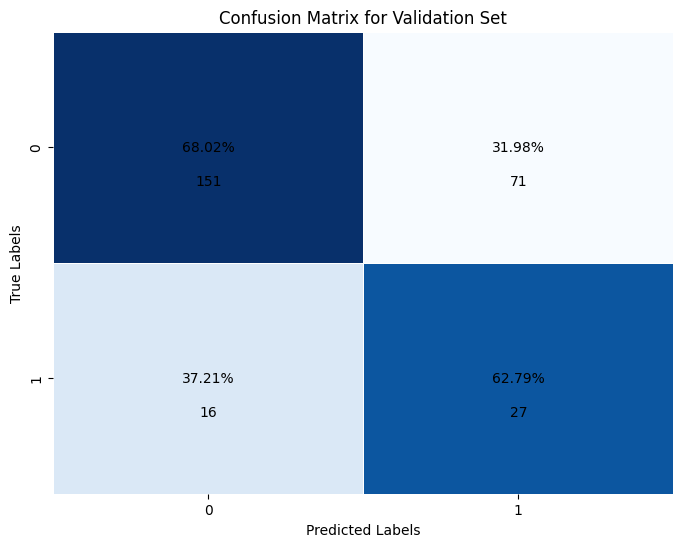

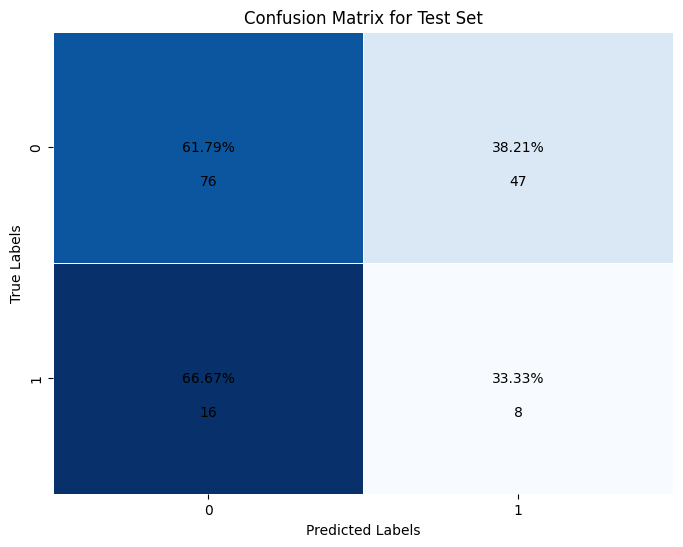

In [172]:
plot_confusion_matrix(y_nm, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Random Forest Classifier</span>

In [173]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_nm, y_nm)

                        y_pred_train = rf_classifier.predict(X_nm)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_nm, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                               
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/NM_rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 800, 'min_samples_leaf': 15}


In [174]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_nm, y_nm)

y_pred_train = best_rf_classifier.predict(X_nm)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_nm, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.8529411764705882
Random Forest Validation Accuracy:
0.5886792452830188
Random Forest Test Accuracy:
0.54421768707483
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[122 100]
 [  9  34]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      0.55      0.69       222
           1       0.25      0.79      0.38        43

    accuracy                           0.59       265
   macro avg       0.59      0.67      0.54       265
weighted avg       0.82      0.59      0.64       265

--------------------------------------------------------------------------


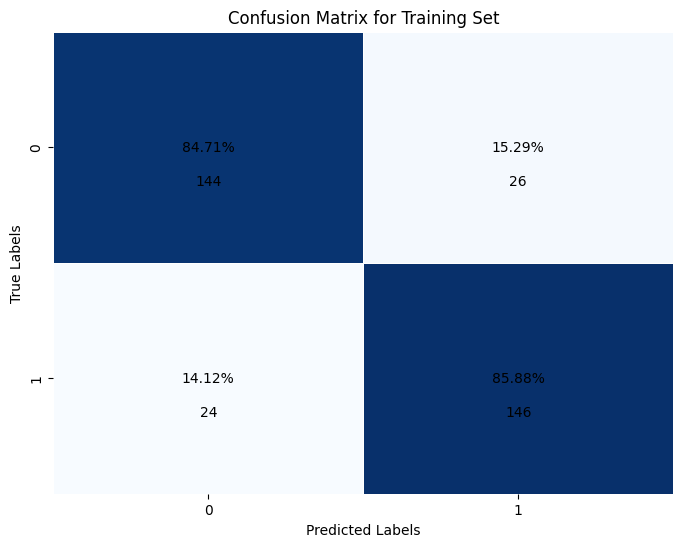

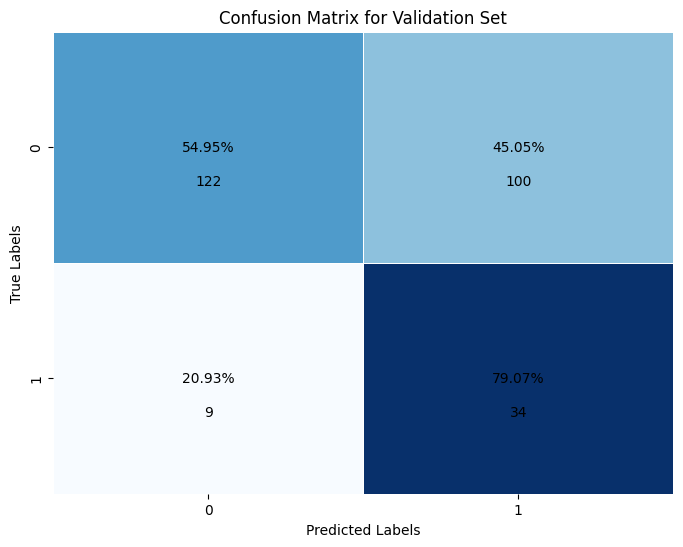

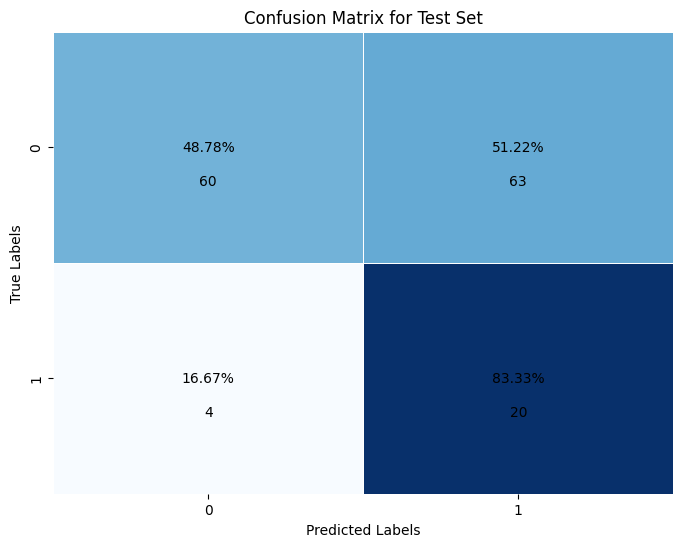

In [175]:
plot_confusion_matrix(y_nm, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Gradient Boosting Classifier</span>

In [176]:
gb_param_grid = {
    'n_estimators': [800, 900, 1000],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_nm, y_nm)

                        y_pred_train = gb_classifier.predict(X_nm)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_nm, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                # 'max_depth': max_depth,
                                # 'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/NM_gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 900, 'learning_rate': 0.01, 'min_samples_leaf': 15}


In [177]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_nm, y_nm)

y_pred_train = best_gb_classifier.predict(X_nm)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_nm, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.9764705882352941
Gradient Boosting Validation Accuracy:
0.5962264150943396
Gradient Boosting Test Accuracy:
0.5918367346938775
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[125  97]
 [ 10  33]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.93      0.56      0.70       222
           1       0.25      0.77      0.38        43

    accuracy                           0.60       265
   macro avg       0.59      0.67      0.54       265
weighted avg       0.82      0.60      0.65       265

--------------------------------------------------------------------------


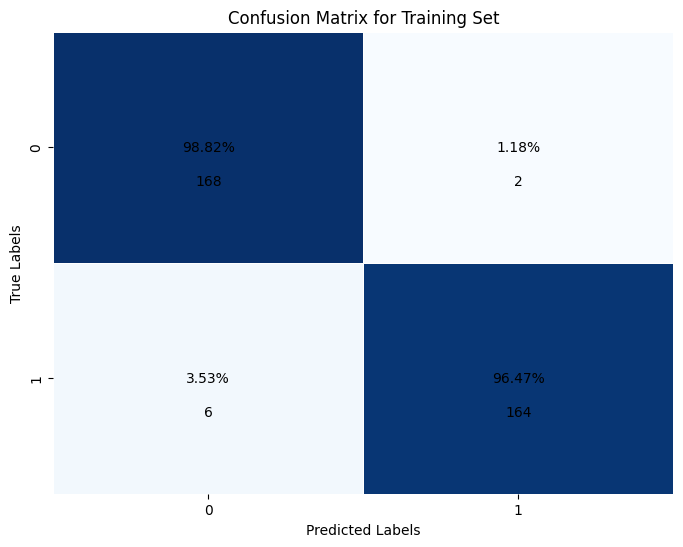

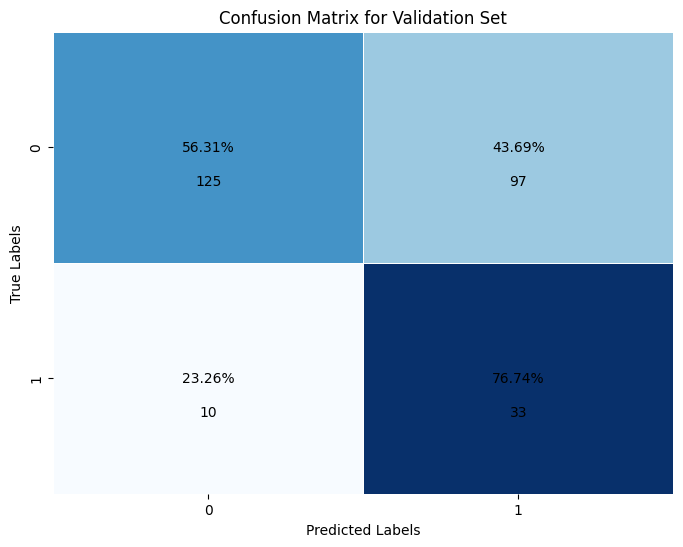

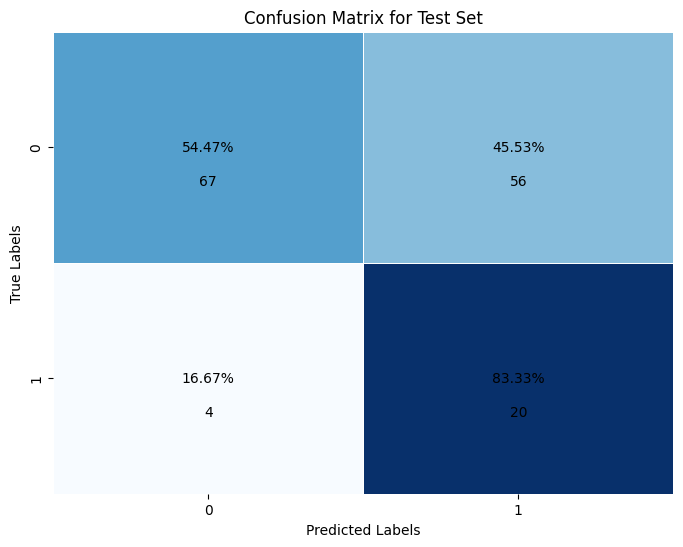

In [178]:
plot_confusion_matrix(y_nm, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Support Vector Machine</span>

In [179]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_nm, y_nm)

                    y_pred_train = svm_classifier.predict(X_nm)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_nm, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/NM_svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 0.01, 'kernel': 'sigmoid', 'gamma': 'scale', 'degree': 2}


In [180]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_nm, y_nm)

y_pred_train = best_svm_classifier.predict(X_nm)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_nm, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.6205882352941177
SVM Validation Accuracy:
0.8
SVM Test Accuracy:
0.7482993197278912
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[196  26]
 [ 27  16]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       222
           1       0.38      0.37      0.38        43

    accuracy                           0.80       265
   macro avg       0.63      0.63      0.63       265
weighted avg       0.80      0.80      0.80       265

--------------------------------------------------------------------------


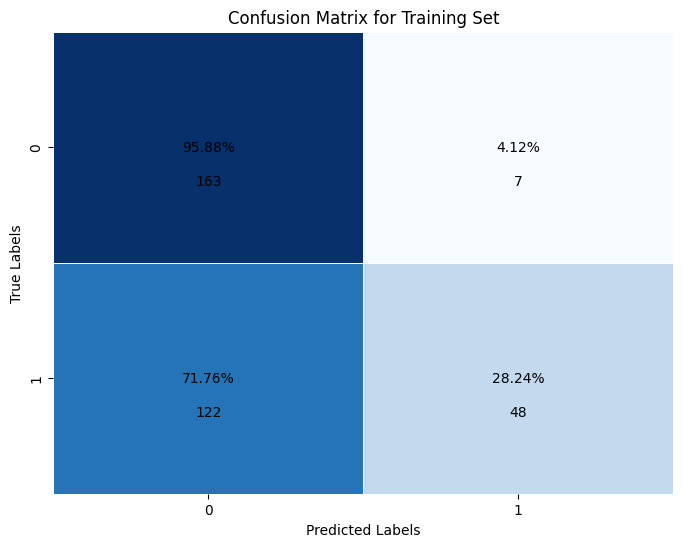

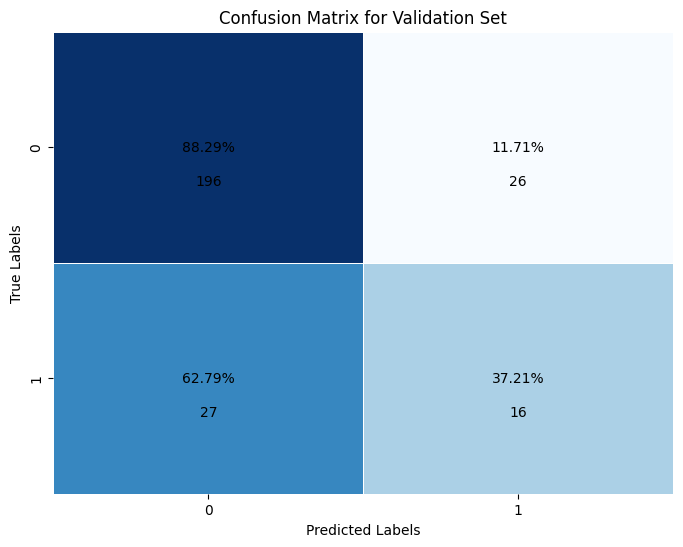

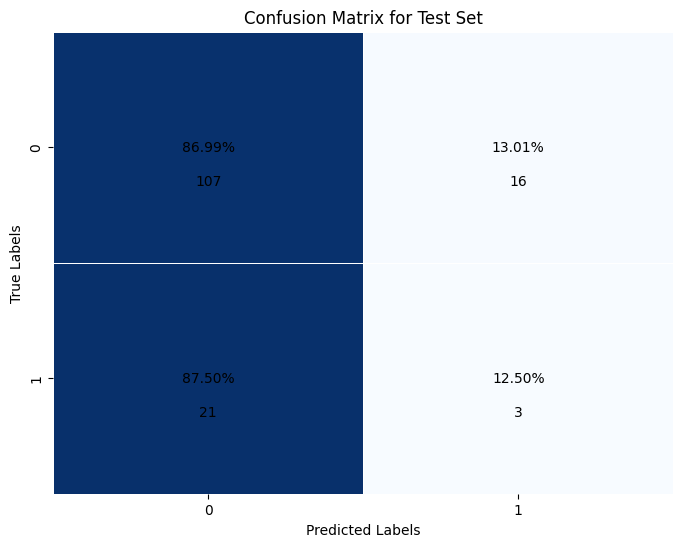

In [181]:
plot_confusion_matrix(y_nm, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

#  <span style = "color : GREEN"> SMOTETomek </span>

##  <span style = "color : white"> Logistic Regression</span>

In [182]:
lreg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

best_accuracy = -np.inf
best_params_lreg = {}
results_lreg = []

for C in lreg_param_grid['C']:
    for penalty in lreg_param_grid['penalty']:
        for solver in lreg_param_grid['solver']:
            try:
                lreg = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=1000, random_state=42)
                lreg.fit(X_smt, y_smt)
                
                y_pred_train = lreg.predict(X_smt)
                y_pred_val = lreg.predict(X_val)
                y_pred_test = lreg.predict(X_test)
                
                train_accuracy = accuracy_score(y_smt, y_pred_train)
                validation_accuracy = accuracy_score(y_val, y_pred_val)
                test_accuracy = accuracy_score(y_test, y_pred_test)
                
                results_lreg.append({
                    'C': C,
                    'penalty': penalty,
                    'solver': solver,
                    'train_accuracy': train_accuracy,
                    'validation_accuracy': validation_accuracy,
                    'test_accuracy': test_accuracy
                })
                
                if validation_accuracy > best_accuracy:
                    best_accuracy = validation_accuracy
                    best_params_lreg = {
                        'C': C,
                        'penalty': penalty,
                        'solver': solver
                    }
            except Exception as e:
                print(f"Error with parameters C={C}, penalty={penalty}, solver={solver}: {e}")
                continue

results_lreg_df = pd.DataFrame(results_lreg)
results_lreg_df.to_csv('./csv_results/SMOTETomek_lreg_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Logistic Regression:")
print(best_params_lreg)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best hyperparameters for Logistic Regression:
{'C': 1, 'penalty': 'l1', 'solver': 'saga'}


In [183]:
best_lreg = LogisticRegression(**best_params_lreg, random_state=42)
best_lreg.fit(X_smt, y_smt)

y_pred_train = best_lreg.predict(X_smt)
y_pred_val = best_lreg.predict(X_val)
y_pred_test = best_lreg.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Logistic Regression Training Accuracy:\n{accuracy_score(y_smt, y_pred_train)}")
print(f"Logistic Regression Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Logistic Regression Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Logistic Regression Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Logistic Regression Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Logistic Regression Training Accuracy:
0.801354401805869
Logistic Regression Validation Accuracy:
0.7886792452830189
Logistic Regression Test Accuracy:
0.7551020408163265
--------------------------------------------------------------------------
Logistic Regression Confusion Matrix (Validation Set):
[[172  50]
 [  6  37]]
Logistic Regression Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       222
           1       0.43      0.86      0.57        43

    accuracy                           0.79       265
   macro avg       0.70      0.82      0.71       265
weighted avg       0.88      0.79      0.81       265

--------------------------------------------------------------------------


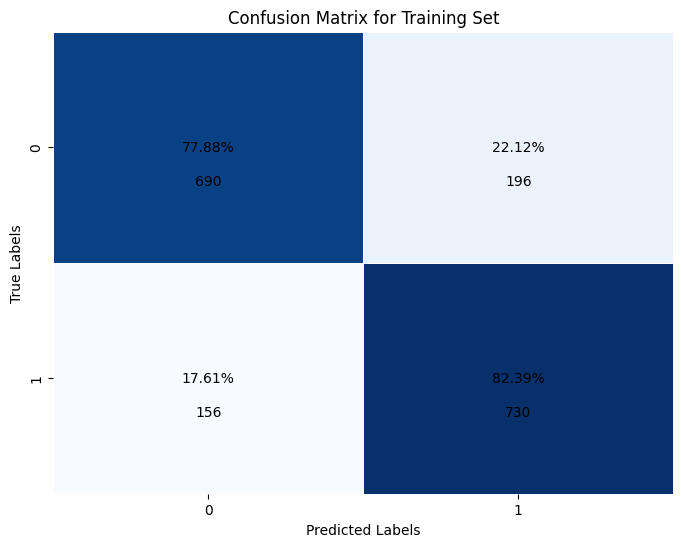

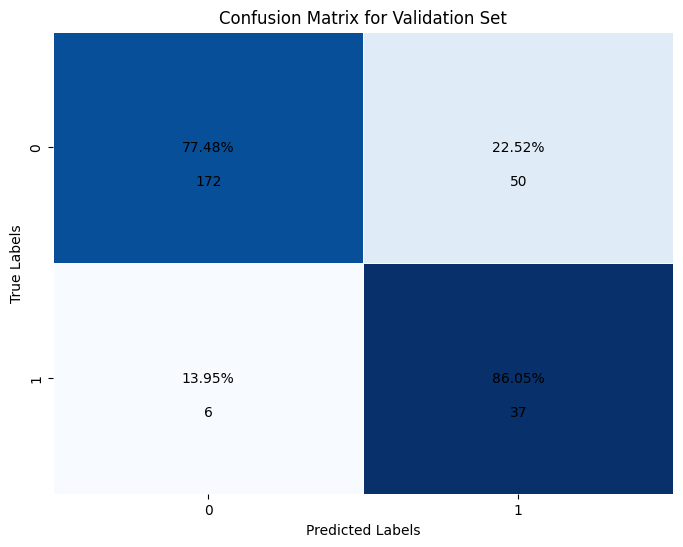

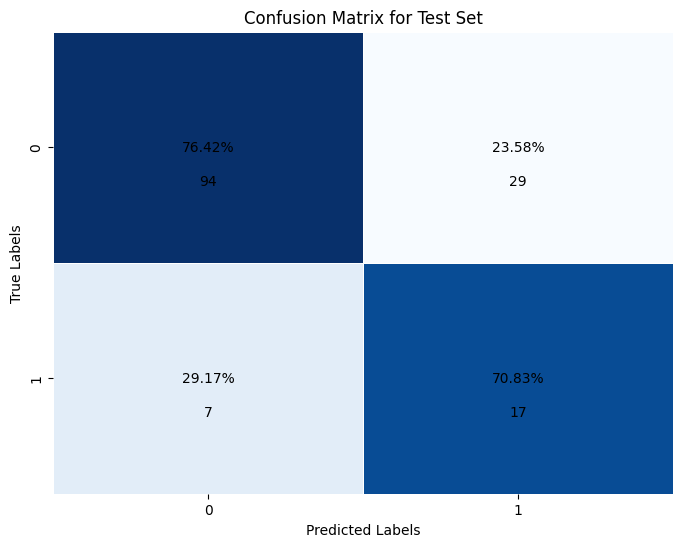

In [184]:
plot_confusion_matrix(y_smt, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Decision Tree Classifier</span>

In [185]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
   
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_dt = -np.inf
best_params_dt = {}
results_dt = []

for criterion in dt_param_grid['criterion']:
                for min_samples_leaf in dt_param_grid['min_samples_leaf']:
                    try:
                        dt_classifier = DecisionTreeClassifier(
                            criterion=criterion,
                           
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        dt_classifier.fit(X_smt, y_smt)

                        y_pred_train = dt_classifier.predict(X_smt)
                        y_pred_val = dt_classifier.predict(X_val)
                        y_pred_test = dt_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_smt, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_dt.append({
                            'criterion': criterion,
                            
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_dt:
                            best_accuracy_dt = validation_accuracy
                            best_params_dt = {
                                'criterion': criterion,
                                
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters criterion={criterion}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_dt_df = pd.DataFrame(results_dt)
results_dt_df.to_csv('./csv_results/SMOTETomek_dt_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Decision Tree:")
print(best_params_dt)


Best hyperparameters for Decision Tree:
{'criterion': 'entropy', 'min_samples_leaf': 12}


In [186]:
best_dt_classifier = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_classifier.fit(X_smt, y_smt)

y_pred_train = best_dt_classifier.predict(X_smt)
y_pred_val = best_dt_classifier.predict(X_val)
y_pred_test = best_dt_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Decision Tree Training Accuracy:\n{accuracy_score(y_smt, y_pred_train)}")
print(f"Decision Tree Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Decision Tree Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Decision Tree Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Decision Tree Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Decision Tree Training Accuracy:
0.9040632054176072
Decision Tree Validation Accuracy:
0.8
Decision Tree Test Accuracy:
0.7619047619047619
--------------------------------------------------------------------------
Decision Tree Confusion Matrix (Validation Set):
[[196  26]
 [ 27  16]]
Decision Tree Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       222
           1       0.38      0.37      0.38        43

    accuracy                           0.80       265
   macro avg       0.63      0.63      0.63       265
weighted avg       0.80      0.80      0.80       265

--------------------------------------------------------------------------


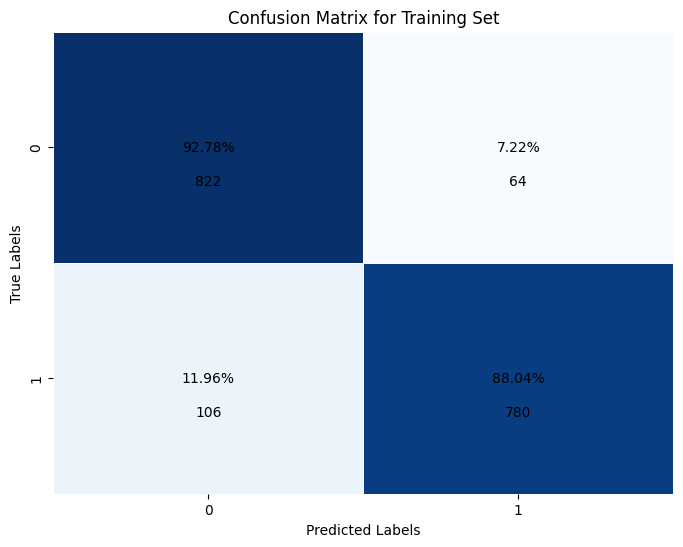

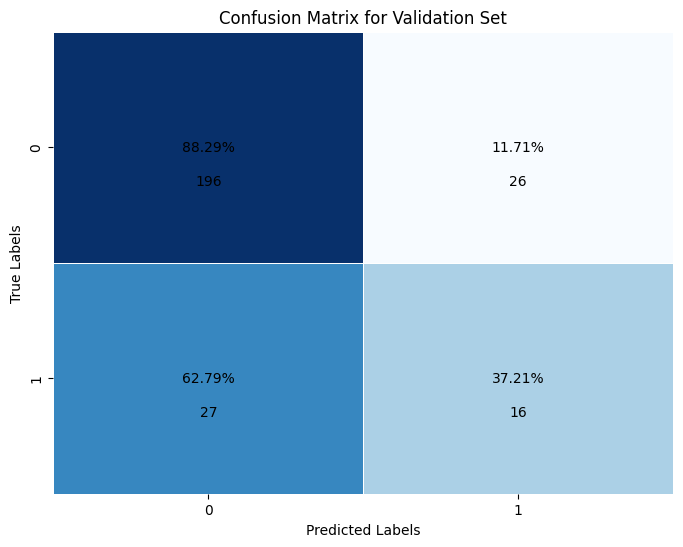

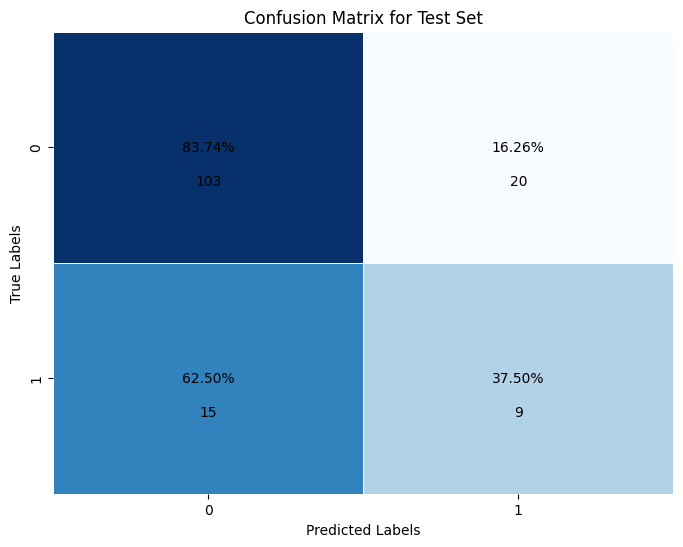

In [187]:
plot_confusion_matrix(y_smt, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Random Forest Classifier</span>

In [188]:
rf_param_grid = {
    'n_estimators': [600, 700, 800],
    'min_samples_leaf': [8, 10, 12, 15],
    
}

best_accuracy_rf = -np.inf
best_params_rf = {}
results_rf = []

for n_estimators in rf_param_grid['n_estimators']:
    for min_samples_leaf in rf_param_grid['min_samples_leaf']:
        
                    try:
                        rf_classifier = RandomForestClassifier(
                            n_estimators=n_estimators,
                            min_samples_leaf=min_samples_leaf,
                            
                            random_state=42
                        )
                        rf_classifier.fit(X_smt, y_smt)

                        y_pred_train = rf_classifier.predict(X_smt)
                        y_pred_val = rf_classifier.predict(X_val)
                        y_pred_test = rf_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_smt, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_rf.append({
                            'n_estimators': n_estimators,
                            'min_samples_leaf': min_samples_leaf,
                            
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_rf:
                            best_accuracy_rf = validation_accuracy
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'min_samples_leaf': min_samples_leaf,
                               
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_rf_df = pd.DataFrame(results_rf)
results_rf_df.to_csv('./csv_results/SMOTETomek_rf_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Random Forest:")
print(best_params_rf)

Best hyperparameters for Random Forest:
{'n_estimators': 600, 'min_samples_leaf': 8}


In [189]:
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_smt, y_smt)

y_pred_train = best_rf_classifier.predict(X_smt)
y_pred_val = best_rf_classifier.predict(X_val)
y_pred_test = best_rf_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Random Forest Training Accuracy:\n{accuracy_score(y_smt, y_pred_train)}")
print(f"Random Forest Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Random Forest Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Random Forest Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Random Forest Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Random Forest Training Accuracy:
0.9683972911963883
Random Forest Validation Accuracy:
0.8905660377358491
Random Forest Test Accuracy:
0.8639455782312925
--------------------------------------------------------------------------
Random Forest Confusion Matrix (Validation Set):
[[213   9]
 [ 20  23]]
Random Forest Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       222
           1       0.72      0.53      0.61        43

    accuracy                           0.89       265
   macro avg       0.82      0.75      0.77       265
weighted avg       0.88      0.89      0.88       265

--------------------------------------------------------------------------


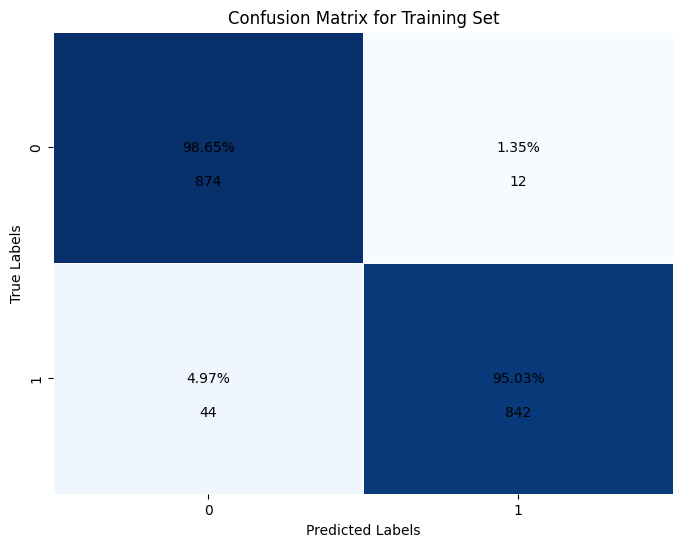

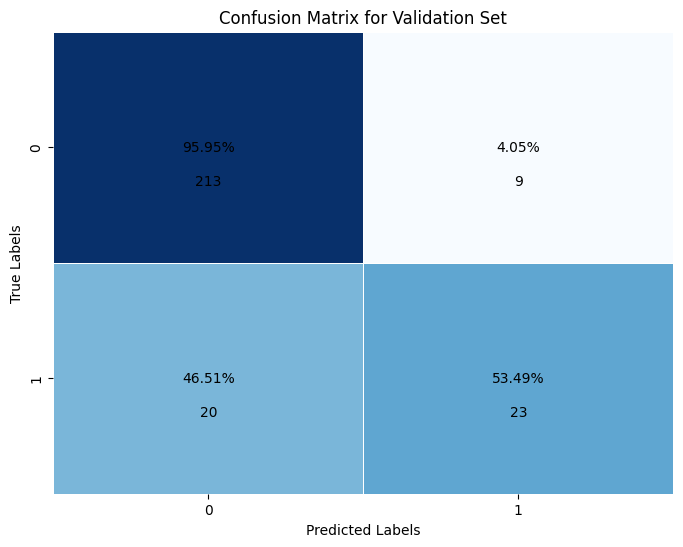

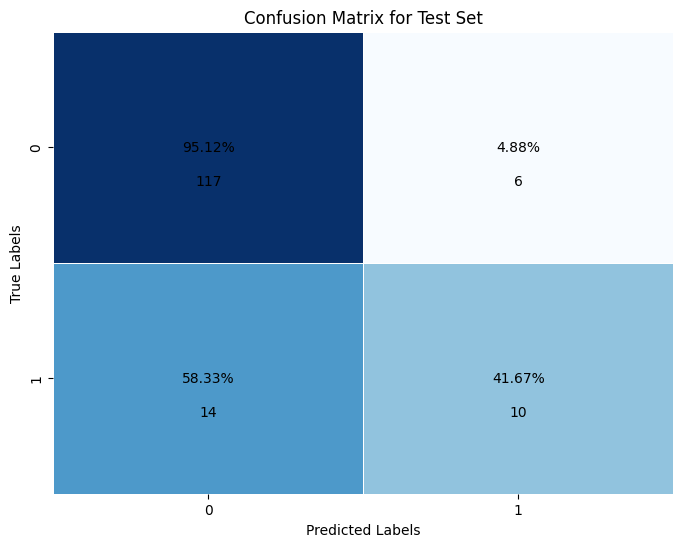

In [190]:
plot_confusion_matrix(y_smt, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Gradient Boosting Classifier</span>

In [191]:
gb_param_grid = {
    'n_estimators': [800, 900, 1000],
    'learning_rate': [0.01],
    'min_samples_leaf': [8, 10, 12, 15]
}

best_accuracy_gb = -np.inf
best_params_gb = {}
results_gb = []

for n_estimators in gb_param_grid['n_estimators']:
    for learning_rate in gb_param_grid['learning_rate']:
        # for max_depth in gb_param_grid['max_depth']:
        #     for min_samples_split in gb_param_grid['min_samples_split']:
                for min_samples_leaf in gb_param_grid['min_samples_leaf']:
                    try:
                        gb_classifier = GradientBoostingClassifier(
                            n_estimators=n_estimators,
                            learning_rate=learning_rate,
                            # max_depth=max_depth,
                            # min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            random_state=42
                        )
                        gb_classifier.fit(X_smt, y_smt)

                        y_pred_train = gb_classifier.predict(X_smt)
                        y_pred_val = gb_classifier.predict(X_val)
                        y_pred_test = gb_classifier.predict(X_test)

                        train_accuracy = accuracy_score(y_smt, y_pred_train)
                        validation_accuracy = accuracy_score(y_val, y_pred_val)
                        test_accuracy = accuracy_score(y_test, y_pred_test)

                        results_gb.append({
                            'n_estimators': n_estimators,
                            'learning_rate': learning_rate,
                            # 'max_depth': max_depth,
                            # 'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'train_accuracy': train_accuracy,
                            'validation_accuracy': validation_accuracy,
                            'test_accuracy': test_accuracy
                        })

                        if validation_accuracy > best_accuracy_gb:
                            best_accuracy_gb = validation_accuracy
                            best_params_gb = {
                                'n_estimators': n_estimators,
                                'learning_rate': learning_rate,
                                # 'max_depth': max_depth,
                                # 'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }
                    except Exception as e:
                        print(f"Error with parameters n_estimators={n_estimators}, learning_rate={learning_rate}, min_samples_leaf={min_samples_leaf}: {e}")
                        continue

results_gb_df = pd.DataFrame(results_gb)
results_gb_df.to_csv('./csv_results/SMOTETomek_gb_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for Gradient Boosting:")
print(best_params_gb)

Best hyperparameters for Gradient Boosting:
{'n_estimators': 900, 'learning_rate': 0.01, 'min_samples_leaf': 12}


In [192]:
best_gb_classifier = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_classifier.fit(X_smt, y_smt)

y_pred_train = best_gb_classifier.predict(X_smt)
y_pred_val = best_gb_classifier.predict(X_val)
y_pred_test = best_gb_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Training Accuracy:\n{accuracy_score(y_smt, y_pred_train)}")
print(f"Gradient Boosting Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"Gradient Boosting Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"Gradient Boosting Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"Gradient Boosting Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
Gradient Boosting Training Accuracy:
0.9672686230248307
Gradient Boosting Validation Accuracy:
0.8641509433962264
Gradient Boosting Test Accuracy:
0.8367346938775511
--------------------------------------------------------------------------
Gradient Boosting Confusion Matrix (Validation Set):
[[208  14]
 [ 22  21]]
Gradient Boosting Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       222
           1       0.60      0.49      0.54        43

    accuracy                           0.86       265
   macro avg       0.75      0.71      0.73       265
weighted avg       0.85      0.86      0.86       265

--------------------------------------------------------------------------


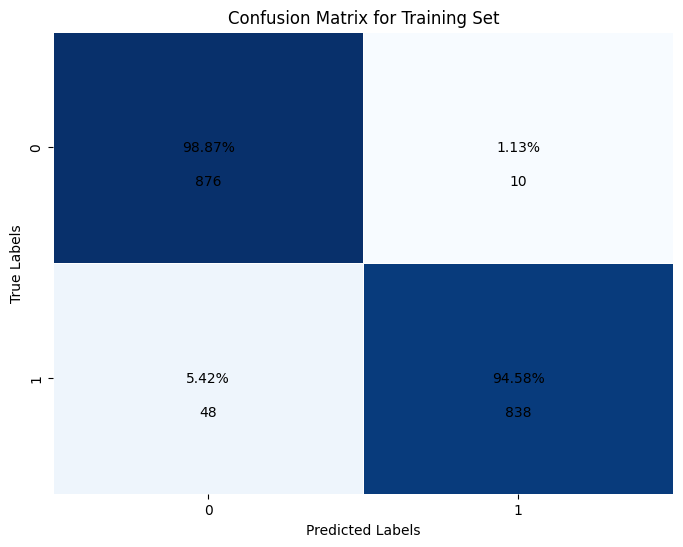

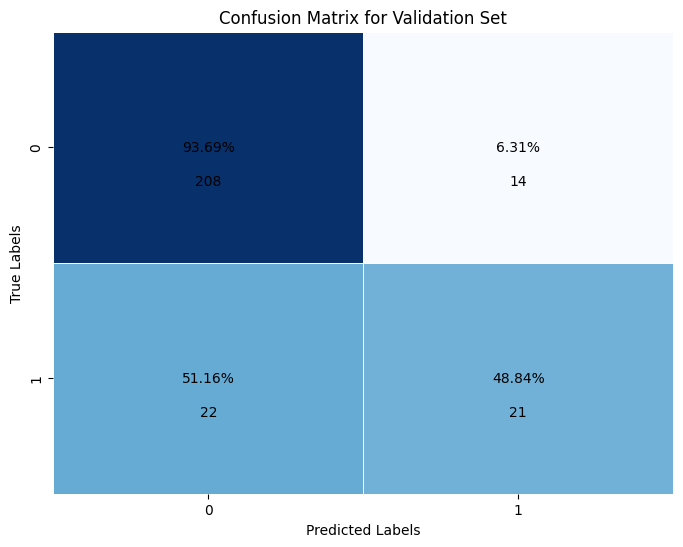

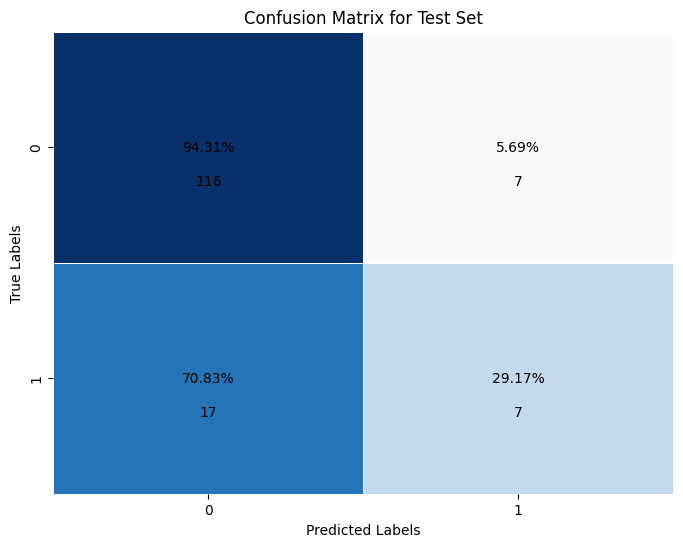

In [193]:
plot_confusion_matrix(y_smt, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")

##  <span style = "color : white"> Support Vector Machine</span>

In [194]:
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

best_accuracy_svm = -np.inf
best_params_svm = {}
results_svm = []

for C in svm_param_grid['C']:
    for kernel in svm_param_grid['kernel']:
        for gamma in svm_param_grid['gamma']:
            for degree in svm_param_grid['degree']:
                try:
                    svm_classifier = SVC(
                        C=C,
                        kernel=kernel,
                        gamma=gamma,
                        degree=degree,
                        random_state=42
                    )
                    svm_classifier.fit(X_smt, y_smt)

                    y_pred_train = svm_classifier.predict(X_smt)
                    y_pred_val = svm_classifier.predict(X_val)
                    y_pred_test = svm_classifier.predict(X_test)

                    train_accuracy = accuracy_score(y_smt, y_pred_train)
                    validation_accuracy = accuracy_score(y_val, y_pred_val)
                    test_accuracy = accuracy_score(y_test, y_pred_test)

                    results_svm.append({
                        'C': C,
                        'kernel': kernel,
                        'gamma': gamma,
                        'degree': degree,
                        'train_accuracy': train_accuracy,
                        'validation_accuracy': validation_accuracy,
                        'test_accuracy': test_accuracy
                    })

                    if validation_accuracy > best_accuracy_svm:
                        best_accuracy_svm = validation_accuracy
                        best_params_svm = {
                            'C': C,
                            'kernel': kernel,
                            'gamma': gamma,
                            'degree': degree
                        }
                except Exception as e:
                    print(f"Error with parameters C={C}, kernel={kernel}, gamma={gamma}, degree={degree}: {e}")
                    continue

results_svm_df = pd.DataFrame(results_svm)
results_svm_df.to_csv('./csv_results/SMOTETomek_svm_hyperparameter_tuning.csv', index=False)

print("Best hyperparameters for SVM:")
print(best_params_svm)

Best hyperparameters for SVM:
{'C': 10, 'kernel': 'rbf', 'gamma': 'auto', 'degree': 2}


In [195]:
best_svm_classifier = SVC(**best_params_svm, random_state=42)
best_svm_classifier.fit(X_smt, y_smt)

y_pred_train = best_svm_classifier.predict(X_smt)
y_pred_val = best_svm_classifier.predict(X_val)
y_pred_test = best_svm_classifier.predict(X_test)

print("--------------------------------------------------------------------------")
print(f"SVM Training Accuracy:\n{accuracy_score(y_smt, y_pred_train)}")
print(f"SVM Validation Accuracy:\n{accuracy_score(y_val, y_pred_val)}")
print(f"SVM Test Accuracy:\n{accuracy_score(y_test, y_pred_test)}")
print("--------------------------------------------------------------------------")
print(f"SVM Confusion Matrix (Validation Set):\n{confusion_matrix(y_val, y_pred_val)}")
print(f"SVM Classification Report (Validation Set):\n{classification_report(y_val, y_pred_val)}")
print("--------------------------------------------------------------------------")

--------------------------------------------------------------------------
SVM Training Accuracy:
0.90744920993228
SVM Validation Accuracy:
0.8415094339622642
SVM Test Accuracy:
0.7891156462585034
--------------------------------------------------------------------------
SVM Confusion Matrix (Validation Set):
[[192  30]
 [ 12  31]]
SVM Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       222
           1       0.51      0.72      0.60        43

    accuracy                           0.84       265
   macro avg       0.72      0.79      0.75       265
weighted avg       0.87      0.84      0.85       265

--------------------------------------------------------------------------


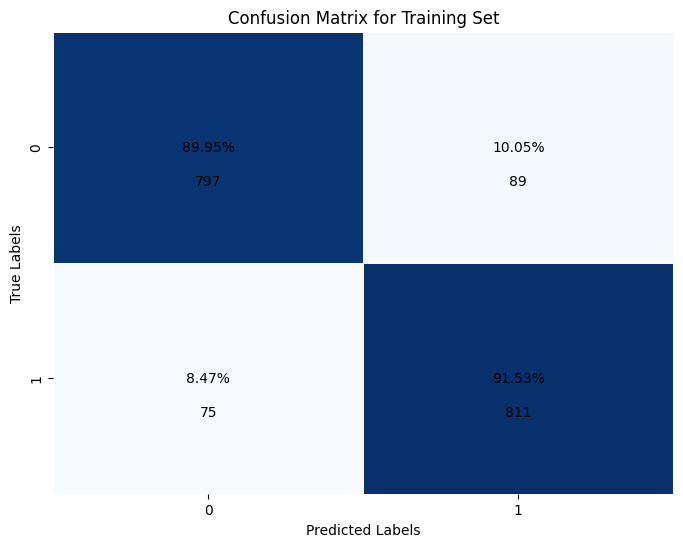

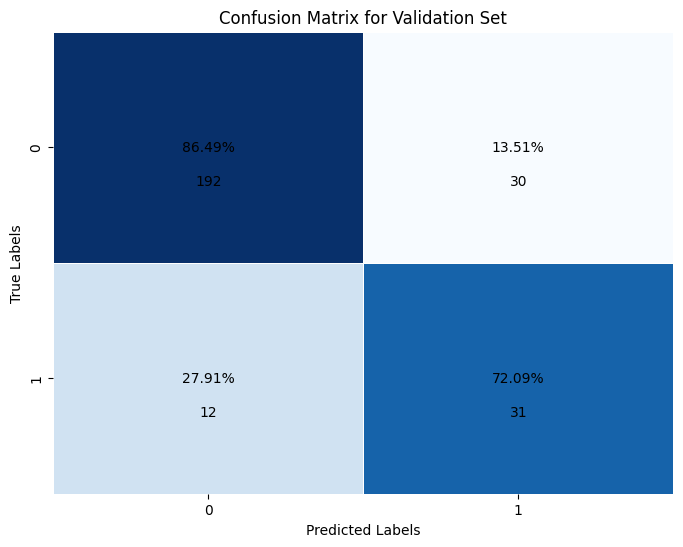

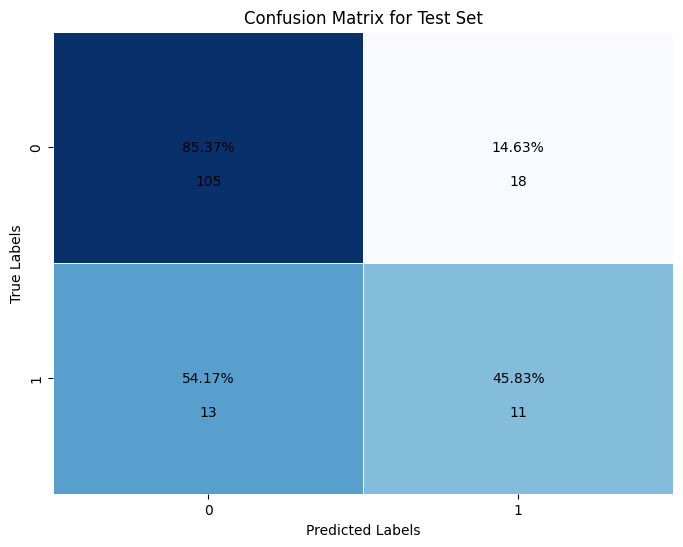

In [196]:
plot_confusion_matrix(y_smt, y_pred_train, "Confusion Matrix for Training Set")
plot_confusion_matrix(y_val, y_pred_val, "Confusion Matrix for Validation Set")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix for Test Set")